In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
#import pandas_datareader.data as web
#import quandl
import blpapi
from xbbg import blp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import utils

import seaborn as sns

import CLO_SQL_Updated as cs



In [2]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
#file = 'EQ Comparison.xlsx'
#tab = 'bbTickers'


In [3]:
pd.options.display.precision
pd.options.display.float_format = '{:,.4f}'.format

6

# Straight from .GSGSS
PDSP .gsgss 

In [4]:
def read_bbGSSrpt():
    bbsheet = pd.read_excel(dirpath+'MasterMap4GSS_orig.xlsx',skiprows=9,sheet_name='Worksheet') #.dropna(subset=['Market Value %'])
    bbsheet = bbsheet.loc[~bbsheet['Security'].isin(['<Search>','Totals','Cash','EUR/CAD  3/24/2022','GBP/CAD  3/24/2022',
                                    'INR','USD','USD/CAD  3/24/2022','EUR/CAD  4/27/2022','GBP/CAD  4/27/2022',
                                   'SEK/CAD  4/27/2022', 'SEK/CAD  3/24/2022','USD/CAD  4/27/2022'  ])]
    bbsheet['Weights'] = bbsheet['Principal']/bbsheet['Principal'].sum()
    return bbsheet

In [5]:
bb_df = read_bbGSSrpt()

In [11]:
bb_df['PK'].describe()

count              133
unique             132
top       BX US Equity
freq                 2
Name: PK, dtype: object

# Bloomberg Grab

In [6]:
from datetime import datetime, date
from pandas.tseries.offsets import *
sdate = (pd.Timestamp.today()-252*BusinessDay()).strftime("%Y-%m-%d")
date = pd.Timestamp.today().strftime("%Y-%m-%d")

In [12]:

eq_prices = blp.bdh(tickers=bb_df['PK'].unique() , flds=['RT117'],start_date=sdate, end_date=date)
eq_prices

AAL US Equity ACCD US Equity ACVA US Equity AEO US Equity  \
                   RT117          RT117          RT117         RT117   
2021-04-06       24.0600        48.7400        32.1900       30.1500   
2021-04-07       23.9300        46.8700        30.6700       31.1300   
2021-04-08       23.6500        46.8100        31.7400       31.4900   
2021-04-09       23.5400        47.1800        31.4000       32.5800   
2021-04-12       22.9100        47.3600        31.9400       33.1800   
...                  ...            ...            ...           ...   
2022-03-18       16.7500        17.0800        14.3400       19.9980   
2022-03-21       16.0900        15.6800        14.2000       18.6806   
2022-03-22       16.5600        17.0200        14.4800       18.8865   
2022-03-23       16.2100        16.4000        14.3200       18.0219   
2022-03-24       16.7200        16.7300        14.7500       18.0734   

           AMC US Equity AON US Equity APG US Equity APO US Equity  \
                   RT117         RT117         RT117         RT117   
2021-04-06       10.2000      234.2200       21.6400       47.8000   
2021-04-07        9.8500      236.2700       21.8800       47.0500   
2021-04-08        9.7900      235.0000       21.9900       46.5600   
2021-04-09        9.4200      237.0000       22.2500       47.0300   
2021-04-12        8.6200      238.8300       22.0200       47.5600   
...                  ...           ...           ...           ...   
2022-03-18       15.8000      320.7517       21.9400       64.4979   
2022-03-21       15.8600      320.2681       21.2400       64.4155   
2022-03-22       18.2600      317.5883       21.4000       66.6623   
2022-03-23       20.7400      316.1074       20.8300       64.7040   
2022-03-24       20.2300      319.7342       21.2300       65.8481   

           APPN US Equity ARMK US Equity  ... UBER US Equity VFC US Equity  \
                    RT117          RT117  ...          RT117         RT117   
2021-04-06       136.7500        38.7800  ...        58.0500       83.6800   
2021-04-07       130.4300        39.2900  ...        56.8900       83.9800   
2021-04-08       135.1700        38.7100  ...        57.8300       83.1100   
2021-04-09       134.1700        38.8900  ...        57.6800       84.9400   
2021-04-12       129.7000        39.4600  ...        59.4400       85.4000   
...                   ...            ...  ...            ...           ...   
2022-03-18        61.9600        37.6512  ...        33.3600       59.1729   
2022-03-21        60.8600        37.0337  ...        31.9800       58.1128   
2022-03-22        62.5100        37.1045  ...        33.3500       58.3701   
2022-03-23        62.6900        37.1653  ...        33.0600       57.2688   
2022-03-24        63.4400        37.7727  ...        34.7000       57.8863   

           VLRS US Equity WOLF US Equity WSC US Equity WSM US Equity  \
                    RT117          RT117         RT117         RT117   
2021-04-06        15.1400       117.5700       29.1900      186.8900   
2021-04-07        14.9100       114.2300       28.8700      178.6100   
2021-04-08        15.5700       114.9200       29.3600      185.3100   
2021-04-09        15.7200       111.0200       29.7400      183.2200   
2021-04-12        15.6200       111.3700       29.3300      176.9000   
...                   ...            ...           ...           ...   
2022-03-18        16.3400       105.6900       38.7400      166.8334   
2022-03-21        15.6900       103.9600       38.3300      161.1937   
2022-03-22        16.1400       104.4000       38.6800      160.2182   
2022-03-23        15.6600       103.5100       38.4800      151.2963   
2022-03-24        15.6100       108.9500       39.4600      149.1217   

           WTW US Equity XP US Equity ZEN US Equity ZZZ CN Equity  
                   RT117        RT117         RT117         RT117  
2021-04-06      236.7800      38.8800      139.3300       31.8800  
2021-04

In [13]:
VIX = blp.bdh(tickers='VIX Index' , flds=['RT117'],start_date=sdate, end_date=date)

In [14]:
gssrets = eq_prices.droplevel(1,axis=1).pct_change()
gssrets.info()


<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-04-06 to 2022-03-24
Columns: 131 entries, AAL US Equity to ZZZ CN Equity
dtypes: float64(131)
memory usage: 260.9+ KB


In [15]:
#index_ntr = blp.bdh(tickers=stocks['Bbcall'] , flds=['RT117'],start_date=sdate, end_date=date)
#index_ntr.to_csv(dirpath + 'GSS_NTR.csv')
    
#index_ntr
gssrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-04-06            NaN             NaN             NaN            NaN   
2021-04-07        -0.0054         -0.0384         -0.0472         0.0325   
2021-04-08        -0.0117         -0.0013          0.0349         0.0116   
2021-04-09        -0.0047          0.0079         -0.0107         0.0346   
2021-04-12        -0.0268          0.0038          0.0172         0.0184   
...                   ...             ...             ...            ...   
2022-03-18         0.0121          0.0173          0.0317         0.0183   
2022-03-21        -0.0394         -0.0820         -0.0098        -0.0659   
2022-03-22         0.0292          0.0855          0.0197         0.0110   
2022-03-23        -0.0211         -0.0364         -0.0110        -0.0458   
2022-03-24         0.0315          0.0201          0.0300         0.0029   

            AMC US Equity  AON US Equity  APG US Equity  APO US Equity  \
2021-04-06            NaN            NaN            NaN            NaN   
2021-04-07        -0.0343         0.0088         0.0111        -0.0157   
2021-04-08        -0.0061        -0.0054         0.0050        -0.0104   
2021-04-09        -0.0378         0.0085         0.0118         0.0101   
2021-04-12        -0.0849         0.0077        -0.0103         0.0113   
...                   ...            ...            ...            ...   
2022-03-18         0.0402         0.0078         0.0413         0.0162   
2022-03-21         0.0038        -0.0015        -0.0319        -0.0013   
2022-03-22         0.1513        -0.0084         0.0075         0.0349   
2022-03-23         0.1358        -0.0047        -0.0266        -0.0294   
2022-03-24        -0.0246         0.0115         0.0192         0.0177   

            APPN US Equity  ARMK US Equity  ...  UBER US Equity  \
2021-04-06             NaN             NaN  ...             NaN   
2021-04-07         -0.0462          0.0132  ...         -0.0200   
2021-04-08          0.0363         -0.0148  ...          0.0165   
2021-04-09         -0.0074          0.0046  ...         -0.0026   
2021-04-12         -0.0333          0.0147  ...          0.0305   
...                    ...             ...  ...             ...   
2022-03-18          0.0466          0.0158  ...          0.0155   
2022-03-21         -0.0178         -0.0164  ...         -0.0414   
2022-03-22          0.0271          0.0019  ...          0.0428   
2022-03-23          0.0029          0.0016  ...         -0.0087   
2022-03-24          0.0120          0.0163  ...          0.0496   

            VFC US Equity  VLRS US Equity  WOLF US Equity  WSC US Equity  \
2021-04-06            NaN             NaN             NaN            NaN   
2021-04-07         0.0036         -0.0152         -0.0284        -0.0110   
2021-04-08        -0.0104          0.0443          0.0060         0.0170   
2021-04-09         0.0220          0.0096         -0.0339         0.0129   
2021-04-12         0.0054         -0.0064          0.0032        -0.0138   
...                   ...             ...             ...            ...   
2022-03-18         0.0045          0.0136          0.0242         0.0232   
2022-03-21        -0.0179         -0.0398         -0.0164        -0.0106   
2022-03-22         0.0044          0.0287          0.0042         0.0091   
2022-03-23        -0.0189         -0.0297         -0.0085        -0.0052   
2022-03-24         0.0108         -0.0032          0.0526         0.0255   

            WSM US Equity  WTW US Equity  XP US Equity  ZEN US Equity  \
2021-04-06            NaN            NaN           NaN            NaN   
2021-04-07        -0.0443         0.0044       -0.0103        -0.0123   
2021-04-08         0.0375        -0.0032        0.0140         0.0321   
2021-04-09        -0.0113         0.0123       -0.0003         0.0162   
2021-04-12        -0.0345         0.0166       -0.0195         0.0140   
...                   ...            ...           ...

In [16]:
indices = ['SPX Index','SPXT Index','SPTR Index','RU20INTR Index','RU10INTR Index','SPTSXN Index',
           'SP400NTR Index','SPTRSMCN Index']

beta_df = blp.bdh(tickers=indices, flds=['PX_LAST'],start_date=sdate, end_date=date)
betarets = beta_df.droplevel(1,axis=1).pct_change()
betarets.fillna(0,inplace=True)
   
beta_df

SPX Index SPXT Index SPTR Index RU20INTR Index RU10INTR Index  \
              PX_LAST    PX_LAST    PX_LAST        PX_LAST        PX_LAST   
2021-04-06 4,073.9400 8,449.5400 8,449.5420    11,606.5700    13,618.8400   
2021-04-07 4,079.9500 8,462.1800 8,462.1750    11,421.2200    13,627.4000   
2021-04-08 4,097.1700 8,499.8500 8,499.8500    11,521.8500    13,698.2900   
2021-04-09 4,128.8000 8,565.5700 8,565.5730    11,526.7200    13,796.3000   
2021-04-12 4,127.9900 8,564.0300 8,564.0300    11,477.0600    13,800.1000   
...               ...        ...        ...            ...            ...   
2022-03-18 4,463.1200 9,382.4300 9,382.4310    10,824.4600    14,816.0200   
2022-03-21 4,461.1800 9,378.8400 9,378.8440    10,720.0100    14,800.0000   
2022-03-22 4,511.6100 9,484.8600 9,484.8560    10,836.4500    14,976.3000   
2022-03-23 4,456.2400 9,368.9800 9,368.9790    10,649.3500    14,789.0000   
2022-03-24 4,520.1600        NaN        NaN            NaN            NaN   

           SPTSXN Index SP400NTR Index SPTRSMCN Index  
                PX_LAST        PX_LAST        PX_LAST  
2021-04-06     240.7100     3,907.0800     1,719.3700  
2021-04-07     241.0200     3,879.6200     1,695.5900  
2021-04-08     242.3800     3,894.2900     1,704.3700  
2021-04-09     242.3700     3,912.9300     1,707.5400  
2021-04-12     242.0300     3,925.8800     1,708.6000  
...                 ...            ...            ...  
2022-03-18     280.0300     3,999.2000     1,727.1300  
2022-03-21     282.4800     3,985.3700     1,715.6300  
2022-03-22     283.3400     4,010.9300     1,724.1600  
2022-03-23     281.5200     3,937.9800     1,692.7900  
2022-03-24          NaN            NaN            NaN  

[251 rows x 8 columns]

# Aggregate to Groups, Long/Short and Total Portfolio

In [17]:
bb_df = bb_df.loc[bb_df['PK'].isin(gssrets.columns)]

In [18]:
bb_df

Security              PK            ID      Position    Price   PCS  \
3     AAL US   AAL US Equity           AAL  -43,158.0000  16.2100  USER   
4    ACCD US  ACCD US Equity          ACCD   -5,715.0000  16.4000  USER   
5    ACVA US  ACVA US Equity          ACVA   -7,366.0000  14.3200  USER   
6     AEO US   AEO US Equity           AEO  -34,588.0000  17.5100  USER   
7     AMC US   AMC US Equity           AMC -118,790.0000  20.7400  USER   
..       ...             ...           ...           ...      ...   ...   
130   WSM US   WSM US Equity           WSM   -4,402.0000 148.8900  USER   
131   WTW US   WTW US Equity  IE00BDB6Q211   38,161.0000 231.9300  USER   
132    XP US    XP US Equity  KYG982391099   -4,884.0000  31.3200  USER   
133   ZEN US   ZEN US Equity           ZEN   -1,346.0000 118.9700  USER   
134   ZZZ CN   ZZZ CN Equity  CA83125J1049  -17,622.0000  30.5800  USER   

     FX Rate       Principal  Accrued      Market Val  Price.1  FX Rate.1  \
3     1.2542   -877,427.2500      NaN   -877,427.2500  17.5400     1.2567   
4     1.2542   -117,551.1500      NaN   -117,551.1500  17.9500     1.2567   
5     1.2542   -132,294.4200      NaN   -132,294.4200  15.9200     1.2567   
6     1.2542   -759,588.5100      NaN   -759,588.5100  19.2800     1.2567   
7     1.2542 -3,089,978.2600      NaN -3,089,978.2600  15.0900     1.2567   
..       ...             ...      ...             ...      ...        ...   
130   1.2542   -822,019.9500      NaN   -822,019.9500 139.1600     1.2567   
131   1.2542 11,100,523.6100      NaN 11,100,523.6100 214.3600     1.2567   
132   1.2542   -191,851.0600      NaN   -191,851.0600  29.0500     1.2567   
133   1.2542   -200,839.5800      NaN   -200,839.5800  96.8100     1.2567   
134   1.0000   -538,880.7600      NaN   -538,880.7600  29.8600     1.0000   

        Principal.1  Accrued.1        Cost Val Cost Date          STRATEGY  \
3     -951,319.7600        NaN   -951,319.7600  01/31/22       SHORT HEDGE   
4     -128,913.1300        NaN   -128,913.1300  01/18/22       IPO&HD beta   
5     -147,361.1100        NaN   -147,361.1100  01/18/22       IPO&HD beta   
6     -837,978.3400        NaN   -837,978.3400  02/28/22     DISCRETIONARY   
7   -2,252,247.7000        NaN -2,252,247.7000  02/04/22       SHORT ALPHA   
..              ...        ...             ...       ...               ...   
130   -769,806.5200        NaN   -769,806.5200  02/28/22     DISCRETIONARY   
131 10,280,219.2500        NaN 10,280,219.2500  03/01/21  LOW VOL, QUALITY   
132   -178,316.2000        NaN   -178,316.2000  01/06/22   FAILURE MODEL A   
133   -163,748.9700        NaN   -163,748.9700  01/06/22   FAILURE MODEL A   
134   -526,124.9500        NaN   -526,124.9500  02/28/22     DISCRETIONARY   

     Weights  
3    -0.0017  
4    -0.0002  
5    -0.0003  
6    -0.0015  
7    -0.0060  
..       ...  
130  -0.0016  
131   0.0215  
132  -0.0004  
133  -0.0004  
134  -0.0010  

[132 rows x 18 columns]

In [29]:
gssrets.loc[:,grpstks]
len(bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'])

AMC US Equity  APPN US Equity  BGS US Equity  BLDP US Equity  \
2021-04-06         0.0000          0.0000         0.0000          0.0000   
2021-04-07        -0.0343         -0.0462        -0.0059         -0.0483   
2021-04-08        -0.0061          0.0363        -0.0146          0.0346   
2021-04-09        -0.0378         -0.0074        -0.0074         -0.0318   
2021-04-12        -0.0849         -0.0333         0.0163         -0.0421   
...                   ...             ...            ...             ...   
2022-03-18         0.0402          0.0466         0.0193          0.0191   
2022-03-21         0.0038         -0.0178        -0.0251         -0.0247   
2022-03-22         0.1513          0.0271         0.0146          0.0305   
2022-03-23         0.1358          0.0029        -0.0125          0.0279   
2022-03-24        -0.0246          0.0120         0.0041          0.0107   

            BX US Equity  BYND US Equity  CLNE US Equity  CPA US Equity  \
2021-04-06        0.0000          0.0000          0.0000         0.0000   
2021-04-07        0.0082         -0.0273         -0.0252        -0.0251   
2021-04-08        0.0202          0.0352         -0.0311         0.0116   
2021-04-09        0.0020         -0.0334         -0.0618        -0.0070   
2021-04-12        0.0061          0.0145         -0.0903         0.0022   
...                  ...             ...             ...            ...   
2022-03-18        0.0243          0.0746          0.0063         0.0286   
2022-03-21       -0.0019         -0.0372         -0.0325        -0.0166   
2022-03-22        0.0286          0.0589          0.0129         0.0174   
2022-03-23       -0.0186         -0.0226         -0.0166        -0.0292   
2022-03-24        0.0155          0.0096          0.0078         0.0065   

            DDD US Equity  ELUXB SS Equity  ...  RIVN US Equity  \
2021-04-06         0.0000           0.0000  ...          0.0000   
2021-04-07        -0.0704          -0.0037  ...          0.0000   
2021-04-08        -0.0143           0.0012  ...          0.0000   
2021-04-09        -0.0071           0.0057  ...          0.0000   
2021-04-12        -0.0728          -0.0206  ...          0.0000   
...                   ...              ...  ...             ...   
2022-03-18         0.0600          -0.0066  ...          0.0824   
2022-03-21        -0.0215          -0.0186  ...         -0.0447   
2022-03-22         0.0170          -0.0071  ...          0.0774   
2022-03-23        -0.0216          -0.0559  ...         -0.0226   
2022-03-24         0.0253          -0.0041  ...          0.0608   

            RNG US Equity  SAVE US Equity  SJM US Equity  SNCY US Equity  \
2021-04-06         0.0000          0.0000         0.0000          0.0000   
2021-04-07        -0.0003         -0.0198         0.0009         -0.0149   
2021-04-08         0.0260          0.0037         0.0022          0.0437   
2021-04-09         0.0106         -0.0117         0.0006         -0.0010   
2021-04-12         0.0024         -0.0328         0.0103          0.0382   
...                   ...             ...            ...             ...   
2022-03-18         0.0644         -0.0069        -0.0117          0.0275   
2022-03-21        -0.0078         -0.0263         0.0164         -0.0450   
2022-03-22         0.0437          0.0341         0.0010          0.0276   
2022-03-23        -0.0314         -0.0183        -0.0009         -0.0140   
2022-03-24        -0.0028          0.0107         0.0093          0.0101   

            SOFI US Equity  TRUP US Equity  TSP US Equity  TTCF US Equity  \
2021-04-06          0.0000          0.0000         0.0000          0.0000   
2021-04-07         -0.0035         -0.0450         0.0000         -0.0293   
2021-04-08          0.0547          0.0431         0.0000         -0.0184   
2021-04-09         -0.0204          0.0069         0.0000          0.0000   
2021-04-12         -0.0433         -0.0003         0.0000         -0.0115   
...               

32

In [31]:
gssrets.fillna(0,inplace=True)
for grp in bb_df['STRATEGY'].unique():
    grp
    grpstks = bb_df.loc[bb_df['STRATEGY']==grp,'PK']
    #grpstks
    #gssrets.loc[:,grpstks]
    #bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'].T
    #gssrets[grp] = (gssrets.loc[:,grpstks]*bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'].values).sum(axis=1)/\
    #    abs((bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'].T).sum())
    gssrets[grp] = (gssrets.loc[:,grpstks]*bb_df.loc[bb_df['STRATEGY']==grp,'Weights'].values).sum(axis=1)/\
        abs((bb_df.loc[bb_df['STRATEGY']==grp,'Weights'].T).sum())

'SHORT HEDGE'

'IPO&HD beta'

'DISCRETIONARY'

'SHORT ALPHA'

'LOW VOL, QUALITY'

'IDIOSYNCRATIC'

'GARP GROWTH'

'RE-OPEN'

'FAILURE MODEL A'

'BETA'

'CYCLICAL/QUALITY'

'SHORT CYCLE'

'DURATION'

'LONG CYCLE'

'VALUE'

In [32]:
#gssrets.drop(columns=np.nan,inplace=True)
gssrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-04-06         0.0000          0.0000          0.0000         0.0000   
2021-04-07        -0.0054         -0.0384         -0.0472         0.0325   
2021-04-08        -0.0117         -0.0013          0.0349         0.0116   
2021-04-09        -0.0047          0.0079         -0.0107         0.0346   
2021-04-12        -0.0268          0.0038          0.0172         0.0184   
...                   ...             ...             ...            ...   
2022-03-18         0.0121          0.0173          0.0317         0.0183   
2022-03-21        -0.0394         -0.0820         -0.0098        -0.0659   
2022-03-22         0.0292          0.0855          0.0197         0.0110   
2022-03-23        -0.0211         -0.0364         -0.0110        -0.0458   
2022-03-24         0.0315          0.0201          0.0300         0.0029   

            AMC US Equity  AON US Equity  APG US Equity  APO US Equity  \
2021-04-06         0.0000         0.0000         0.0000         0.0000   
2021-04-07        -0.0343         0.0088         0.0111        -0.0157   
2021-04-08        -0.0061        -0.0054         0.0050        -0.0104   
2021-04-09        -0.0378         0.0085         0.0118         0.0101   
2021-04-12        -0.0849         0.0077        -0.0103         0.0113   
...                   ...            ...            ...            ...   
2022-03-18         0.0402         0.0078         0.0413         0.0162   
2022-03-21         0.0038        -0.0015        -0.0319        -0.0013   
2022-03-22         0.1513        -0.0084         0.0075         0.0349   
2022-03-23         0.1358        -0.0047        -0.0266        -0.0294   
2022-03-24        -0.0246         0.0115         0.0192         0.0177   

            APPN US Equity  ARMK US Equity  ...  IDIOSYNCRATIC  GARP GROWTH  \
2021-04-06          0.0000          0.0000  ...         0.0000       0.0000   
2021-04-07         -0.0462          0.0132  ...        -0.0043       0.0003   
2021-04-08          0.0363         -0.0148  ...         0.0187      -0.0029   
2021-04-09         -0.0074          0.0046  ...         0.0064       0.0079   
2021-04-12         -0.0333          0.0147  ...        -0.0001       0.0018   
...                    ...             ...  ...            ...          ...   
2022-03-18          0.0466          0.0158  ...         0.0138       0.0200   
2022-03-21         -0.0178         -0.0164  ...        -0.0292      -0.0055   
2022-03-22          0.0271          0.0019  ...         0.0093       0.0299   
2022-03-23          0.0029          0.0016  ...        -0.0207      -0.0213   
2022-03-24          0.0120          0.0163  ...         0.0005       0.0199   

            RE-OPEN  FAILURE MODEL A    BETA  CYCLICAL/QUALITY  SHORT CYCLE  \
2021-04-06   0.0000           0.0000  0.0000            0.0000       0.0000   
2021-04-07   0.0132           0.0189  0.0014           -0.0130       0.0020   
2021-04-08  -0.0148          -0.0189 -0.0037            0.0155      -0.0119   
2021-04-09   0.0046          -0.0009 -0.0062            0.0152      -0.0168   
2021-04-12   0.0147           0.0259 -0.0012           -0.0091      -0.0022   
...             ...              ...     ...               ...          ...   
2022-03-18   0.0158          -0.0268 -0.0099            0.0224      -0.0119   
2022-03-21  -0.0164           0.0155  0.0034           -0.0129       0.0457   
2022-03-22   0.0019          -0.0304 -0.0116            0.0075      -0.0045   
2022-03-23   0.0016           0.0153  0.0142           -0.0105       0.0317   
2022-03-24   0.0163          -0.0186 -0.0122            0.0122      -0.0120   

            DURATION  LONG CYCLE   VALUE  
2021-04-06    0.0000      0.0000  0.0000  
2021-04-07   -0.0035     -0.0034 -0.0063  
2021-04-08    0.0139      0.0062  0.0052  
2021-04-09   -0.0012      0.0108  0.0099  
2021-04-12    0.0276      0.0002 -0.0041  
...              ...         ...     ...  
2022-03-18 

In [33]:
strategies = bb_df['STRATEGY'].unique()
strategies = strategies.tolist()
#strategies.remove(np.nan)
strategies

['SHORT HEDGE',
 'IPO&HD beta',
 'DISCRETIONARY',
 'SHORT ALPHA',
 'LOW VOL, QUALITY',
 'IDIOSYNCRATIC',
 'GARP GROWTH',
 'RE-OPEN',
 'FAILURE MODEL A',
 'BETA',
 'CYCLICAL/QUALITY',
 'SHORT CYCLE',
 'DURATION',
 'LONG CYCLE',
 'VALUE']

In [34]:
gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(dirpath+'SubStrategy.xlsx')

In [38]:
stocks= bb_df
stocks

Security              PK            ID      Position    Price   PCS  \
3     AAL US   AAL US Equity           AAL  -43,158.0000  16.2100  USER   
4    ACCD US  ACCD US Equity          ACCD   -5,715.0000  16.4000  USER   
5    ACVA US  ACVA US Equity          ACVA   -7,366.0000  14.3200  USER   
6     AEO US   AEO US Equity           AEO  -34,588.0000  17.5100  USER   
7     AMC US   AMC US Equity           AMC -118,790.0000  20.7400  USER   
..       ...             ...           ...           ...      ...   ...   
130   WSM US   WSM US Equity           WSM   -4,402.0000 148.8900  USER   
131   WTW US   WTW US Equity  IE00BDB6Q211   38,161.0000 231.9300  USER   
132    XP US    XP US Equity  KYG982391099   -4,884.0000  31.3200  USER   
133   ZEN US   ZEN US Equity           ZEN   -1,346.0000 118.9700  USER   
134   ZZZ CN   ZZZ CN Equity  CA83125J1049  -17,622.0000  30.5800  USER   

     FX Rate       Principal  Accrued      Market Val  Price.1  FX Rate.1  \
3     1.2542   -877,427.2500      NaN   -877,427.2500  17.5400     1.2567   
4     1.2542   -117,551.1500      NaN   -117,551.1500  17.9500     1.2567   
5     1.2542   -132,294.4200      NaN   -132,294.4200  15.9200     1.2567   
6     1.2542   -759,588.5100      NaN   -759,588.5100  19.2800     1.2567   
7     1.2542 -3,089,978.2600      NaN -3,089,978.2600  15.0900     1.2567   
..       ...             ...      ...             ...      ...        ...   
130   1.2542   -822,019.9500      NaN   -822,019.9500 139.1600     1.2567   
131   1.2542 11,100,523.6100      NaN 11,100,523.6100 214.3600     1.2567   
132   1.2542   -191,851.0600      NaN   -191,851.0600  29.0500     1.2567   
133   1.2542   -200,839.5800      NaN   -200,839.5800  96.8100     1.2567   
134   1.0000   -538,880.7600      NaN   -538,880.7600  29.8600     1.0000   

        Principal.1  Accrued.1        Cost Val Cost Date          STRATEGY  \
3     -951,319.7600        NaN   -951,319.7600  01/31/22       SHORT HEDGE   
4     -128,913.1300        NaN   -128,913.1300  01/18/22       IPO&HD beta   
5     -147,361.1100        NaN   -147,361.1100  01/18/22       IPO&HD beta   
6     -837,978.3400        NaN   -837,978.3400  02/28/22     DISCRETIONARY   
7   -2,252,247.7000        NaN -2,252,247.7000  02/04/22       SHORT ALPHA   
..              ...        ...             ...       ...               ...   
130   -769,806.5200        NaN   -769,806.5200  02/28/22     DISCRETIONARY   
131 10,280,219.2500        NaN 10,280,219.2500  03/01/21  LOW VOL, QUALITY   
132   -178,316.2000        NaN   -178,316.2000  01/06/22   FAILURE MODEL A   
133   -163,748.9700        NaN   -163,748.9700  01/06/22   FAILURE MODEL A   
134   -526,124.9500        NaN   -526,124.9500  02/28/22     DISCRETIONARY   

     Weights  
3    -0.0017  
4    -0.0002  
5    -0.0003  
6    -0.0015  
7    -0.0060  
..       ...  
130  -0.0016  
131   0.0215  
132  -0.0004  
133  -0.0004  
134  -0.0010  

[132 rows x 18 columns]

In [39]:
gssrets['GSS'] = (gssrets.loc[:,stocks['PK']]*stocks['Weights'].values).sum(axis=1)/\
        (stocks['Weights'].values).sum()
lmask = (stocks['Weights']>0)# & (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Longs'] = (gssrets.loc[:,stocks.loc[lmask,'PK']]*stocks.loc[lmask,'Weights'].values).sum(axis=1)
smask = (stocks['Weights']<=0) #& (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Shorts'] = (gssrets.loc[:,stocks.loc[smask,'PK']]*stocks.loc[smask,'Weights'].values).sum(axis=1)

# + rescaled to 1
gssrets['Longs (rescaled)'] = (gssrets.loc[:,stocks.loc[lmask,'PK']]*stocks.loc[lmask,'Weights'].values).sum(axis=1)/\
            (stocks.loc[lmask,'Weights'].values).sum()
gssrets['Shorts (rescaled)'] = (gssrets.loc[:,stocks.loc[smask,'PK']]*stocks.loc[smask,'Weights'].values).sum(axis=1)/\
            (stocks.loc[smask,'Weights'].values).sum()


In [40]:

#gssrets['GSS']
#missing_dates = gssrets.loc[~gssrets.index.isin(betarets.index)].index
#missing_dates
#betarets.index = gssrets.index
allrets = gssrets.join(betarets)
allrets.fillna(0,inplace=True)
allrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-04-06         0.0000          0.0000          0.0000         0.0000   
2021-04-07        -0.0054         -0.0384         -0.0472         0.0325   
2021-04-08        -0.0117         -0.0013          0.0349         0.0116   
2021-04-09        -0.0047          0.0079         -0.0107         0.0346   
2021-04-12        -0.0268          0.0038          0.0172         0.0184   
...                   ...             ...             ...            ...   
2022-03-18         0.0121          0.0173          0.0317         0.0183   
2022-03-21        -0.0394         -0.0820         -0.0098        -0.0659   
2022-03-22         0.0292          0.0855          0.0197         0.0110   
2022-03-23        -0.0211         -0.0364         -0.0110        -0.0458   
2022-03-24         0.0315          0.0201          0.0300         0.0029   

            AMC US Equity  AON US Equity  APG US Equity  APO US Equity  \
2021-04-06         0.0000         0.0000         0.0000         0.0000   
2021-04-07        -0.0343         0.0088         0.0111        -0.0157   
2021-04-08        -0.0061        -0.0054         0.0050        -0.0104   
2021-04-09        -0.0378         0.0085         0.0118         0.0101   
2021-04-12        -0.0849         0.0077        -0.0103         0.0113   
...                   ...            ...            ...            ...   
2022-03-18         0.0402         0.0078         0.0413         0.0162   
2022-03-21         0.0038        -0.0015        -0.0319        -0.0013   
2022-03-22         0.1513        -0.0084         0.0075         0.0349   
2022-03-23         0.1358        -0.0047        -0.0266        -0.0294   
2022-03-24        -0.0246         0.0115         0.0192         0.0177   

            APPN US Equity  ARMK US Equity  ...  Longs (rescaled)  \
2021-04-06          0.0000          0.0000  ...            0.0000   
2021-04-07         -0.0462          0.0132  ...           -0.0025   
2021-04-08          0.0363         -0.0148  ...            0.0059   
2021-04-09         -0.0074          0.0046  ...            0.0056   
2021-04-12         -0.0333          0.0147  ...            0.0006   
...                    ...             ...  ...               ...   
2022-03-18          0.0466          0.0158  ...            0.0105   
2022-03-21         -0.0178         -0.0164  ...           -0.0089   
2022-03-22          0.0271          0.0019  ...            0.0111   
2022-03-23          0.0029          0.0016  ...           -0.0107   
2022-03-24          0.0120          0.0163  ...            0.0087   

            Shorts (rescaled)  SPX Index  SPXT Index  SPTR Index  \
2021-04-06            -0.0000     0.0000      0.0000      0.0000   
2021-04-07            -0.0065     0.0015      0.0015      0.0015   
2021-04-08             0.0036     0.0042      0.0045      0.0045   
2021-04-09             0.0009     0.0077      0.0077      0.0077   
2021-04-12            -0.0068    -0.0002     -0.0002     -0.0002   
...                       ...        ...         ...         ...   
2022-03-18             0.0150     0.0117      0.0117      0.0117   
2022-03-21            -0.0075    -0.0004     -0.0004     -0.0004   
2022-03-22             0.0215     0.0113      0.0113      0.0113   
2022-03-23            -0.0099    -0.0123     -0.0122     -0.0122   
2022-03-24             0.0113     0.0143      0.0000      0.0000   

            RU20INTR Index  RU10INTR Index  SPTSXN Index  SP400NTR Index  \
2021-04-06          0.0000          0.0000        0.0000          0.0000   
2021-04-07         -0.0160          0.0006        0.0013         -0.0070   
2021-04-08          0.0088          0.0052        0.0056          0.0038   
2021-04-09          0.0004          0.0072       -0.0000          0.0048   
2021-04-12         -0.0043          0.0003       -0.0014          0.0033   
...                    ...             ...           ...             ...   
2022-03-18          0.0103      

In [41]:
gssrets[['Longs','Shorts']].corr()

Longs  Shorts
Longs   1.0000 -0.8477
Shorts -0.8477  1.0000

In [42]:
VIX = VIX.droplevel(1,axis=1)
#len(VIX)
highVIX = VIX.loc[VIX['VIX Index']>20].index
highVIX.values

array([datetime.date(2021, 5, 11), datetime.date(2021, 5, 12),
       datetime.date(2021, 5, 13), datetime.date(2021, 5, 18),
       datetime.date(2021, 5, 19), datetime.date(2021, 5, 20),
       datetime.date(2021, 5, 21), datetime.date(2021, 6, 18),
       datetime.date(2021, 7, 19), datetime.date(2021, 8, 18),
       datetime.date(2021, 8, 19), datetime.date(2021, 9, 10),
       datetime.date(2021, 9, 17), datetime.date(2021, 9, 20),
       datetime.date(2021, 9, 21), datetime.date(2021, 9, 22),
       datetime.date(2021, 9, 28), datetime.date(2021, 9, 29),
       datetime.date(2021, 9, 30), datetime.date(2021, 10, 1),
       datetime.date(2021, 10, 4), datetime.date(2021, 10, 5),
       datetime.date(2021, 10, 6), datetime.date(2021, 11, 26),
       datetime.date(2021, 11, 29), datetime.date(2021, 11, 30),
       datetime.date(2021, 12, 1), datetime.date(2021, 12, 2),
       datetime.date(2021, 12, 3), datetime.date(2021, 12, 6),
       datetime.date(2021, 12, 7), datetime.date(202

In [44]:
from scipy import stats
strats = list(strategies) + ['GSS','Longs','Shorts','Longs (rescaled)','Shorts (rescaled)']
betas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)
dnbetas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)
upbetas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)

for col in betarets.columns:
    for strat in strats:
        betas.loc[col,strat] = stats.linregress(allrets[col].values,
                    allrets[strat].values)[0]
        
        upbetas.loc[col,strat] = stats.linregress(allrets.loc[~allrets.index.isin(highVIX),col].values,
                    allrets.loc[~allrets.index.isin(highVIX),strat].values)[0]
        dnbetas.loc[col,strat] = stats.linregress(allrets.loc[allrets.index.isin(highVIX),col].values,
                    allrets.loc[allrets.index.isin(highVIX),strat].values)[0]

betas
upbetas
dnbetas

SHORT HEDGE  IPO&HD beta  DISCRETIONARY  SHORT ALPHA  \
SPX Index           -1.3463      -1.6236        -0.7150      -1.4844   
SPXT Index          -1.3428      -1.6237        -0.7198      -1.4947   
SPTR Index          -1.3428      -1.6237        -0.7198      -1.4947   
RU20INTR Index      -1.1534      -1.3929        -0.4751      -1.3010   
RU10INTR Index      -1.3462      -1.7001        -0.7035      -1.5469   
SPTSXN Index        -1.6363      -2.1482        -0.7850      -2.0573   
SP400NTR Index      -1.3624      -1.3519        -0.6546      -1.2754   
SPTRSMCN Index      -1.2402      -1.1825        -0.5527      -1.1762   

                LOW VOL, QUALITY  IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  \
SPX Index                 0.8393         1.0216       1.4585   1.1816   
SPXT Index                0.8404         1.0312       1.4587   1.1811   
SPTR Index                0.8404         1.0312       1.4587   1.1812   
RU20INTR Index            0.4468         0.6831       0.7977   0.9385   
RU10INTR Index            0.8188         1.0202       1.4295   1.1748   
SPTSXN Index              0.9264         1.2266       1.5797   1.3993   
SP400NTR Index            0.6278         0.8918       1.0047   1.1920   
SPTRSMCN Index            0.4601         0.7169       0.7677   1.0336   

                FAILURE MODEL A    BETA  CYCLICAL/QUALITY  SHORT CYCLE  \
SPX Index               -1.3432 -0.9909            1.3358       0.5118   
SPXT Index              -1.3414 -0.9918            1.3407       0.5255   
SPTR Index              -1.3414 -0.9918            1.3407       0.5255   
RU20INTR Index          -1.0639 -0.6085            0.9525       0.6005   
RU10INTR Index          -1.3920 -0.9682            1.3247       0.5050   
SPTSXN Index            -1.7952 -1.1338            1.5928       1.5615   
SP400NTR Index          -1.0726 -0.7732            1.1659       0.6246   
SPTRSMCN Index          -0.9096 -0.6331            0.9920       0.7222   

                DURATION  LONG CYCLE  VALUE    GSS  Longs  Shorts  \
SPX Index         1.5315      0.8296 0.7409 1.0356 0.9909 -0.3386   
SPXT Index        1.5155      0.8316 0.7446 1.0409 0.9950 -0.3394   
SPTR Index        1.5155      0.8316 0.7446 1.0409 0.9950 -0.3394   
RU20INTR Index    1.1753      0.4145 0.5016 0.6690 0.6651 -0.2438   
RU10INTR Index    1.5724      0.8042 0.7243 1.0188 0.9809 -0.3393   
SPTSXN Index      2.0073      0.8616 0.8788 1.3443 1.2631 -0.4164   
SP400NTR Index    1.2408      0.5908 0.6252 0.8609 0.8217 -0.2795   
SPTRSMCN Index    1.0439      0.4295 0.5363 0.7097 0.6868 -0.2398   

                Longs (rescaled)  Shorts (rescaled)  
SPX Index                 1.0705             1.1447  
SPXT Index                1.0749             1.1473  
SPTR Index                1.0749             1.1473  
RU20INTR Index            0.7185             0.8240  
RU10INTR Index            1.0597             1.1468  
SPTSXN Index              1.3646             1.4077  
SP400NTR Index            0.8877             0.9448  
SPTRSMCN Index            0.7420             0.8108

SHORT HEDGE  IPO&HD beta  DISCRETIONARY  SHORT ALPHA  \
SPX Index           -1.1129      -1.5387        -0.7682      -1.2409   
SPXT Index          -1.1102      -1.5380        -0.7674      -1.2409   
SPTR Index          -1.1103      -1.5381        -0.7674      -1.2409   
RU20INTR Index      -1.0389      -1.1869        -0.4023      -1.1962   
RU10INTR Index      -1.1513      -1.7282        -0.7592      -1.4029   
SPTSXN Index        -1.4864      -1.8460        -0.7421      -1.8098   
SP400NTR Index      -1.2086      -1.1461        -0.6441      -1.0935   
SPTRSMCN Index      -1.0750      -0.8760        -0.4677      -0.9821   

                LOW VOL, QUALITY  IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  \
SPX Index                 0.5893         0.9038       1.4029   1.0986   
SPXT Index                0.5893         0.9050       1.4019   1.0959   
SPTR Index                0.5893         0.9051       1.4019   1.0959   
RU20INTR Index            0.1736         0.5073       0.5518   0.8392   
RU10INTR Index            0.5708         0.9294       1.3846   1.1390   
SPTSXN Index              0.5815         1.0886       1.1518   1.2488   
SP400NTR Index            0.4051         0.7045       0.7519   1.1150   
SPTRSMCN Index            0.1950         0.5046       0.4973   0.8634   

                FAILURE MODEL A    BETA  CYCLICAL/QUALITY  SHORT CYCLE  \
SPX Index               -1.3854 -0.9767            1.5811       1.0913   
SPXT Index              -1.3844 -0.9763            1.5826       1.0919   
SPTR Index              -1.3844 -0.9763            1.5826       1.0919   
RU20INTR Index          -0.8964 -0.4454            0.8814       0.9696   
RU10INTR Index          -1.5127 -0.9551            1.5829       1.0751   
SPTSXN Index            -1.6614 -0.8454            1.6576       2.0511   
SP400NTR Index          -0.9216 -0.6461            1.1887       1.1839   
SPTRSMCN Index          -0.6667 -0.4484            0.8759       1.0721   

                DURATION  LONG CYCLE  VALUE    GSS  Longs  Shorts  \
SPX Index         1.2974      0.6224 0.7026 1.1041 1.0088 -0.3134   
SPXT Index        1.2950      0.6230 0.7014 1.1046 1.0090 -0.3133   
SPTR Index        1.2950      0.6230 0.7014 1.1047 1.0090 -0.3133   
RU20INTR Index    0.7592      0.1342 0.3587 0.5516 0.5469 -0.1995   
RU10INTR Index    1.4082      0.6022 0.7097 1.0963 1.0136 -0.3231   
SPTSXN Index      1.7130      0.4739 0.6360 1.2782 1.1437 -0.3387   
SP400NTR Index    0.7492      0.3345 0.5126 0.8021 0.7423 -0.2371   
SPTRSMCN Index    0.5843      0.1386 0.3431 0.5685 0.5415 -0.1834   

                Longs (rescaled)  Shorts (rescaled)  
SPX Index                 1.0899             1.0596  
SPXT Index                1.0901             1.0590  
SPTR Index                1.0901             1.0590  
RU20INTR Index            0.5909             0.6745  
RU10INTR Index            1.0950             1.0923  
SPTSXN Index              1.2356             1.1450  
SP400NTR Index            0.8020             0.8016  
SPTRSMCN Index            0.5850             0.6201

SHORT HEDGE  IPO&HD beta  DISCRETIONARY  SHORT ALPHA  \
SPX Index           -1.4616      -1.7185        -0.6667      -1.5482   
SPXT Index          -1.4642      -1.7270        -0.6736      -1.5668   
SPTR Index          -1.4642      -1.7270        -0.6736      -1.5668   
RU20INTR Index      -1.2592      -1.5892        -0.5041      -1.3646   
RU10INTR Index      -1.4504      -1.7619        -0.6549      -1.5832   
SPTSXN Index        -1.7384      -2.3853        -0.7477      -2.1512   
SP400NTR Index      -1.4830      -1.5130        -0.6355      -1.3556   
SPTRSMCN Index      -1.4163      -1.4985        -0.6018      -1.3275   

                LOW VOL, QUALITY  IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  \
SPX Index                 0.9478         1.0530       1.4643   1.2574   
SPXT Index                0.9541         1.0689       1.4681   1.2637   
SPTR Index                0.9541         1.0689       1.4680   1.2638   
RU20INTR Index            0.6586         0.8018       0.9558   1.0383   
RU10INTR Index            0.9272         1.0442       1.4323   1.2350   
SPTSXN Index              1.1341         1.2691       1.7683   1.5215   
SP400NTR Index            0.7635         0.9872       1.1181   1.2784   
SPTRSMCN Index            0.7062         0.8937       0.9771   1.2222   

                FAILURE MODEL A    BETA  CYCLICAL/QUALITY  SHORT CYCLE  \
SPX Index               -1.3899 -0.9970            1.2691       0.2638   
SPXT Index              -1.3942 -1.0010            1.2784       0.2783   
SPTR Index              -1.3942 -1.0010            1.2784       0.2783   
RU20INTR Index          -1.2250 -0.7222            1.0065       0.2879   
RU10INTR Index          -1.4152 -0.9741            1.2537       0.2594   
SPTSXN Index            -1.9338 -1.2780            1.5459       1.2445   
SP400NTR Index          -1.1984 -0.8382            1.1633       0.2762   
SPTRSMCN Index          -1.1635 -0.7897            1.0991       0.3709   

                DURATION  LONG CYCLE  VALUE    GSS  Longs  Shorts  \
SPX Index         1.6993      0.9034 0.7262 1.0096 0.9830 -0.3472   
SPXT Index        1.6873      0.9095 0.7324 1.0189 0.9910 -0.3493   
SPTR Index        1.6873      0.9095 0.7324 1.0189 0.9910 -0.3493   
RU20INTR Index    1.5432      0.6182 0.5865 0.7458 0.7445 -0.2748   
RU10INTR Index    1.7202      0.8766 0.7019 0.9900 0.9688 -0.3452   
SPTSXN Index      2.2690      1.0650 0.9646 1.3595 1.3102 -0.4539   
SP400NTR Index    1.5805      0.7281 0.6628 0.8866 0.8598 -0.3014   
SPTRSMCN Index    1.5164      0.6835 0.6858 0.8248 0.8072 -0.2877   

                Longs (rescaled)  Shorts (rescaled)  
SPX Index                 1.0620             1.1735  
SPXT Index                1.0706             1.1807  
SPTR Index                1.0706             1.1807  
RU20INTR Index            0.8043             0.9289  
RU10INTR Index            1.0466             1.1671  
SPTSXN Index              1.4154             1.5344  
SP400NTR Index            0.9289             1.0188  
SPTRSMCN Index            0.8720             0.9726

In [44]:
date

'2022-03-04'

In [45]:
with pd.ExcelWriter(dirpath+'GSS Analysis '+date+'.xlsx') as writer:  
    allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer, sheet_name='Aggregate Correlations')
    betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')
    upbetas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='UpBetas')
    dnbetas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='DownBetas')
    gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,'SubStrategy Correlations')

In [46]:
betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')

In [47]:
import CLO_SQL_Updated as cs
agg_corr = allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr()
#agg_corr.drop(columns=['CASH'],inplace=True)
agg_corr.reset_index(inplace=True)
cs.insertTable(agg_corr,'EQ_Aggregate_Correlations')


In [49]:
#betas.drop(columns=['CASH'],inplace=True)
betas.reset_index(inplace=True)
cs.insertTable(betas,'EQ_Betas')
gss_corr = gssrets[strategies].corr()
gss_corr.drop(columns=['CASH'],inplace=True)
gss_corr.reset_index(inplace=True)
cs.insertTable(gss_corr,'EQ_SubStrategy_Correlations')

ProgrammingError: (pyodbc.ProgrammingError) ('42S22', "[42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'IPO&HD beta'. (207) (SQLExecDirectW); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'DISCRETIONARY'. (207); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'FAILURE MODEL A'. (207); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'Longs (rescaled)'. (207); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'Shorts (rescaled)'. (207); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Statement(s) could not be prepared. (8180)")
[SQL: INSERT INTO dbo.[EQ_Betas] ([index], [SHORT HEDGE], [IPO&HD beta], [DISCRETIONARY], [SHORT ALPHA], [LOW VOL, QUALITY], [IDIOSYNCRATIC], [GARP GROWTH], [RE-OPEN], [FAILURE MODEL A], [BETA], [CYCLICAL/QUALITY], [SHORT CYCLE], [DURATION], [LONG CYCLE], [VALUE], [GSS], [Longs], [Shorts], [Longs (rescaled)], [Shorts (rescaled)]) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: (('SPX Index', -1.3462906974344382, -1.6236395324491122, -0.715039471497047, -1.4843969552625773, 0.8393391619776063, 1.0216242144469925, 1.45850735438229, 1.181616381698018, -1.3431943958086263, -0.9908507292159031, 1.3357947760695008, 0.511756272225621, 1.5315423071252368, 0.8295767735206535, 0.7409329286415471, 1.035596878422368, 0.990879491524255, -0.3386418215013053, 1.0704777011514934, 1.1447399530289097), ('SPXT Index', -1.3427627587313602, -1.6236962921880105, -0.7198432538905714, -1.494689897349122, 0.8403704613372616, 1.0311930840999104, 1.4586578469826739, 1.1811443526571415, -1.341409969911696, -0.9917824698734378, 1.340688920615705, 0.5254627261809598, 1.5154573291100122, 0.8316396702058206, 0.7446434835109009, 1.040878412702802, 0.994971755893528, -0.33940767992537635, 1.074898700669593, 1.1473288498536172), ('SPTR Index', -1.3427746945685035, -1.623695505149617, -0.7198427937853811, -1.4946826444149315, 0.8403680286981193, 1.031201318114878, 1.458655211233038, 1.181161242756539, -1.3414080064505545, -0.9917834724236053, 1.3406962708077104, 0.5254590495185256, 1.5154572069962633, 0.8316403513084465, 0.7446410926703315, 1.040881509993838, 0.9949735977077021, -0.33940757100956, 1.0749006904382983, 1.1473284816761549), ('RU20INTR Index', -1.1534058336986954, -1.3929200905074912, -0.47508680388968494, -1.3010384121344505, 0.4467916719443997, 0.6830662229556644, 0.7977115272405889, 0.9385433084832402, -1.063903253499155, -0.6084575949783922, 0.9524772039722954, 0.6004851716287063, 1.175264053429951, 0.4144728932947205, 0.5016457200572638, 0.6689901704681995, 0.6651068746663982, -0.24376474903237982, 0.7185354872142009, 0.8240188589830004), ('RU10INTR Index', -1.346183443979776, -1.7001116639952554, -0.7034713965206729, -1.546919745453639, 0.8187809891629969, 1.0202394033793192, 1.4294737717002008, 1.1747580916298934, -1.391981361059303, -0.9682073283784267, 1.3247400866948396, 0.5050445756261104, 1.5724061400974028, 0.8041740408913126, 0.7243097739030709, 1.0188038800833068, 0.9809135835982781, -0.3392524480720855, 1.0597112231915178, 1.1468041063247263), ('SPTSXN Index', -1.6362664520490182, -2.1482458603409142, -0.7849528163624048, -2.0573274064615594, 0.926385570335023, 1.2265608508808497, 1.579689867137561, 1.399262619013115, -1.7952376613669316, -1.133814131977014, 1.5927887848078939, 1.5615033758827395, 2.0072500850961457, 0.8615714053925728, 0.8788124805907805, 1.344322603423314, 1.2631080819412812, -0.416429358892448, 1.3645746505283047, 1.4076918279763109), ('SP400NTR Index', -1.362364546017895, -1.3519381693908432, -0.6545769935881369, -1.2753879721843007, 0.6278093651320795, 0.89180666546983, 1.0047378722128912, 1.1919626066714661, -1.0725839309043663, -0.7732394856988286, 1.1658745001065398, 0.6246415193020495, 1.2407979934941944, 0.5907709935175247, 0.6251698818952054, 0.8608958439879837, 0.8217157796303468, -0.27950798515479014, 0.8877249214488045, 0.9448447813645676), ('SPTRSMCN Index', -1.2401733771987467, -1.1825137852457555, -0.5527036765581894, -1.1762283623690692, 0.46011952809218676, 0.7169358150152431, 0.7677052528279852, 1.0336304207090468, -0.9096467018518885, -0.63307103433412, 0.9920217039711202, 0.7222281254377045, 1.0438578134570715, 0.4294977121977143, 0.5363016281325373, 0.7096911296054492, 0.686816823893193, -0.2398404970477724, 0.7419894155063943, 0.8107533738972612))]
(Background on this error at: http://sqlalche.me/e/13/f405)

# Some Risk Diagnosis

In [50]:
# need to check the annualization of this, looks off
import utils
gssrets.apply(lambda x: utils.RetStats(x,freq='Daily'))

AAL US Equity ACCD US Equity ACVA US Equity  \
AnnRet                      -30.41%        -65.53%        -54.04%   
AnnVol                       47.61%         70.97%         55.24%   
MaxDD                        50.27%         76.51%         71.87%   
MaxQDD                       29.57%         60.61%         52.81%   
AvgQDD                       10.48%         29.90%         24.03%   
MaxDD/Vol                       1.1            1.1            1.3   
Worst Return                -11.99%        -13.13%        -11.18%   
Best Return                   9.26%         27.69%         12.59%   
Worst 5y Return                nan%           nan%           nan%   
Best 5y Return                 nan%           nan%           nan%   
Skewness                       0.14            1.1         -0.074   
Kurtosis                        1.3            6.0           0.58   
Sharpe Ratio                  -0.64          -0.92          -0.98   
Sortino Ratio                  -1.0           -1.6           -1.5   
PositivePeriods Ratio          0.43           0.45           0.47   

                      AEO US Equity AMC US Equity AON US Equity APG US Equity  \
AnnRet                      -39.93%        97.80%        36.34%        -1.89%   
AnnVol                       47.53%       147.63%        23.58%        34.73%   
MaxDD                        55.57%        78.32%        18.31%        28.51%   
MaxQDD                       40.00%        67.00%        16.67%        22.86%   
AvgQDD                       15.88%        34.61%         5.31%         6.86%   
MaxDD/Vol                       1.2          0.53          0.78          0.82   
Worst Return                -10.15%       -17.92%        -4.61%        -7.12%   
Best Return                   9.19%        95.22%         8.21%         9.44%   
Worst 5y Return                nan%          nan%          nan%          nan%   
Best 5y Return                 nan%          nan%          nan%          nan%   
Skewness                      -0.33           4.6          0.76          0.35   
Kurtosis                       0.78       4.1e+01           4.4           1.6   
Sharpe Ratio                  -0.84          0.66           1.5        -0.054   
Sortino Ratio                  -1.2           1.7           2.5        -0.094   
PositivePeriods Ratio          0.47          0.44          0.53          0.48   

                      APO US Equity APPN US Equity ARMK US Equity  ...  \
AnnRet                       37.58%        -53.47%         -2.59%  ...   
AnnVol                       32.64%         69.72%         29.78%  ...   
MaxDD                        26.17%         68.04%         20.80%  ...   
MaxQDD                       17.56%         50.57%         17.91%  ...   
AvgQDD                       10.21%         24.71%          7.98%  ...   
MaxDD/Vol                       0.8           0.98            0.7  ...   
Worst Return                 -8.18%        -12.24%         -8.92%  ...   
Best Return                   7.14%         18.08%          8.89%  ...   
Worst 5y Return                nan%           nan%           nan%  ...   
Best 5y Return                 nan%           nan%           nan%  ...   
Skewness                      -0.35           0.22           0.24  ...   
Kurtosis                        2.1            1.4            3.4  ...   
Sharpe Ratio                    1.2          -0.77         -0.087  ...   
Sortino Ratio                   1.5           -1.2          -0.14  ...   
PositivePeriods Ratio          0.52           0.48           0.48  ...   

                      CYCLICAL/QUALITY SHORT CYCLE DURATION LONG CYCLE  \
AnnRet                          37.72%      69.39%  -44.38%     33.13%   
AnnVol                          28.75%      32.36%   43.14%     17.76%   
MaxDD                           17.33%      18.97%   56.73%     14.99%   
MaxQDD                          14.77%      13.19%   31.51%     13.22%   
AvgQDD                           4.86%       4.76%   14.21%      

In [51]:

shorts = stocks.loc[stocks.Weights < 0]
longs = stocks.loc[stocks.Weights >= 0]

In [52]:
#gssrets[]#shorts.BBTickers.values
gss_shorts = (gssrets[shorts.BBTickers.values + ' Equity'] * shorts.MarketValuePercent.values ).sum(axis=1)
gss_longs = (gssrets[longs.BBTickers.values + ' Equity'] * longs.MarketValuePercent.values ).sum(axis=1)

AttributeError: 'DataFrame' object has no attribute 'BBTickers'

In [ ]:
#np.correlate(gss_shorts,gss_longs)
np.corrcoef(gss_shorts,gss_longs)

In [ ]:
tckrs.sort_values(by='MarketValuePercent',inplace=True)

In [ ]:
corr = gssrets.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [55]:
import seaborn as sns
sns_plot = sns.pairplot(gssrets[weights.index], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig("H:/Asset Allocation/Research Code/Asset_PairPlot.png") 

NameError: name 'weights' is not defined

# Residual Analysis

In [54]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


In [55]:
dirpath

'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'

In [56]:
residuals = pd.read_excel(dirpath+'Residuals.xlsx',sheet_name='Clean')
residuals.set_index('Description',inplace=True)
residuals = residuals.T

In [57]:
residuals
stocks

Description      2022-03-03  2022-03-02  2022-03-01  2022-02-28  2022-02-25  \
ACVA US Equity      -0.0145      0.0496      0.0402     -0.0128     -0.0293   
AMC US Equity        0.0173     -0.0108      0.0056      0.0526     -0.0208   
APG US Equity        0.0172     -0.0259     -0.0203     -0.0166     -0.0033   
ACCD US Equity       0.0578     -0.0171     -0.0657     -0.0142     -0.0032   
AAL US Equity       -0.0032      0.0027     -0.0042      0.0101      0.0097   
...                     ...         ...         ...         ...         ...   
LSPD CN Equity      -0.0065      0.0099     -0.0081     -0.0280      0.0012   
SHELL NA Equity     -0.0303      0.0202      0.0007     -0.0319     -0.0078   
ZZZ CN Equity       -0.0077     -0.0271     -0.0010     -0.0037     -0.0171   
NVCR US Equity       0.0032     -0.0367     -0.0034     -0.0007      0.0095   
GOOG US Equity       0.0075     -0.0059      0.0133      0.0058      0.0000   

Description      2022-02-24  2022-02-23  2022-02-22  2022-02-18  2022-02-17  \
ACVA US Equity      -0.0178      0.0199      0.0376      0.0442      0.1710   
AMC US Equity        0.0408     -0.0010     -0.0527     -0.0237      0.0223   
APG US Equity        0.0116      0.0426     -0.0145     -0.0041     -0.0104   
ACCD US Equity      -0.0266     -0.0163     -0.0242     -0.0319     -0.0299   
AAL US Equity       -0.0068     -0.0052     -0.0064     -0.0028      0.0004   
...                     ...         ...         ...         ...         ...   
LSPD CN Equity       0.0161     -0.0172      0.0131     -0.0205     -0.0161   
SHELL NA Equity      0.0411     -0.0132      0.0061      0.0021     -0.0133   
ZZZ CN Equity       -0.0168     -0.0073     -0.0272     -0.0049      0.0016   
NVCR US Equity      -0.0154     -0.0308      0.0372      0.0050      0.0030   
GOOG US Equity       0.0085      0.0084      0.0027      0.0036     -0.0165   

Description      ...  2021-03-19  2021-03-18  2021-03-17  2021-03-16  \
ACVA US Equity   ...      0.0000      0.0000      0.0000      0.0000   
AMC US Equity    ...      0.0079      0.0619      0.0265     -0.0423   
APG US Equity    ...     -0.0060      0.0068     -0.0034      0.0157   
ACCD US Equity   ...     -0.0446     -0.0057      0.0237     -0.0171   
AAL US Equity    ...      0.0146     -0.0003      0.0015      0.0039   
...              ...         ...         ...         ...         ...   
LSPD CN Equity   ...     -0.0152     -0.0268     -0.0426      0.0055   
SHELL NA Equity  ...      0.0030      0.0049      0.0099     -0.0140   
ZZZ CN Equity    ...      0.0041      0.0088      0.0115     -0.0182   
NVCR US Equity   ...     -0.0035     -0.0033      0.0150      0.0336   
GOOG US Equity   ...     -0.0032     -0.0080      0.0002      0.0007   

Description      2021-03-15  2021-03-12  2021-03-11  2021-03-10  2021-03-09  \
ACVA US Equity       0.0000      0.0000      0.0000      0.0000      0.0000   
AMC US Equity        0.2446      0.0555      0.0444     -0.0753      0.0710   
APG US Equity       -0.0063      0.0088     -0.0192     -0.0096     -0.0290   
ACCD US Equity       0.0410     -0.0299      0.0432     -0.0152      0.0580   
AAL US Equity        0.0316      0.0118      0.0228      0.0171      0.0160   
...                     ...         ...         ...         ...         ...   
LSPD CN Equity       0.0317      0.0679      0.0458     -0.0175      0.0326   
SHELL NA Equity     -0.0135      0.0020      0.0064     -0.0005      0.0159   
ZZZ CN Equity        0.0008      0.0054     -0.0202     -0.0020     -0.0050   
NVCR US Equity      -0.0011      0.0160      0.0076     -0.0134     -0.0352   
GOOG US Equity      -0.0060     -0.0133      0.0033      0.0038     -0.0059   

Description      2021-03-08  
ACVA US Equity       0.0000  
AMC US Equity        0.1410  
APG US Equity        0.0146  
ACCD US Equity      -0.0011  
AAL US Equity       -0.0080  
...                     ...  
LSPD CN Equity      -0.0547  
SHELL NA Equity     -0.0135  
ZZZ CN Equity     

Security              PK            ID      Position    Price   PCS  \
3     AAL US   AAL US Equity           AAL  -43,158.0000  16.2100  USER   
4    ACCD US  ACCD US Equity          ACCD   -5,715.0000  16.4000  USER   
5    ACVA US  ACVA US Equity          ACVA   -7,366.0000  14.3200  USER   
6     AEO US   AEO US Equity           AEO  -34,588.0000  17.5100  USER   
7     AMC US   AMC US Equity           AMC -118,790.0000  20.7400  USER   
..       ...             ...           ...           ...      ...   ...   
130   WSM US   WSM US Equity           WSM   -4,402.0000 148.8900  USER   
131   WTW US   WTW US Equity  IE00BDB6Q211   38,161.0000 231.9300  USER   
132    XP US    XP US Equity  KYG982391099   -4,884.0000  31.3200  USER   
133   ZEN US   ZEN US Equity           ZEN   -1,346.0000 118.9700  USER   
134   ZZZ CN   ZZZ CN Equity  CA83125J1049  -17,622.0000  30.5800  USER   

     FX Rate       Principal  Accrued      Market Val  Price.1  FX Rate.1  \
3     1.2542   -877,427.2500      NaN   -877,427.2500  17.5400     1.2567   
4     1.2542   -117,551.1500      NaN   -117,551.1500  17.9500     1.2567   
5     1.2542   -132,294.4200      NaN   -132,294.4200  15.9200     1.2567   
6     1.2542   -759,588.5100      NaN   -759,588.5100  19.2800     1.2567   
7     1.2542 -3,089,978.2600      NaN -3,089,978.2600  15.0900     1.2567   
..       ...             ...      ...             ...      ...        ...   
130   1.2542   -822,019.9500      NaN   -822,019.9500 139.1600     1.2567   
131   1.2542 11,100,523.6100      NaN 11,100,523.6100 214.3600     1.2567   
132   1.2542   -191,851.0600      NaN   -191,851.0600  29.0500     1.2567   
133   1.2542   -200,839.5800      NaN   -200,839.5800  96.8100     1.2567   
134   1.0000   -538,880.7600      NaN   -538,880.7600  29.8600     1.0000   

        Principal.1  Accrued.1        Cost Val Cost Date          STRATEGY  \
3     -951,319.7600        NaN   -951,319.7600  01/31/22       SHORT HEDGE   
4     -128,913.1300        NaN   -128,913.1300  01/18/22       IPO&HD beta   
5     -147,361.1100        NaN   -147,361.1100  01/18/22       IPO&HD beta   
6     -837,978.3400        NaN   -837,978.3400  02/28/22     DISCRETIONARY   
7   -2,252,247.7000        NaN -2,252,247.7000  02/04/22       SHORT ALPHA   
..              ...        ...             ...       ...               ...   
130   -769,806.5200        NaN   -769,806.5200  02/28/22     DISCRETIONARY   
131 10,280,219.2500        NaN 10,280,219.2500  03/01/21  LOW VOL, QUALITY   
132   -178,316.2000        NaN   -178,316.2000  01/06/22   FAILURE MODEL A   
133   -163,748.9700        NaN   -163,748.9700  01/06/22   FAILURE MODEL A   
134   -526,124.9500        NaN   -526,124.9500  02/28/22     DISCRETIONARY   

     Weights  
3    -0.0017  
4    -0.0002  
5    -0.0003  
6    -0.0015  
7    -0.0060  
..       ...  
130  -0.0016  
131   0.0215  
132  -0.0004  
133  -0.0004  
134  -0.0010  

[132 rows x 18 columns]

In [59]:
# these are ETFs, FX and missing stocks
stocks.loc[~stocks['PK'].isin(residuals.index)]

Security               PK            ID      Position    Price   PCS  \
14    ARVL US   ARVL US Equity  LU2314763264 -211,408.0000   3.8100  USER   
17     AUR US    AUR US Equity           AUR -186,627.0000   5.2300  USER   
21     BGS US    BGS US Equity           BGS  -45,853.0000  26.8000  USER   
23    BLDR US   BLDR US Equity          BLDR  150,843.0000  73.4900  USER   
25    BRDS US   BRDS US Equity          BRDS -144,678.0000   2.7000  USER   
26      BX US     BX US Equity            BX  -18,183.0000 123.7800  USER   
27      BX US     BX US Equity            BX  -17,973.0000 123.7800  USER   
32     CJT CN    CJT CN Equity  CA14179V5036   -6,950.0000 164.4800  USER   
34     CLX US    CLX US Equity           CLX   -2,906.0000 135.7900  USER   
36     CPA US    CPA US Equity  PAP310761054   -5,615.0000  76.5000  USER   
47   ELUXB SS  ELUXB SS Equity  SE0016589188  -79,000.0000 146.0000  USER   
48   EPROB SS  EPROB SS Equity  SE0013747870  -79,000.0000  56.8500  USER   
53      FL US     FL US Equity            FL   -6,700.0000  30.9800  USER   
68    JOBY US   JOBY US Equity          JOBY -283,858.0000   5.5600  USER   
72     KRE US    KRE US Equity           KRE  -34,085.0000  69.7800  USER   
75    LILM US   LILM US Equity  NL0015000F41 -150,549.0000   3.4300  USER   
79     MKS LN    MKS LN Equity  GB0031274896 -398,414.0000 158.6500  USER   
81     MMC US    MMC US Equity           MMC   77,541.0000 162.5500  USER   
102    RSP US    RSP US Equity           RSP -211,590.0000 155.1400  USER   
104   SAVE US   SAVE US Equity          SAVE  -20,249.0000  21.4400  USER   
109    SJM US    SJM US Equity           SJM   -6,776.0000 130.1800  USER   
110    SLB US    SLB US Equity           SLB  109,766.0000  42.4100  USER   
111   SNCY US   SNCY US Equity          SNCY  -17,851.0000  23.8700  USER   
115    SPY US    SPY US Equity           SPY  -76,549.0000 443.8000  USER   
120    TSP US    TSP US Equity           TSP  -61,059.0000  12.5000  USER   

     FX Rate        Principal  Accrued       Market Val  Price.1  FX Rate.1  \
14    1.2542  -1,010,213.5400      NaN  -1,010,213.5400   3.3600     1.2567   
17    1.2542  -1,224,173.4400      NaN  -1,224,173.4400   4.3000     1.2567   
21    1.2542  -1,541,236.6900      NaN  -1,541,236.6900  28.0600     1.2567   
23    1.2542  13,903,373.7800      NaN  13,903,373.7800  69.9300     1.2567   
25    1.2542    -489,928.8900      NaN    -489,928.8900   3.8800     1.2567   
26    1.2542  -2,822,817.5400      NaN  -2,822,817.5400 108.1100     1.2567   
27    1.2542  -2,790,216.1200      NaN  -2,790,216.1200 109.4000     1.2567   
32    1.0000  -1,143,136.0000      NaN  -1,143,136.0000 149.8800     1.0000   
34    1.2542    -494,914.5100      NaN    -494,914.5100 137.7000     1.2567   
36    1.2542    -538,738.4700      NaN    -538,738.4700  72.8500     1.2567   
47    0.1333  -1,537,065.9900      NaN  -1,537,065.9900 153.6900     0.1335   
48    0.1333    -598,508.2300      NaN    -598,508.2300  50.6500     0.1335   
53    1.2542    -260,329.2700      NaN    -260,329.2700  30.6000     1.2567   
68    1.2542  -1,979,441.7200      NaN  -1,979,441.7200   4.7400     1.2567   
72    1.2542  -2,983,053.5800      NaN  -2,983,053.5800  55.0700     1.2567   
75    1.2542    -647,647.6400      NaN    -647,647.6400   4.1300     1.2567   
79    1.6519  -1,044,143.5500      NaN  -1,044,143.5500 150.3400     1.6576   
81    1.2542  15,808,299.7200      NaN  15,808,299.7200 161.9300     1.2567   
102   1.2542 -41,170,459.6500      NaN -41,170,459.6500 152.4400     1.2567   
104   1.2542    -544,496.5700      NaN    -544,496.5700  19.8900     1.2567   
109   1.2542  -1,106,329.4000      NaN  -1,106,329.4000 133.4700     1.2567   
110   1.2542   5,838,521.7300      NaN   5,838,521.7300  42.0000     1.2567   
111   1.2542    -534,418.8400      NaN    -534,418.8400  22.6300     1.2567   
115   1.2542 -42,608,241.4000      NaN -42,608,241.4000 440.5900     1.2567   
120   1.2542    -957,252.46

In [60]:
stocks['PK']

3       AAL US Equity
4      ACCD US Equity
5      ACVA US Equity
6       AEO US Equity
7       AMC US Equity
            ...      
130     WSM US Equity
131     WTW US Equity
132      XP US Equity
133     ZEN US Equity
134     ZZZ CN Equity
Name: PK, Length: 132, dtype: object

In [61]:
attrib = stocks.loc[stocks['PK'].isin(residuals.index),['PK','Weights','STRATEGY']]

In [62]:
len(attrib)
len(residuals)
attrib.sum()

107

108

PK          AAL US EquityACCD US EquityACVA US EquityAEO U...
Weights                                                0.7701
STRATEGY    SHORT HEDGEIPO&HD betaIPO&HD betaDISCRETIONARY...
dtype: object

In [63]:
residuals.loc[residuals.index.isin(stocks['Security Description'])]

#which new stocks do we have?
stocks.loc[~stocks['Security Description'].isin(residuals.index),'Security Description']

KeyError: 'Security Description'

In [64]:
#attrib
residuals.loc[~residuals.index.isin(attrib['Security Description'])]
residuals = residuals.loc[residuals.index != 'MAGNA INTERNATIONAL INC']
residuals

KeyError: 'Security Description'

In [65]:
longs = attrib.loc[attrib['Weights']>0]
shorts = attrib.loc[attrib['Weights']<=0]
#residuals

In [66]:
long_group = residuals.loc[residuals.index.isin(longs['PK'])]
short_group = residuals.loc[residuals.index.isin(shorts['PK'])]

sdates = short_group.columns
snames = short_group.index
sX = short_group.values

ldates = long_group.columns
lnames = long_group.index
lX = long_group.values

In [67]:
dates = residuals.columns
names = residuals.index
X = residuals.values

In [68]:
dates
X

DatetimeIndex(['2022-03-03', '2022-03-02', '2022-03-01', '2022-02-28',
               '2022-02-25', '2022-02-24', '2022-02-23', '2022-02-22',
               '2022-02-18', '2022-02-17',
               ...
               '2021-03-19', '2021-03-18', '2021-03-17', '2021-03-16',
               '2021-03-15', '2021-03-12', '2021-03-11', '2021-03-10',
               '2021-03-09', '2021-03-08'],
              dtype='datetime64[ns]', name='Description', length=251, freq=None)

array([[-0.01454096,  0.04955493,  0.04018012, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01730755, -0.01080415,  0.00564752, ..., -0.07525387,
         0.07095581,  0.14100857],
       [ 0.01722633, -0.02587806, -0.02034605, ..., -0.00962249,
        -0.02896717,  0.01463688],
       ...,
       [-0.00767194, -0.02712662, -0.00096381, ..., -0.00199249,
        -0.00498424,  0.00175229],
       [ 0.00324043, -0.03673119, -0.00340551, ..., -0.01341376,
        -0.03524829,  0.03310969],
       [ 0.00754644, -0.00594841,  0.01332635, ...,  0.00379042,
        -0.00590938, -0.01023695]])

In [69]:
names

Index(['ACVA US Equity', 'AMC US Equity', 'APG US Equity', 'ACCD US Equity',
       'AAL US Equity', 'AEO US Equity', 'AIRC US Equity', 'APO US Equity',
       'APPN US Equity', 'ARMK US Equity',
       ...
       'ATZ CN Equity', 'SPOT US Equity', 'XP US Equity', 'JET LN Equity',
       'AON US Equity', 'LSPD CN Equity', 'SHELL NA Equity', 'ZZZ CN Equity',
       'NVCR US Equity', 'GOOG US Equity'],
      dtype='object', length=108)

In [70]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,  **kwargs)
    return linkage_matrix


In [71]:

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(n_clusters=8)  #distance_threshold=None, 

#model = model.fit(X)
#plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode="level", p=3)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.show()

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, 'Cluster Analysis (p=15) on GSS as a Whole')

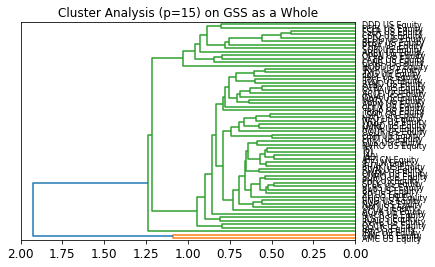

In [72]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(X)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
Z = plot_dendrogram(model, truncate_mode='level',labels=names,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.xlim([2, 0])
ax = plt.gca()
#plt.rc({'font.size':'12'})
plt.rc('axes', titlesize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.title("Cluster Analysis (p=15) on GSS as a Whole")
plt.savefig(dirpath+"Total_Cluster.png") 


## Shorts

In [73]:
attrib

PK  Weights          STRATEGY
3     AAL US Equity  -0.0017       SHORT HEDGE
4    ACCD US Equity  -0.0002       IPO&HD beta
5    ACVA US Equity  -0.0003       IPO&HD beta
6     AEO US Equity  -0.0015     DISCRETIONARY
7     AMC US Equity  -0.0060       SHORT ALPHA
..              ...      ...               ...
130   WSM US Equity  -0.0016     DISCRETIONARY
131   WTW US Equity   0.0215  LOW VOL, QUALITY
132    XP US Equity  -0.0004   FAILURE MODEL A
133   ZEN US Equity  -0.0004   FAILURE MODEL A
134   ZZZ CN Equity  -0.0010     DISCRETIONARY

[107 rows x 3 columns]

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Short Positions")

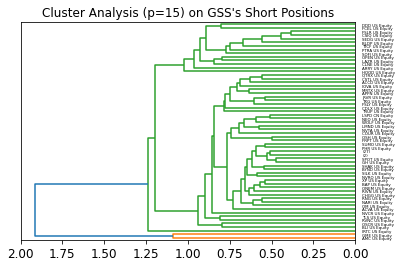

In [74]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(sX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
sZ = plot_dendrogram(model, truncate_mode='level',labels=snames,
                    p=15,leaf_font_size=6,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.xlim([2, 0])

ax = plt.gca()
#plt.rc({'font.size':'12'})
plt.rc('axes', titlesize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=4)
plt.title("Cluster Analysis (p=15) on GSS\'s Short Positions")
plt.savefig(dirpath+"Short_Cluster.png") 



C:\Users\jknechtel\Miniconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


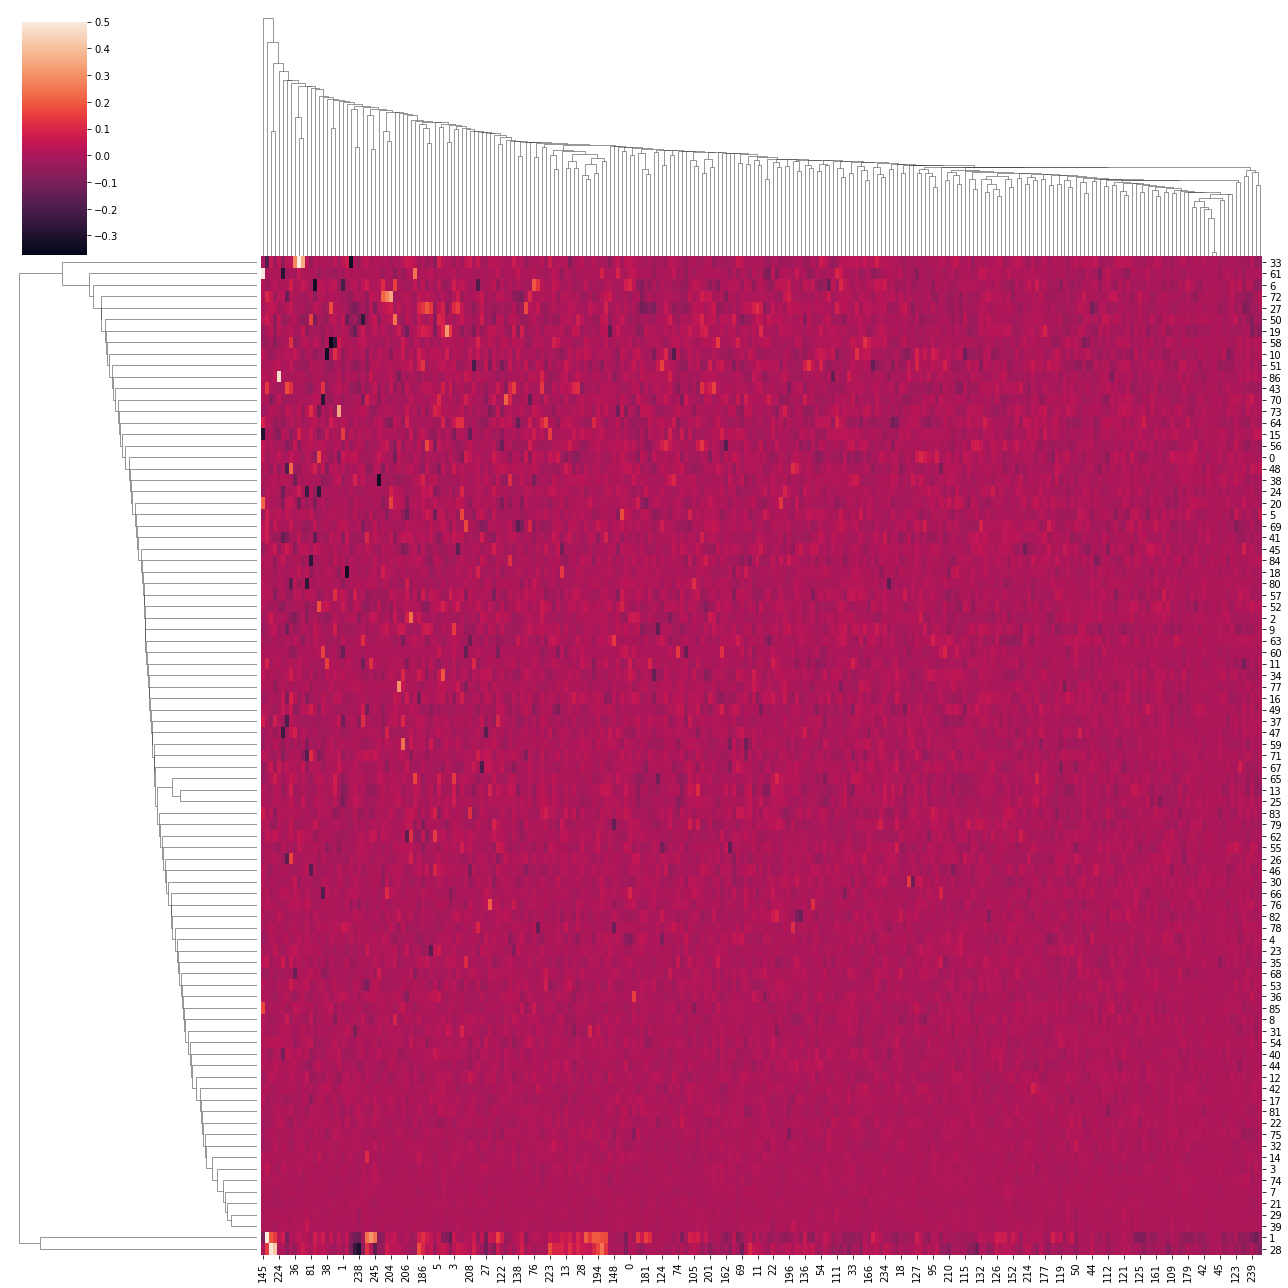

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(sX, figsize=(18,18),  yticklabels=True)

## Longs

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Long Positions")

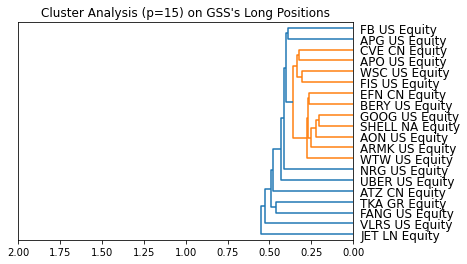

In [76]:
#model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(lX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
lZ = plot_dendrogram(model, truncate_mode='level',labels=lnames,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
#plt.ytick(fontsize=6)
plt.rc('ytick', labelsize=8) 
#plt.xlabel('xlabel', fontsize=18)
plt.xlim([2, 0])
plt.title("Cluster Analysis (p=15) on GSS\'s Long Positions")
plt.savefig(dirpath+"Long_Cluster.png") 

In [77]:
model.children_.shape[0]
model.labels_

19

array([19, 12, 17, 16, 11, 13, 18, 14, 15,  5, 10,  6,  7,  2,  8,  9,  3,
        4,  1,  0], dtype=int64)

In [78]:
#residuals['AC-15 (longs)'] 
model.labels_.T

array([19, 12, 17, 16, 11, 13, 18, 14, 15,  5, 10,  6,  7,  2,  8,  9,  3,
        4,  1,  0], dtype=int64)

In [79]:
residuals['AC-15 (longs)'].sort_values()

KeyError: 'AC-15 (longs)'

# Regional Style Factors

In [80]:
#dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
dirpath = 'C:/Users/jknechtel/Documents/Equity Risk Modeling/'
ffile = 'FactorTSraw_hist.xlsx'
#tab = 'bbTickers'

In [81]:
usfactors = pd.read_excel(dirpath+ffile,sheet_name='USAM')
cafactors = pd.read_excel(dirpath+ffile,sheet_name='CAND')
wldfactors = pd.read_excel(dirpath+ffile,sheet_name='WRLD')
usfactors.set_index('date',inplace=True)
usfactors.sort_index(inplace=True) 
cafactors.set_index('date',inplace=True)
cafactors.sort_index(inplace=True) 
wldfactors.set_index('date',inplace=True)
wldfactors.sort_index(inplace=True) 
us_frets = usfactors.pct_change()
ca_frets = cafactors.pct_change()
wld_frets = wldfactors.pct_change()

In [82]:
sdate
date
#us_frets = us_frets.loc[sdate:]
#ca_frets = ca_frets.loc[sdate:]
#wld_frets = wld_frets.loc[sdate:]

'2021-04-06'

'2022-03-24'

In [92]:
with pd.ExcelWriter(dirpath+'Factor Detailed Stats '+date+'.xlsx') as writer:  
    us_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(writer,sheet_name = 'US Factor Detailed Stats')
    ca_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(writer,sheet_name = 'CA Factor Detailed Stats')
    wld_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(writer,sheet_name = 'WLD Factor Detailed Stats')
    pd.options.display.float_format = "{:,.2}".format  
    uscorr = us_frets.loc[sdate:].corr()
    uscorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'US Factor Correlations')
    cacorr = ca_frets.loc[sdate:].corr()
    cacorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'CA Factor Correlations')
    wldcorr = wld_frets.loc[sdate:].corr()
    wldcorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'WLD Factor Correlations')
    mri.SimpleRets(usfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'US Factor Returns')
    mri.SimpleRets(cafactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'CA Factor Returns')
    mri.SimpleRets(wldfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'WLD Factor Returns')

In [84]:

ca_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'CA Factor Detailed Stats.xlsx')

In [85]:
wld_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'WLD Factor Detailed Stats.xlsx')

In [11]:
us_frets

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
date                                                                 
2002-01-22                NaN                 NaN              NaN   
2002-01-23             0.0010              0.0004          -0.0001   
2002-01-24             0.0015             -0.0011          -0.0027   
2002-01-25             0.0001              0.0005          -0.0011   
2002-01-28             0.0009              0.0002          -0.0028   
...                       ...                 ...              ...   
2022-03-03             0.0018             -0.0008          -0.0041   
2022-03-04             0.0016             -0.0014          -0.0010   
2022-03-07             0.0024              0.0005          -0.0002   
2022-03-08            -0.0006              0.0001          -0.0026   
2022-03-09             0.0000              0.0000           0.0000   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
date                                                                 
2002-01-22                NaN                 NaN              NaN   
2002-01-23            -0.0001              0.0012           0.0131   
2002-01-24            -0.0012              0.0020           0.0074   
2002-01-25            -0.0002              0.0002           0.0024   
2002-01-28            -0.0005             -0.0006           0.0005   
...                       ...                 ...              ...   
2022-03-03             0.0013             -0.0005          -0.0101   
2022-03-04             0.0007              0.0006          -0.0138   
2022-03-07            -0.0011             -0.0000          -0.0316   
2022-03-08            -0.0008             -0.0002          -0.0005   
2022-03-09             0.0000              0.0000           0.0000   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
date                                                                
2002-01-22                NaN              NaN                NaN   
2002-01-23             0.0001           0.0021            -0.0002   
2002-01-24            -0.0045          -0.0003            -0.0019   
2002-01-25             0.0001          -0.0001             0.0002   
2002-01-28             0.0017           0.0007            -0.0004   
...                       ...              ...                ...   
2022-03-03             0.0038           0.0022             0.0018   
2022-03-04             0.0050           0.0011             0.0006   
2022-03-07            -0.0032          -0.0010             0.0009   
2022-03-08            -0.0029          -0.0016            -0.0036   
2022-03-09             0.0000           0.0000             0.0000   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
date                                                           
2002-01-22            NaN                NaN             NaN   
2002-01-23        -0.0026            -0.0027          0.0009   
2002-01-24        -0.0014            -0.0008         -0.0018   
2002-01-25        -0.0006            -0.0011          0.0003   
2002-01-28        -0.0001             0.0008          0.0017   
...                   ...                ...             ...   
2022-03-03        -0.0003             0.0031          0.0024   
2022-03-04        -0.0010             0.0024         -0.0009   
2022-03-07        -0.0019             0.0062         -0.0025   
2022-03-08        -0.0002            -0.0013          0.0033   
2022-03-09         0.0000             0.0000          0.0000   

            FMI_USAM_VOLATILITY  
date                             
2002-01-22                  NaN  
2002-01-23               0.0070  
2002-01-24               0.0058  
2002-01-25              -0.0020  
2002-01-28              -0.0008  
...                         ...  
2022-03-03              -0.0106  
2022-03-04              -0.0133  
2022-03-07              -0.0118  
2022-03-08               0.0118  
2022-03-09               0.0000  

[5062 rows x 13 

In [89]:
cs.insertTable(us_frets.loc[sdate:],"EQ_USFactorIndices")
cs.insertTable(ca_frets.loc[sdate:],"EQ_CAFactorIndices")
cs.insertTable(wld_frets.loc[sdate:],"EQ_WLDFactorIndices")

In [13]:
pd.options.display.float_format = "{:,.2}".format  

uscorr = us_frets.loc[sdate:].corr()
uscorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Correlations.xlsx')

In [14]:
pd.options.display.float_format = "{:,.2}".format  

cacorr = ca_frets.loc[sdate:].corr()
cacorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Correlations.xlsx')


In [15]:
pd.options.display.float_format = "{:,.2}".format  

wldcorr = wld_frets.loc[sdate:].corr()
wldcorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Correlations.xlsx')

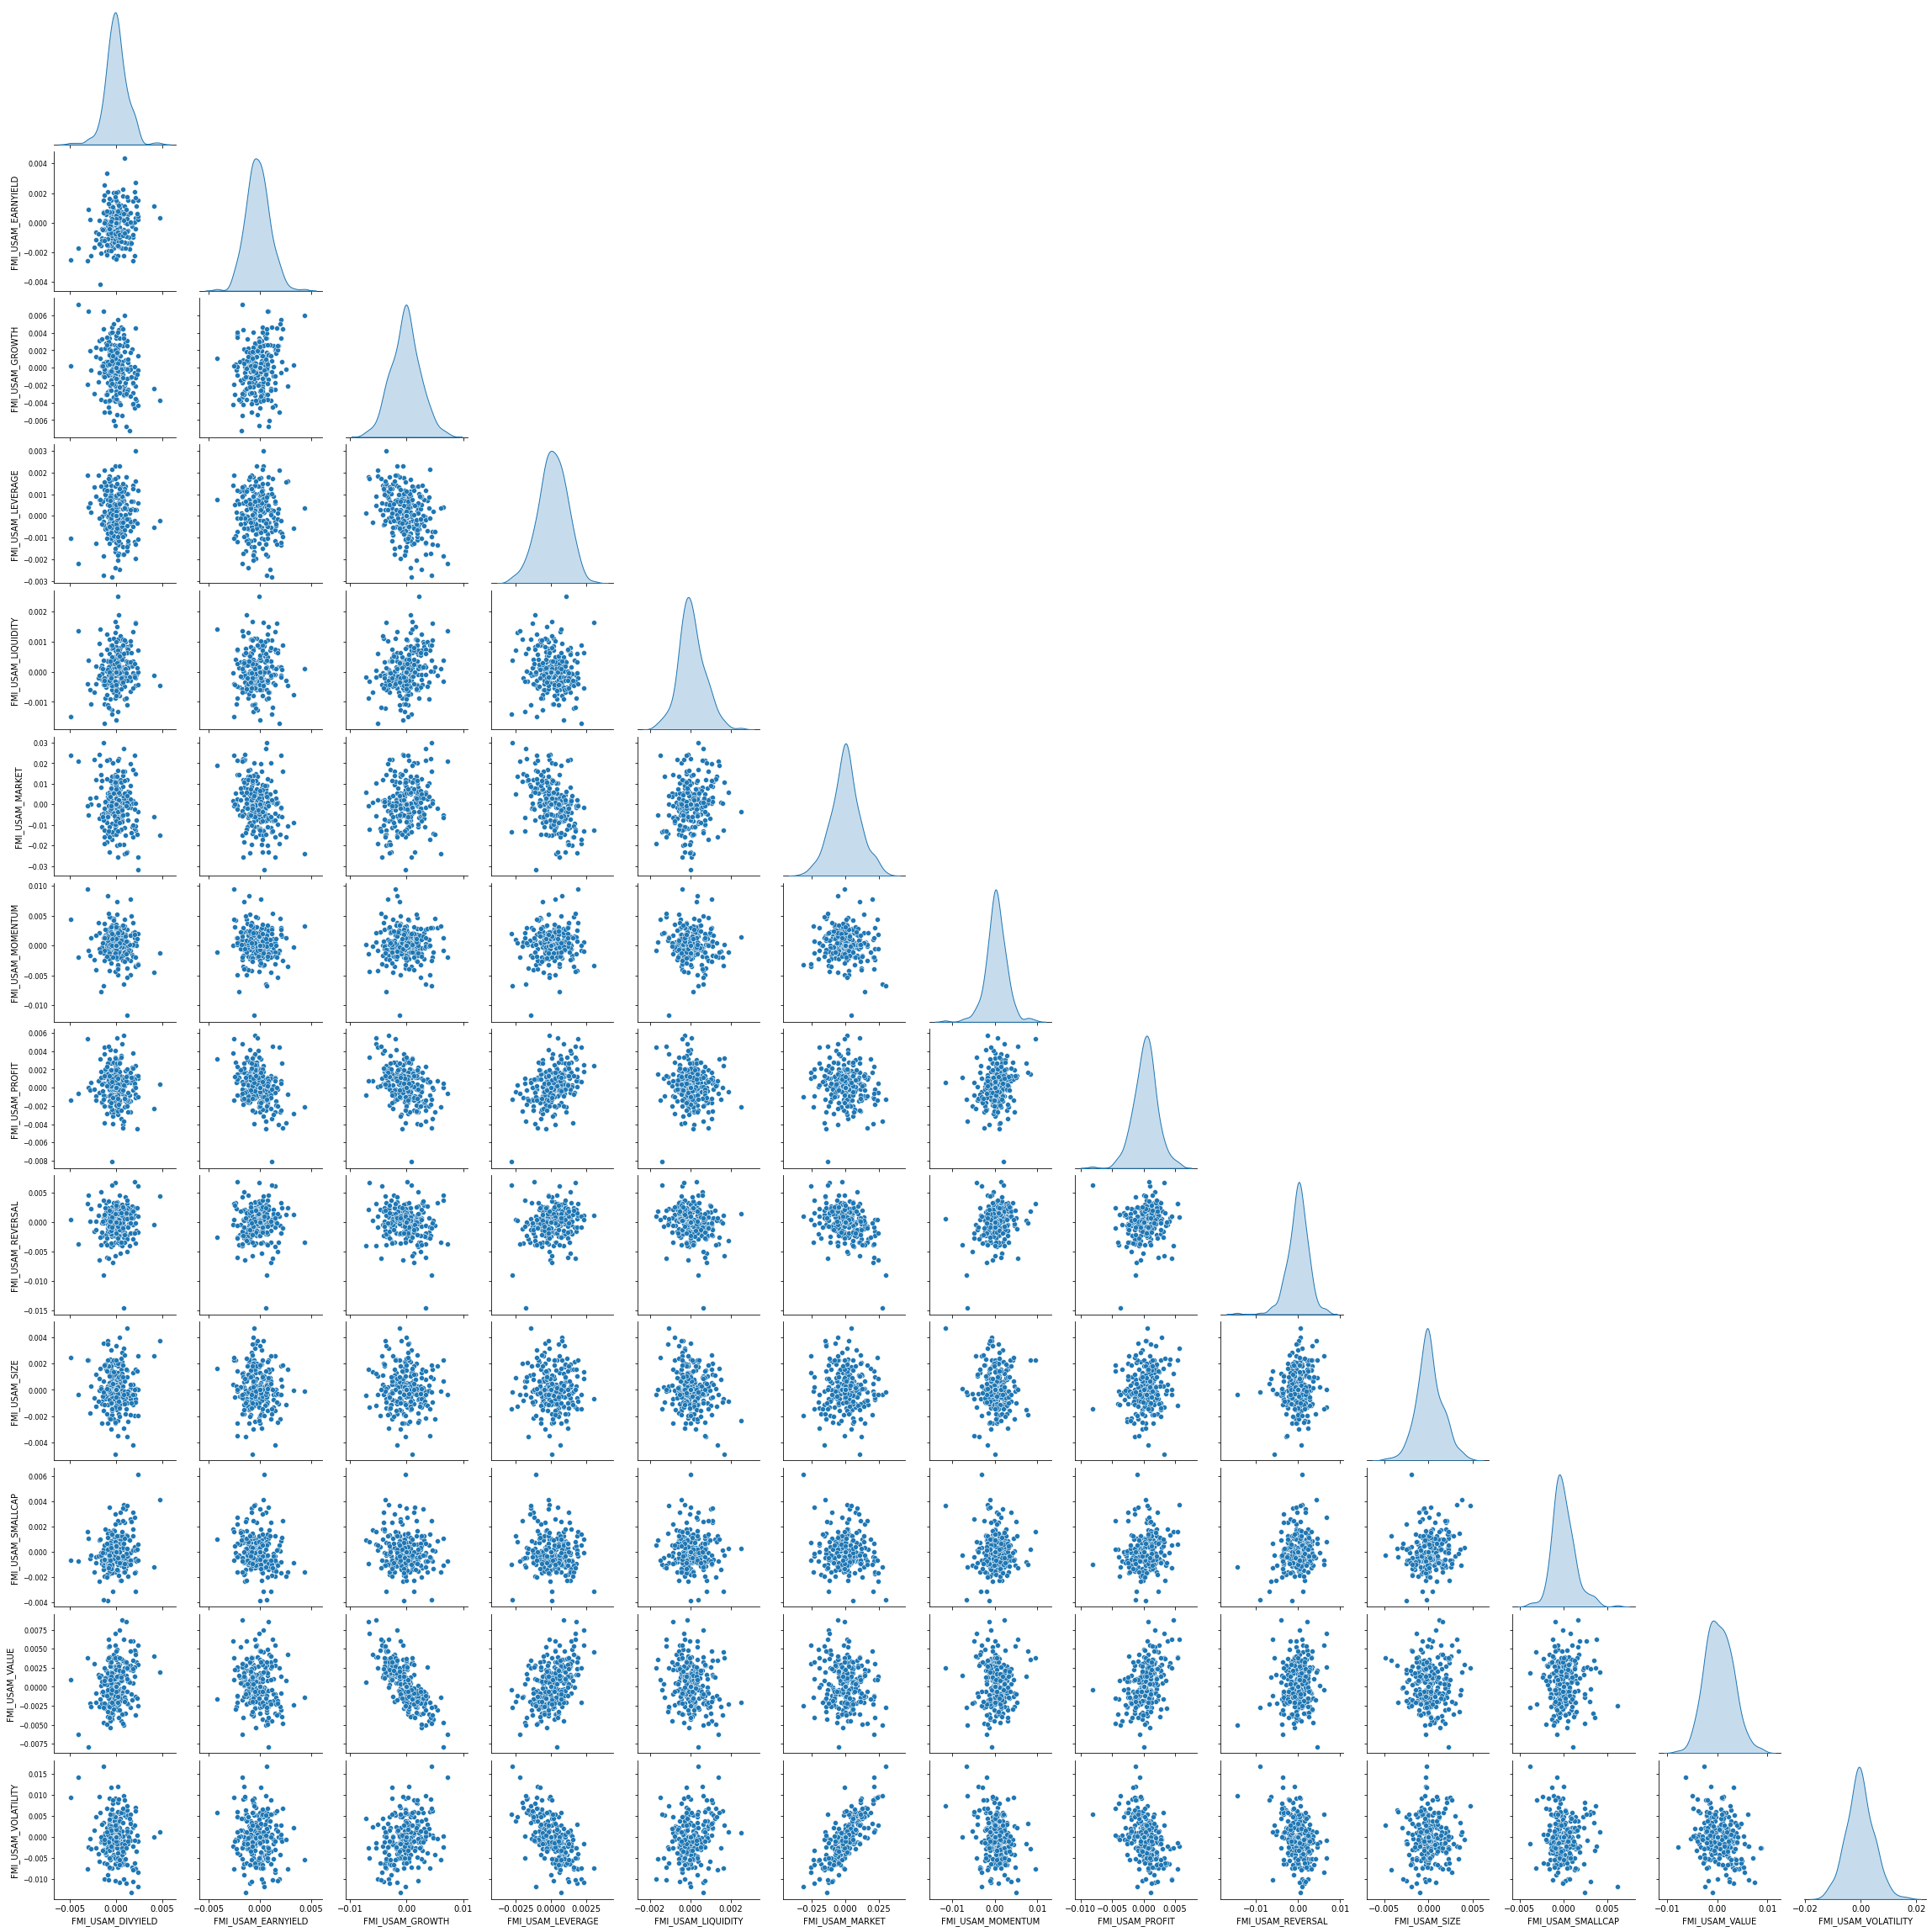

In [86]:

sns_plot = sns.pairplot(us_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"USStyleFactors_PairPlot.png") 

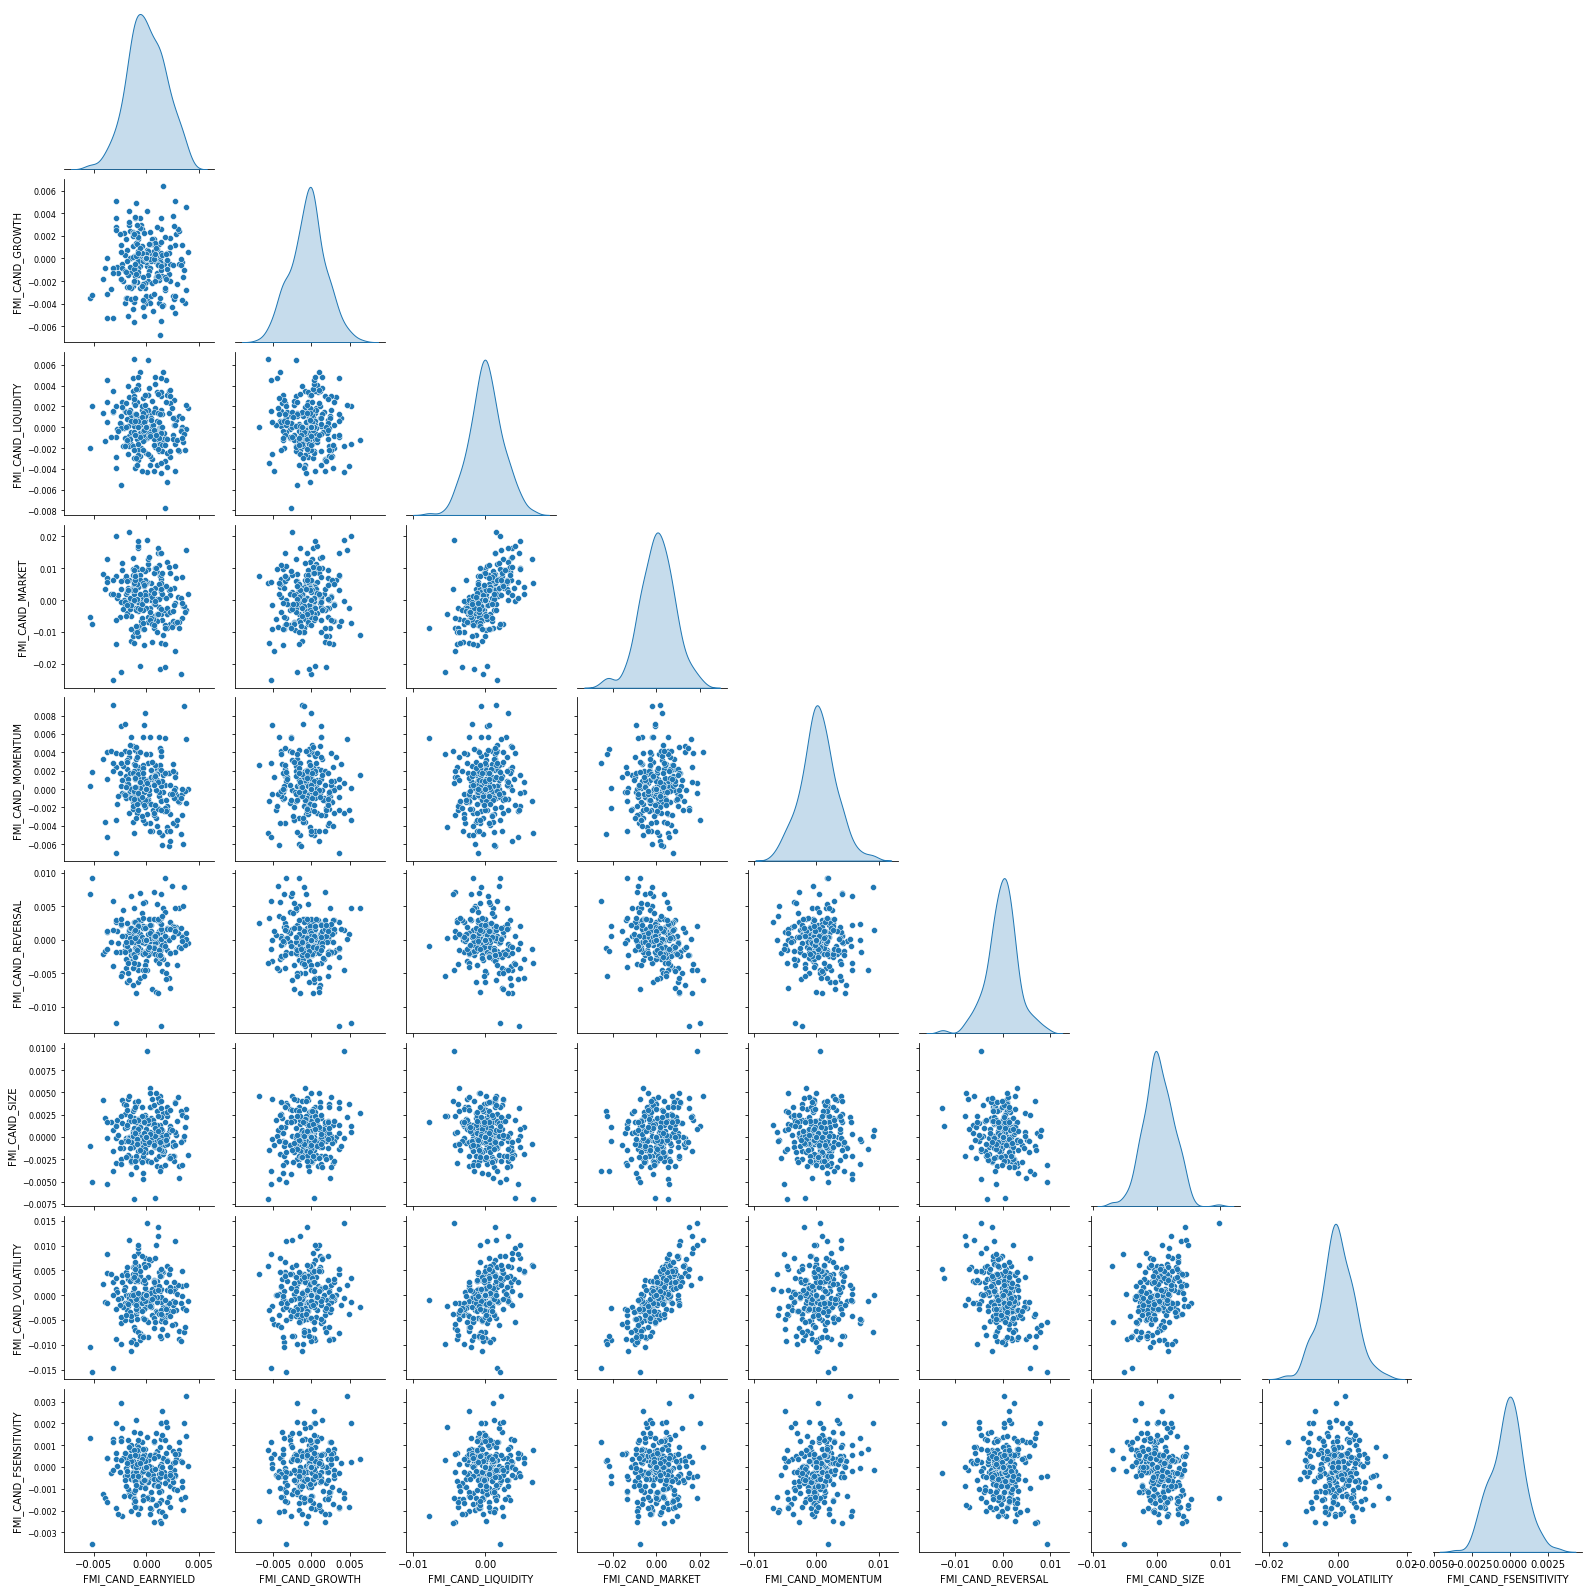

In [87]:
sns_plot = sns.pairplot(ca_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"CAStyleFactors_PairPlot.png") 

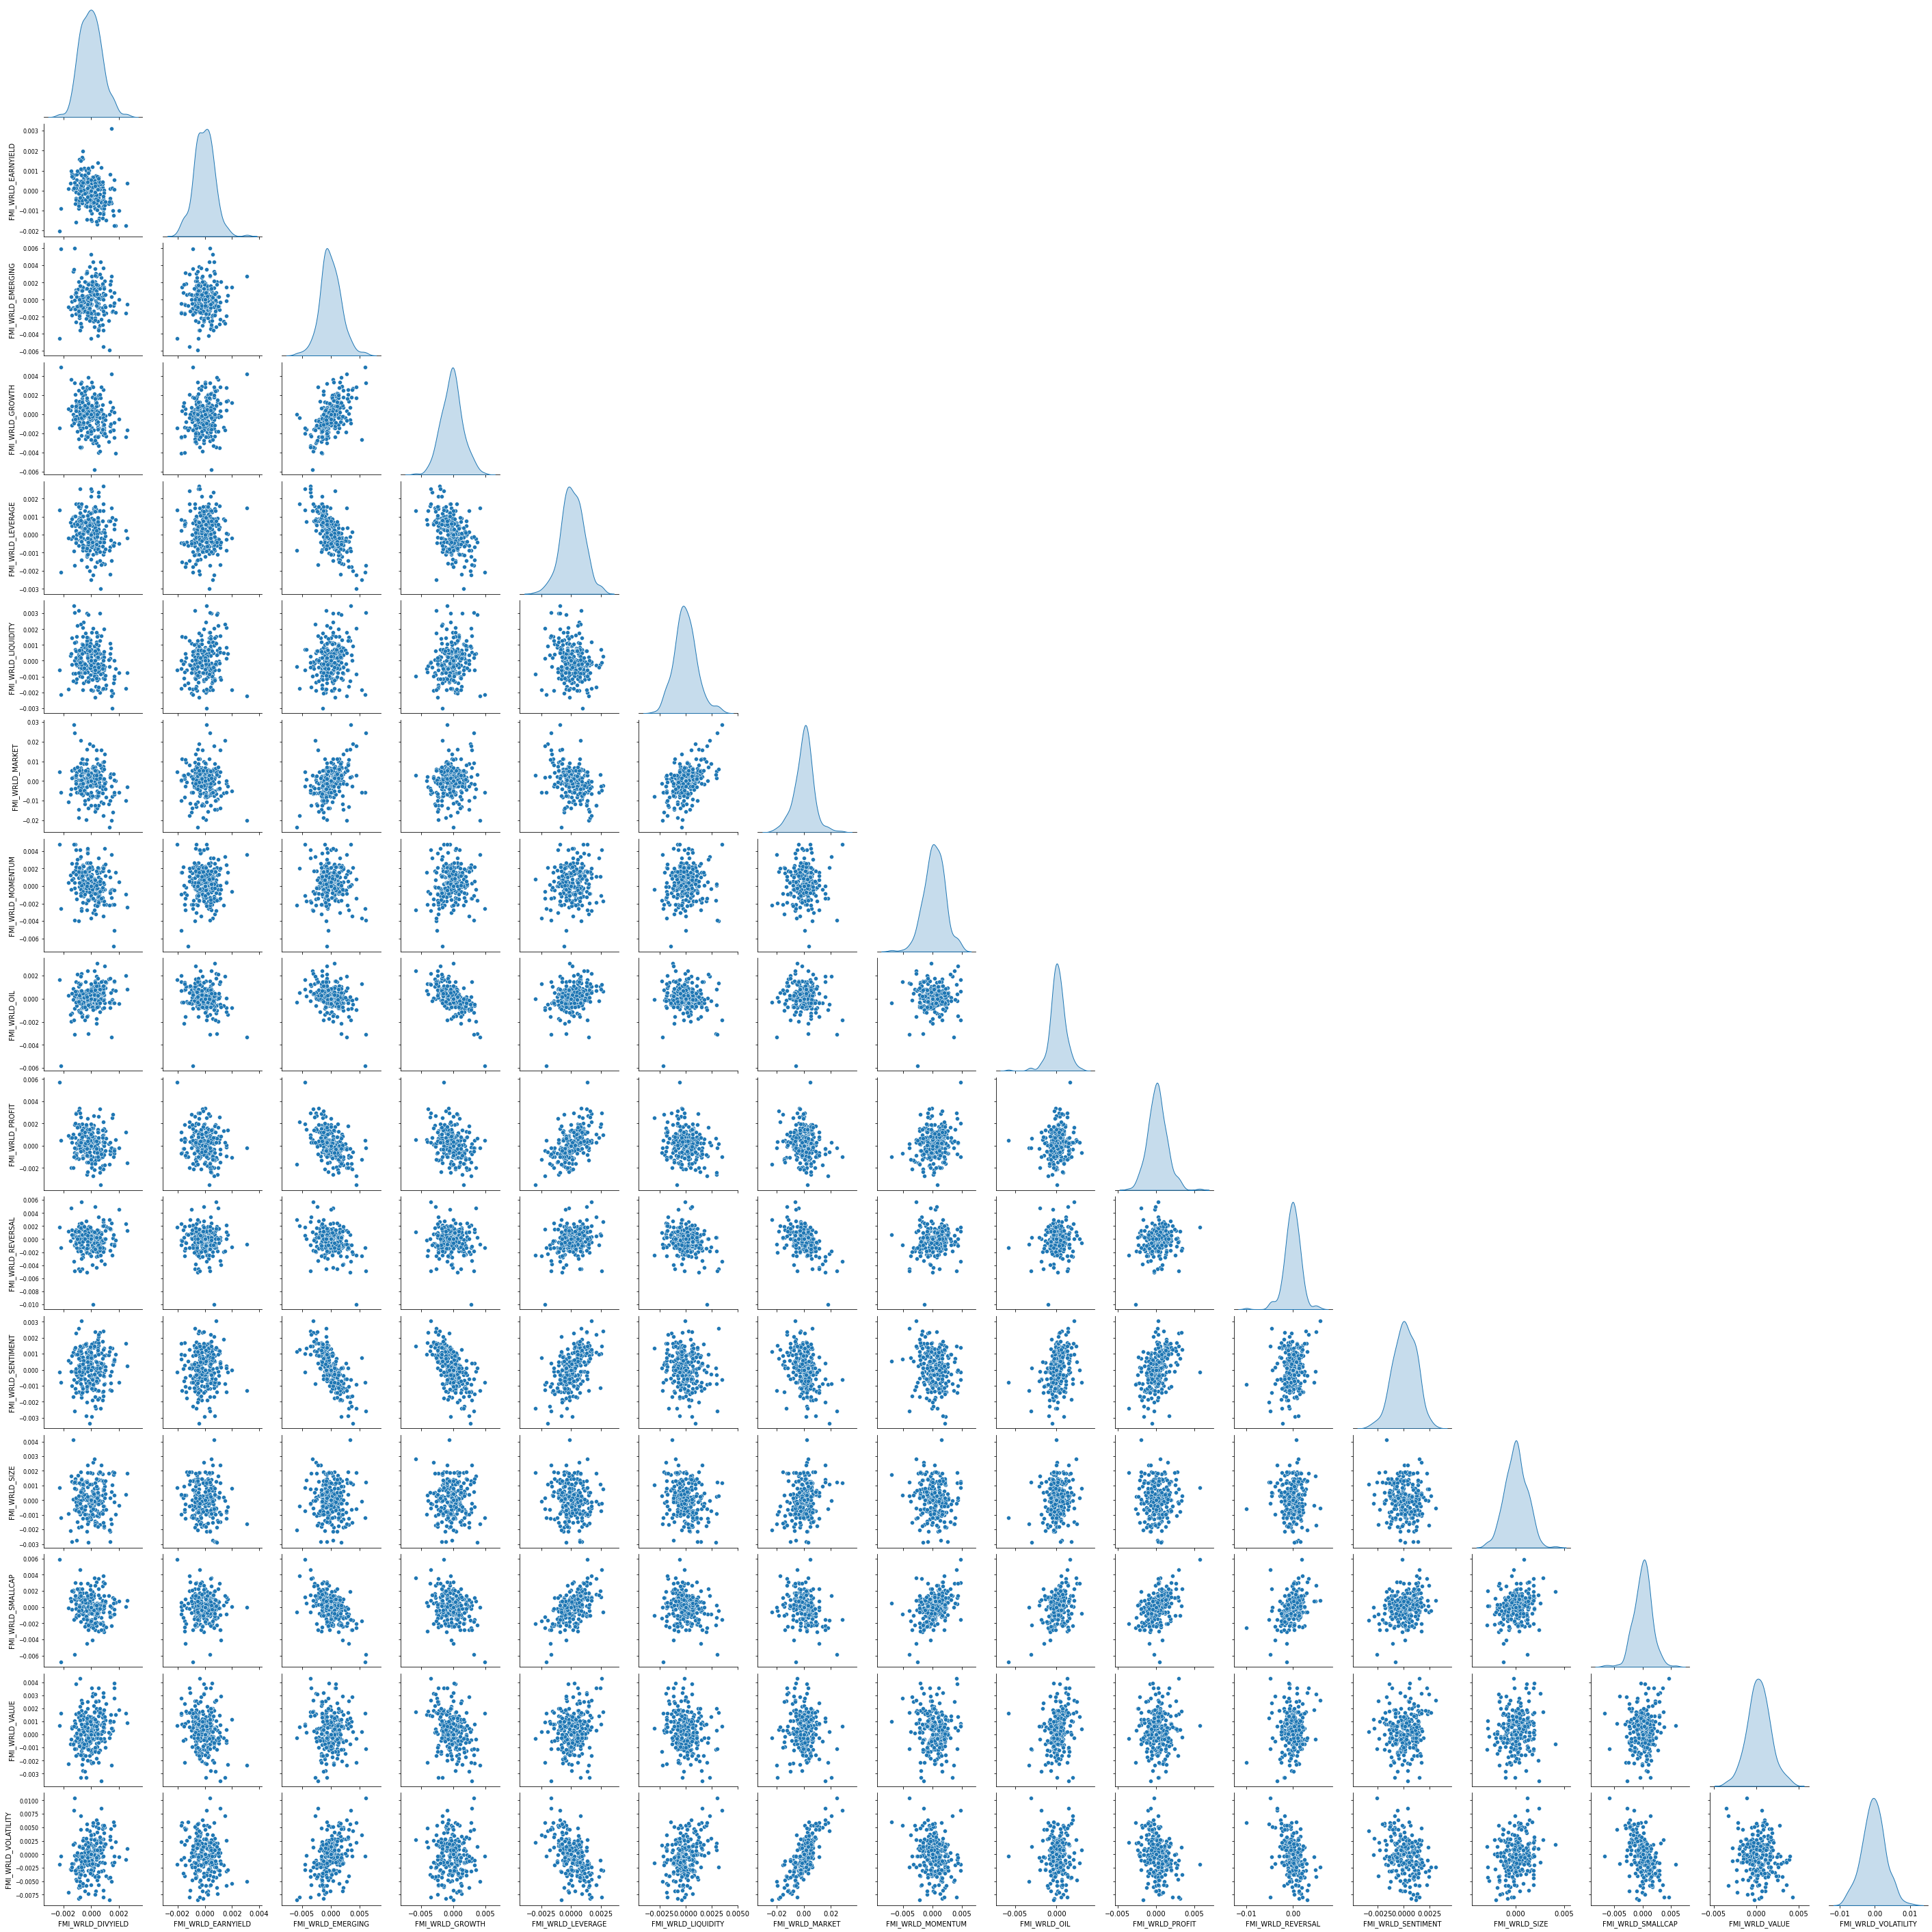

In [88]:
sns_plot = sns.pairplot(wld_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"WldStyleFactors_PairPlot.png") 

In [22]:
mri.SimpleRets(usfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Returns.xlsx')
mri.SimpleRets(cafactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Returns.xlsx')
mri.SimpleRets(wldfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Returns.xlsx')

In [ ]:
usfactors.columns.str.lstrip('FMI_USAM')

## Factor Turbulence

In [91]:
import MacroRiskIndictators as mri

In [105]:
returns = us_frets.join(wld_frets).join(ca_frets)

In [106]:
corr = returns.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='RdBu').set_precision(2)

C:\Users\JKNECH~1\AppData\Local\Temp/ipykernel_36308/1955355093.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='RdBu').set_precision(2)


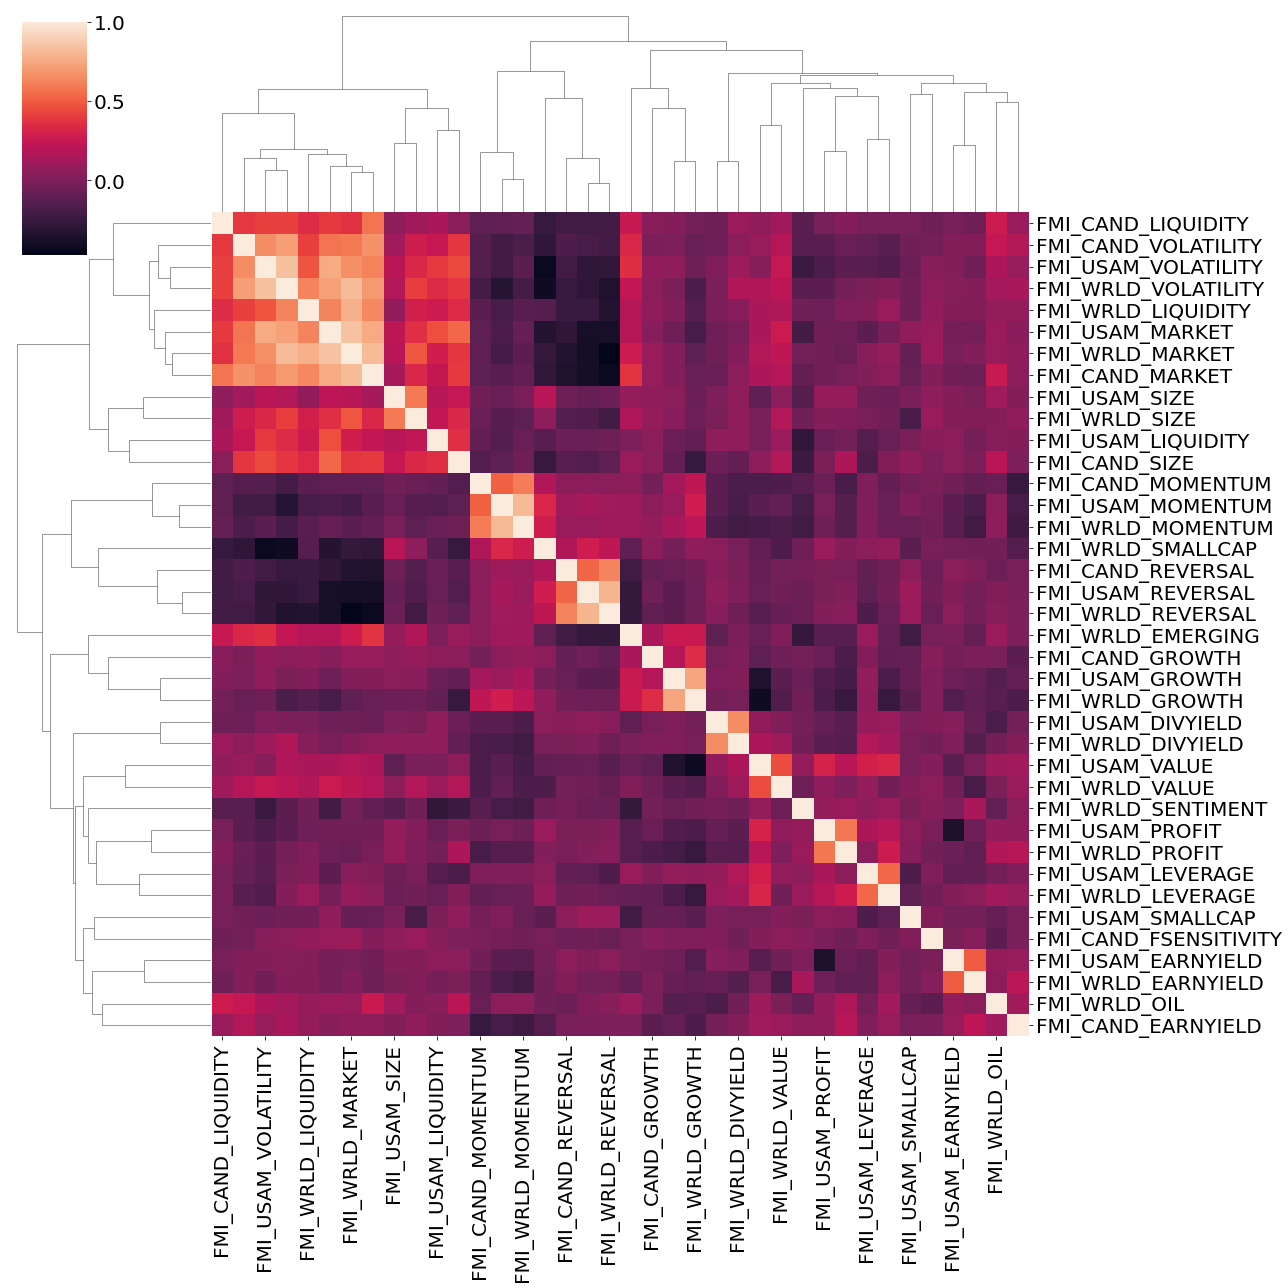

In [107]:
#import seaborn as sns
#import matplotlib.pyplot as plt
sns.clustermap(returns.corr(), figsize=(18,18),  yticklabels=True).savefig(dirpath+'Alladin Factor Cluster Map.png')

In [36]:
us_frets.index.name = 'Dates'
us_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(us_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(us_frets, window_size=250)

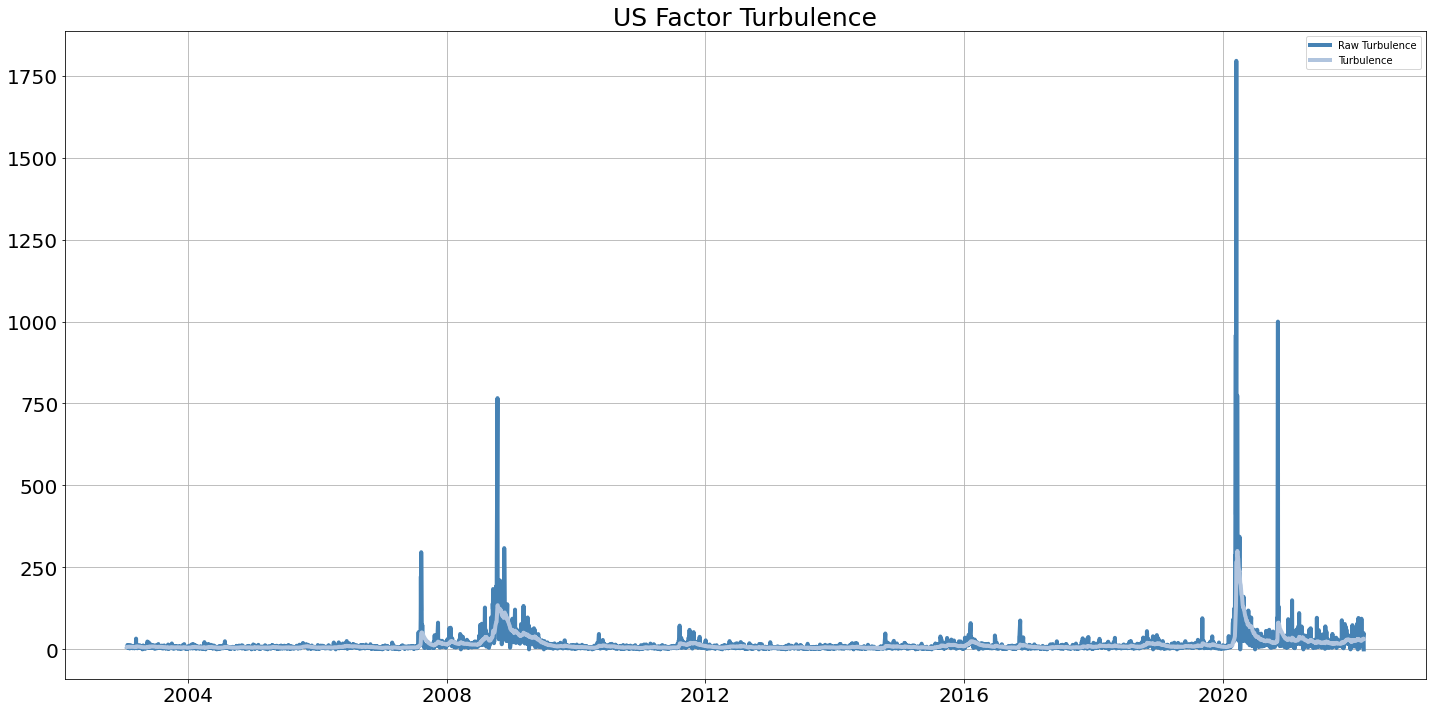

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Turbulence'}>)

In [37]:
utils.StandardLinePlot(turbulence.set_index('Dates'),"US Factor Turbulence",save=True)

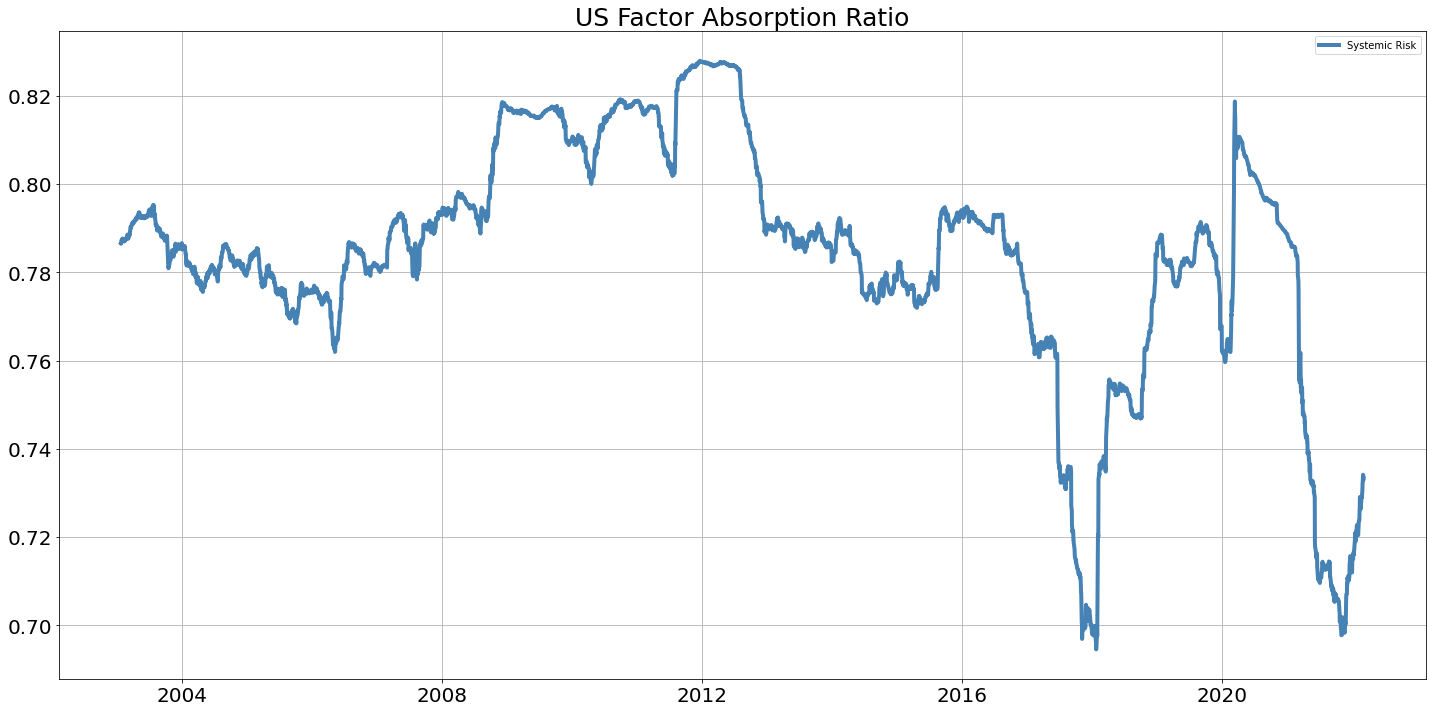

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Absorption Ratio'}>)

In [38]:

utils.StandardLinePlot(absorbRatio.set_index('Dates'),"US Factor Absorption Ratio",save=True)

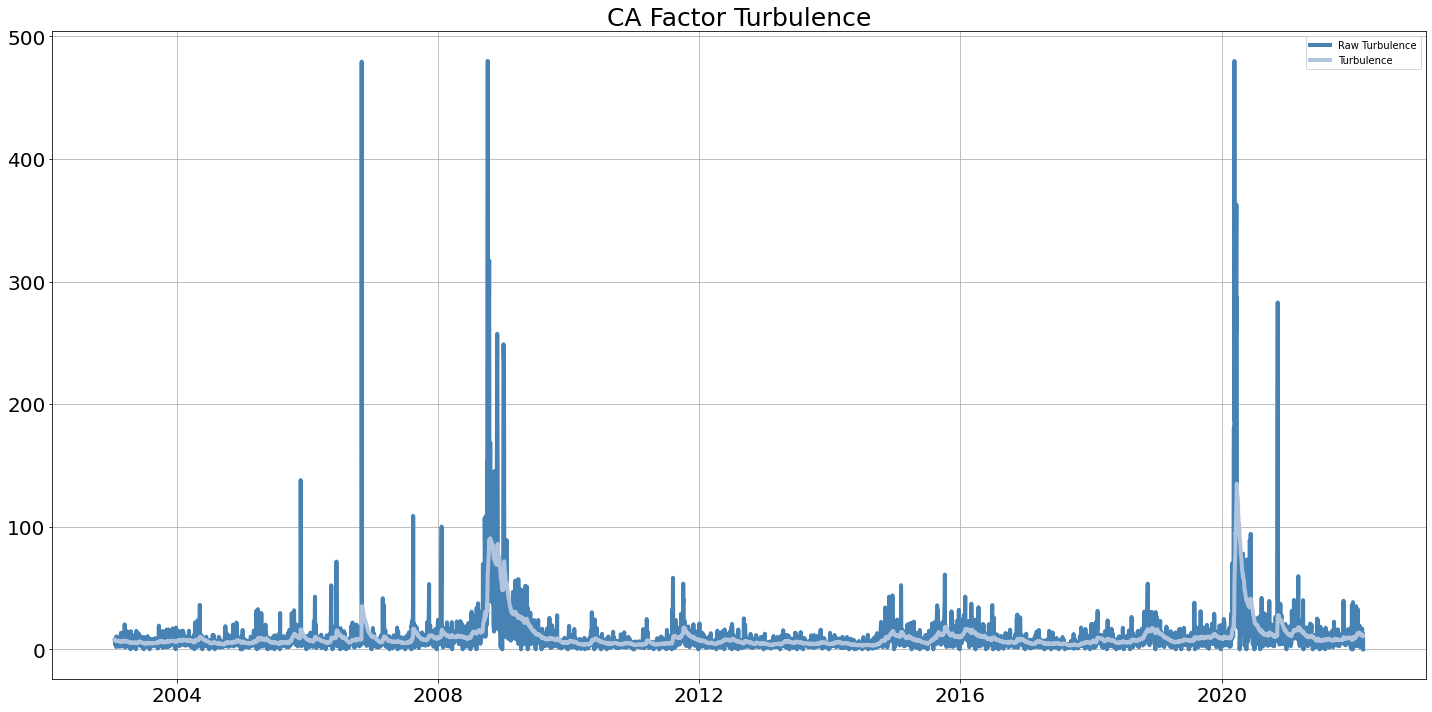

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'CA Factor Turbulence'}>)

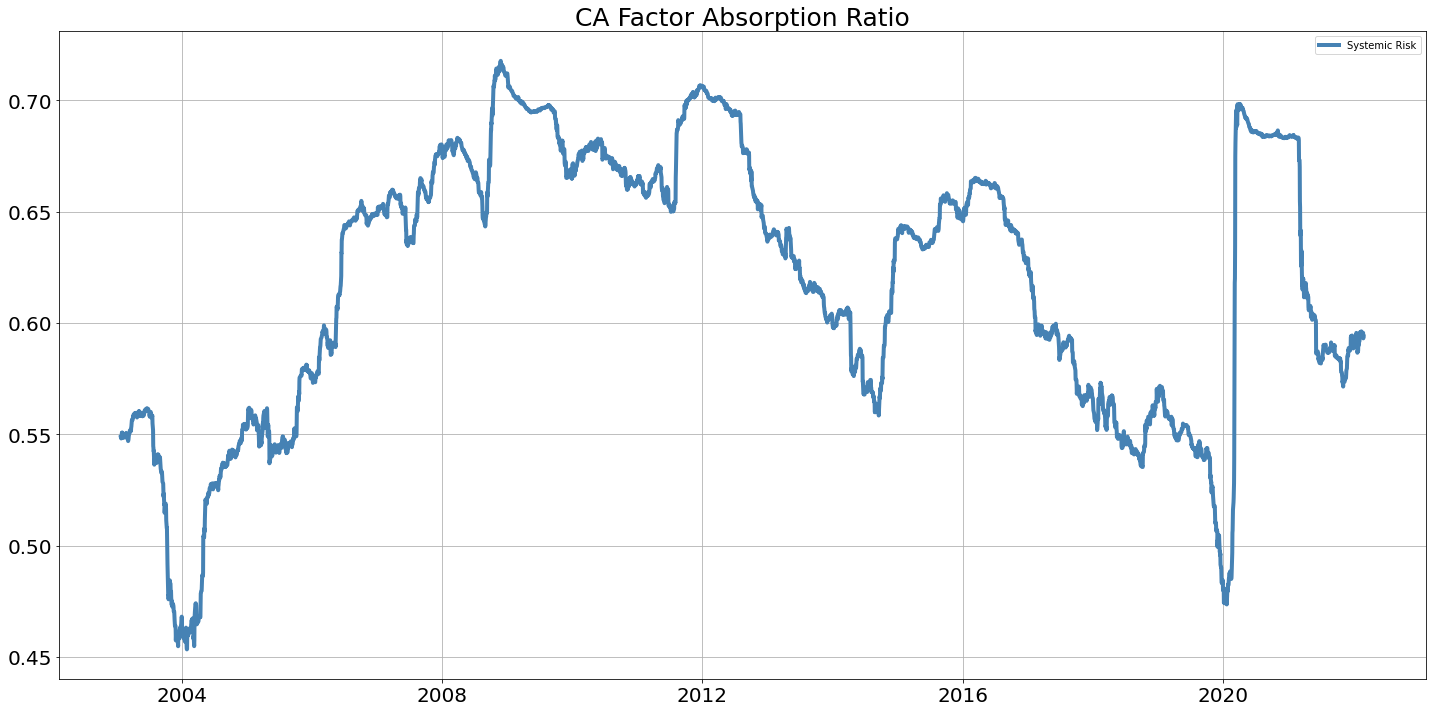

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'CA Factor Absorption Ratio'}>)

In [83]:
ca_frets.index.name = 'Dates'
ca_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(ca_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(ca_frets, window_size=250)
utils.StandardLinePlot(turbulence.set_index('Dates'),"CA Factor Turbulence",save=True)
utils.StandardLinePlot(absorbRatio.set_index('Dates'),"CA Factor Absorption Ratio",save=True)

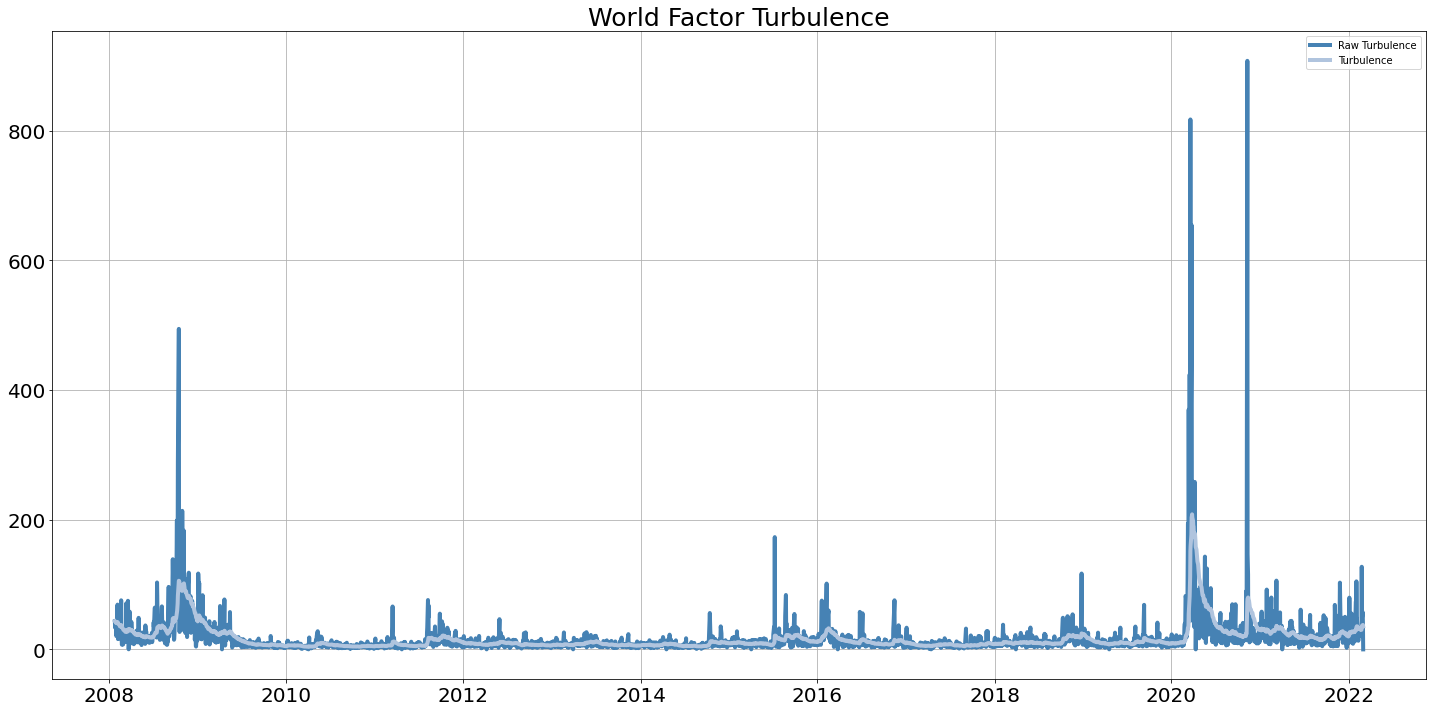

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Turbulence'}>)

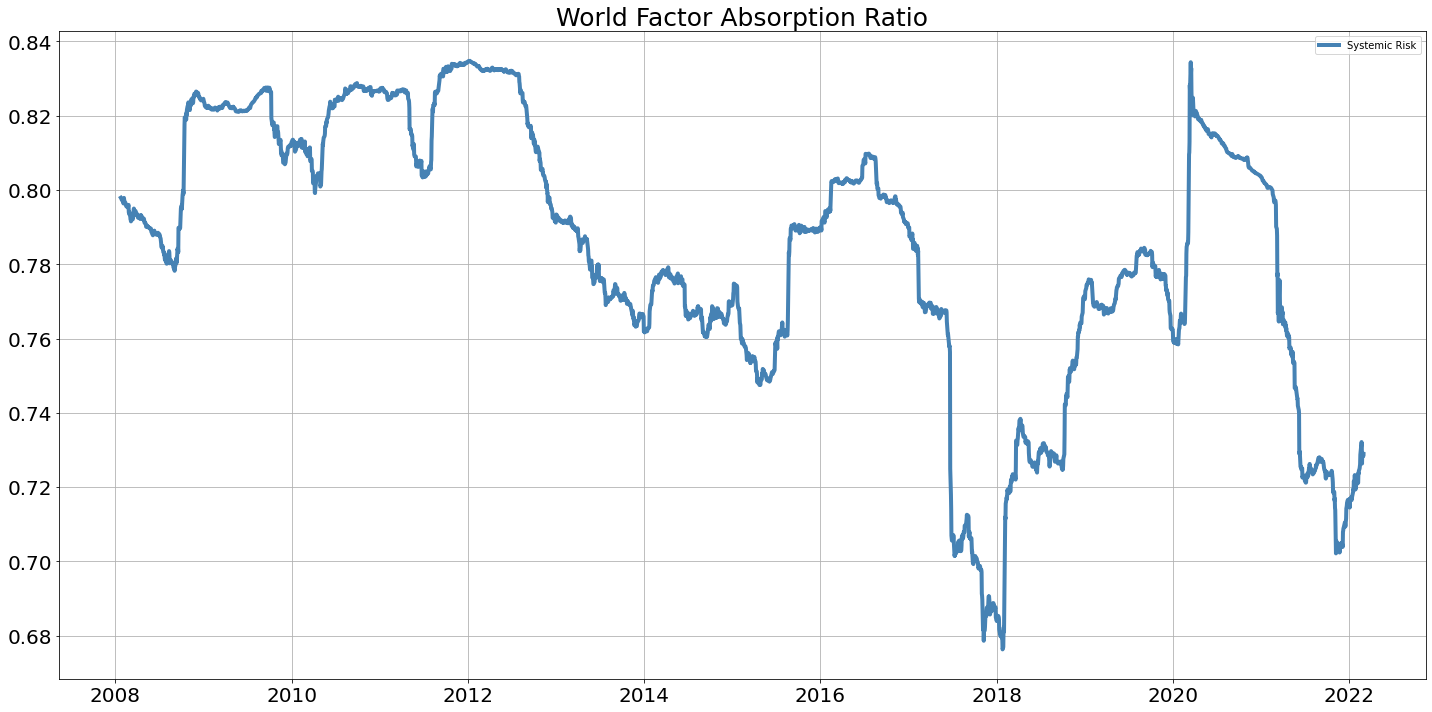

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Absorption Ratio'}>)

In [84]:
wld_frets.index.name = 'Dates'
wld_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(wld_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(wld_frets, window_size=250)
utils.StandardLinePlot(turbulence.set_index('Dates'),"World Factor Turbulence",save=True)
utils.StandardLinePlot(absorbRatio.set_index('Dates'),"World Factor Absorption Ratio",save=True)

## Factor Graphs

In [94]:
#us_frets.set_index('Dates',inplace=True)
us_frets.dropna(how='all',inplace=True)

In [95]:
us_frets

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
date                                                                 
2002-01-23            0.00099             0.00043         -0.00012   
2002-01-24             0.0015             -0.0011          -0.0027   
2002-01-25            0.00013             0.00053          -0.0011   
2002-01-28            0.00092             0.00021          -0.0028   
2002-01-29            0.00051            -5.6e-05          -0.0014   
...                       ...                 ...              ...   
2022-03-18             -0.001             0.00079           0.0026   
2022-03-21            0.00071            -0.00087          -0.0012   
2022-03-22            0.00094            -0.00071           0.0019   
2022-03-23             0.0022             0.00059         -0.00079   
2022-03-24                0.0                 0.0              0.0   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
date                                                                 
2002-01-23           -9.5e-05              0.0012            0.013   
2002-01-24            -0.0012               0.002           0.0074   
2002-01-25            -0.0002             0.00019           0.0024   
2002-01-28           -0.00046            -0.00058           0.0005   
2002-01-29           -0.00047            -0.00093           -0.021   
...                       ...                 ...              ...   
2022-03-18             -0.001              0.0012            0.012   
2022-03-21           -0.00031            -0.00035           -0.005   
2022-03-22           -0.00066              0.0011            0.011   
2022-03-23           -0.00034             0.00012           -0.015   
2022-03-24                0.0                 0.0              0.0   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
date                                                                
2002-01-23            7.3e-05           0.0021           -0.00016   
2002-01-24            -0.0045         -0.00027            -0.0019   
2002-01-25            0.00012         -0.00014            0.00022   
2002-01-28             0.0017          0.00067           -0.00041   
2002-01-29            0.00075          0.00068           -0.00098   
...                       ...              ...                ...   
2022-03-18            -0.0019          0.00016            -0.0038   
2022-03-21             0.0034         -0.00024             0.0025   
2022-03-22            -0.0027          -0.0012            -0.0021   
2022-03-23             0.0011          -0.0045             0.0024   
2022-03-24                0.0              0.0                0.0   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
date                                                           
2002-01-23        -0.0026            -0.0027         0.00088   
2002-01-24        -0.0014           -0.00077         -0.0018   
2002-01-25        -0.0006            -0.0011         0.00028   
2002-01-28       -0.00011            0.00085          0.0017   
2002-01-29        -0.0052            -0.0012         0.00056   
...                   ...                ...             ...   
2022-03-18        0.00012             -0.002         -0.0049   
2022-03-21        0.00098           -0.00029          0.0021   
2022-03-22         0.0026           -0.00089         -0.0019   
2022-03-23         0.0014            0.00024         -0.0015   
2022-03-24            0.0                0.0             0.0   

            FMI_USAM_VOLATILITY  
date                             
2002-01-23                0.007  
2002-01-24               0.0058  
2002-01-25               -0.002  
2002-01-28             -0.00079  
2002-01-29              -0.0088  
...                         ...  
2022-03-18               0.0067  
2022-03-21              -0.0035  
2022-03-22               0.0088  
2022-03-23              0.00037  
2022-03-24                  0.0  

[5072 rows x 13 

In [96]:
usfactors

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
date                                                                 
2002-01-22               0.99                 1.1              0.9   
2002-01-23               0.99                 1.1              0.9   
2002-01-24                1.0                 1.1              0.9   
2002-01-25                1.0                 1.1              0.9   
2002-01-28                1.0                 1.1              0.9   
...                       ...                 ...              ...   
2022-03-18               0.91                0.98             0.84   
2022-03-21               0.91                0.98             0.84   
2022-03-22               0.91                0.98             0.84   
2022-03-23               0.91                0.98             0.84   
2022-03-24               0.91                0.98             0.84   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
date                                                                 
2002-01-22                1.0                0.97              2.7   
2002-01-23                1.0                0.97              2.7   
2002-01-24                1.0                0.97              2.8   
2002-01-25                1.0                0.97              2.8   
2002-01-28                1.0                0.97              2.8   
...                       ...                 ...              ...   
2022-03-18                1.0                 1.0          2.5e+01   
2022-03-21                1.0                 1.0          2.5e+01   
2022-03-22               0.99                 1.0          2.6e+01   
2022-03-23               0.99                 1.0          2.5e+01   
2022-03-24               0.99                 1.0          2.5e+01   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
date                                                                
2002-01-22                1.4              1.2               0.51   
2002-01-23                1.4              1.2               0.51   
2002-01-24                1.4              1.2               0.51   
2002-01-25                1.4              1.2               0.51   
2002-01-28                1.4              1.2               0.51   
...                       ...              ...                ...   
2022-03-18                1.6              1.7               0.26   
2022-03-21                1.6              1.7               0.26   
2022-03-22                1.6              1.7               0.26   
2022-03-23                1.6              1.7               0.26   
2022-03-24                1.6              1.7               0.26   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
date                                                           
2002-01-22           0.92                1.1             1.2   
2002-01-23           0.92                1.1             1.2   
2002-01-24           0.92                1.1             1.2   
2002-01-25           0.92                1.1             1.2   
2002-01-28           0.92                1.1             1.2   
...                   ...                ...             ...   
2022-03-18           0.83                1.1             1.6   
2022-03-21           0.83                1.1             1.6   
2022-03-22           0.84                1.1             1.6   
2022-03-23           0.84                1.1             1.6   
2022-03-24           0.84                1.1             1.6   

            FMI_USAM_VOLATILITY  
date                             
2002-01-22                  1.3  
2002-01-23                  1.3  
2002-01-24                  1.3  
2002-01-25                  1.3  
2002-01-28                  1.3  
...                         ...  
2022-03-18                  1.7  
2022-03-21                  1.7  
2022-03-22                  1.7  
2022-03-23                  1.7  
2022-03-24                  1.7  

[5073 rows x 13 

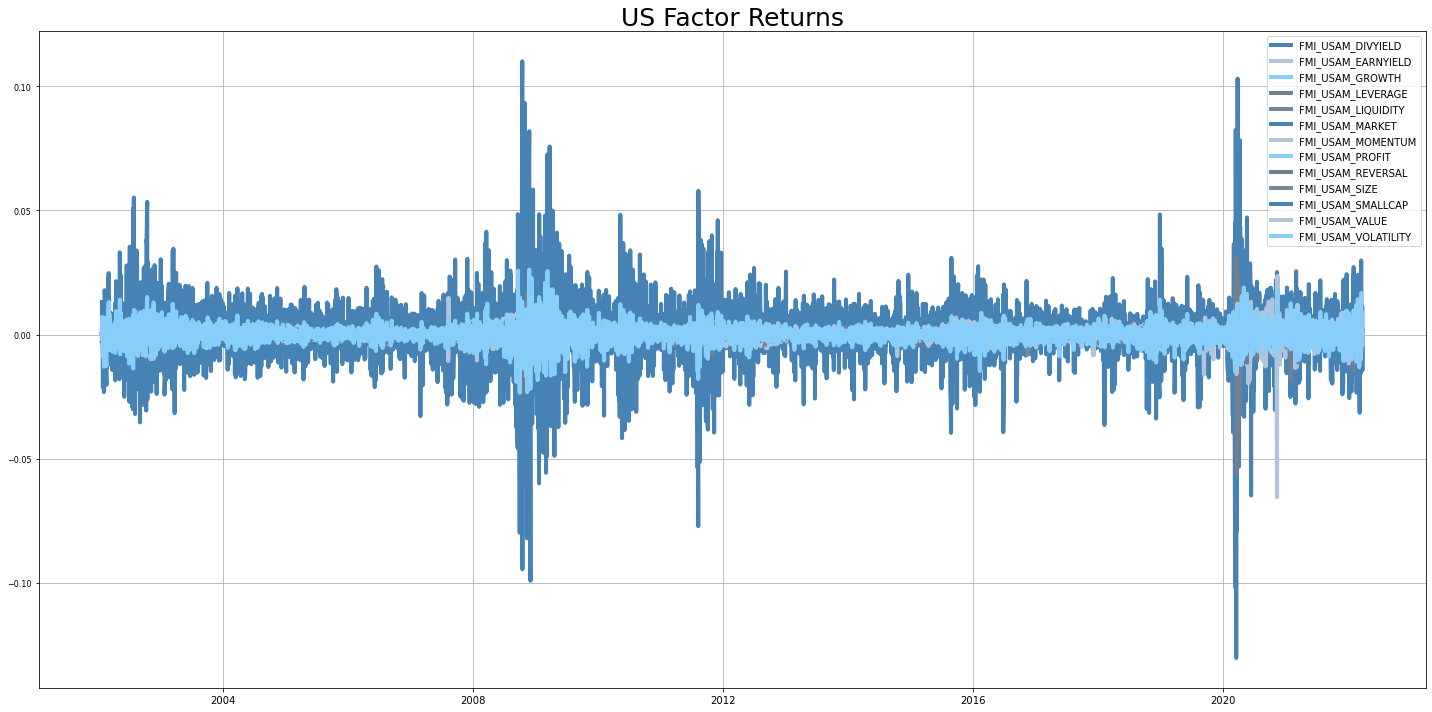

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Returns'}>)

In [97]:

utils.StandardLinePlot(us_frets,"US Factor Returns",save=True)

In [98]:
def MultiLinePlot(graph_data,plot_title,include_lines="",win=120,save=False):
    '''
    Standardized Line Plot with "onbrand" color scheme/theme
    Arguments:
        graph_data: needs to be a DF currently
        plot_title: string
        save: optional, names the file the plot_title
    Returns:
        fig, ax: for further customization if needed
    '''
    fig, ax = plt.subplots(figsize=(20,10))
    parameters = {'xtick.labelsize': 20,'ytick.labelsize': 20,'figure.titlesize': 25}
    plt.rcParams.update(parameters)
    
    if include_lines == 'hist':
        graph_data['Historical average'] = graph_data.expanding(min_periods=12).mean()
        # '#4682b4': steelblue  ,'#b0c4de': lightsteelblue ,'#87cefa':lightskyblue
        # '#708090': slategrey  ,'#778899': lightslategrey ,'#d3d3d3':lightgrey
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa','#708090','#778899']))
    elif include_lines == 'move':
        graph_data[[graph_data.columns[0]]]
        graph_data['Moving {} average'.format(win)] = graph_data[[graph_data.columns[0]]].rolling(win).mean()
        graph_data['-std'] = graph_data[[graph_data.columns[0]]].rolling(win).mean()-graph_data[[graph_data.columns[0]]].rolling(win).std()
        graph_data['+std'] = graph_data[[graph_data.columns[0]]].rolling(win).mean()+graph_data[[graph_data.columns[0]]].rolling(win).std()
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#b0c4de','#b0c4de']))
    #else:
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa','#708090','#778899']))
    
    #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa']))
    ax.plot(graph_data,linewidth=4)
    plt.grid()
    plt.title(plot_title,fontsize=25)
    try:
        plt.legend(graph_data.columns.values) 
    except:
        print("not a dataframe")
    plt.tight_layout()
    plt.show()
    if save:
        fig.savefig(plot_title+'.png',format="png")
    return fig, ax

In [99]:
import matplotlib.pyplot as plt

In [100]:
sdate

'2021-04-06'

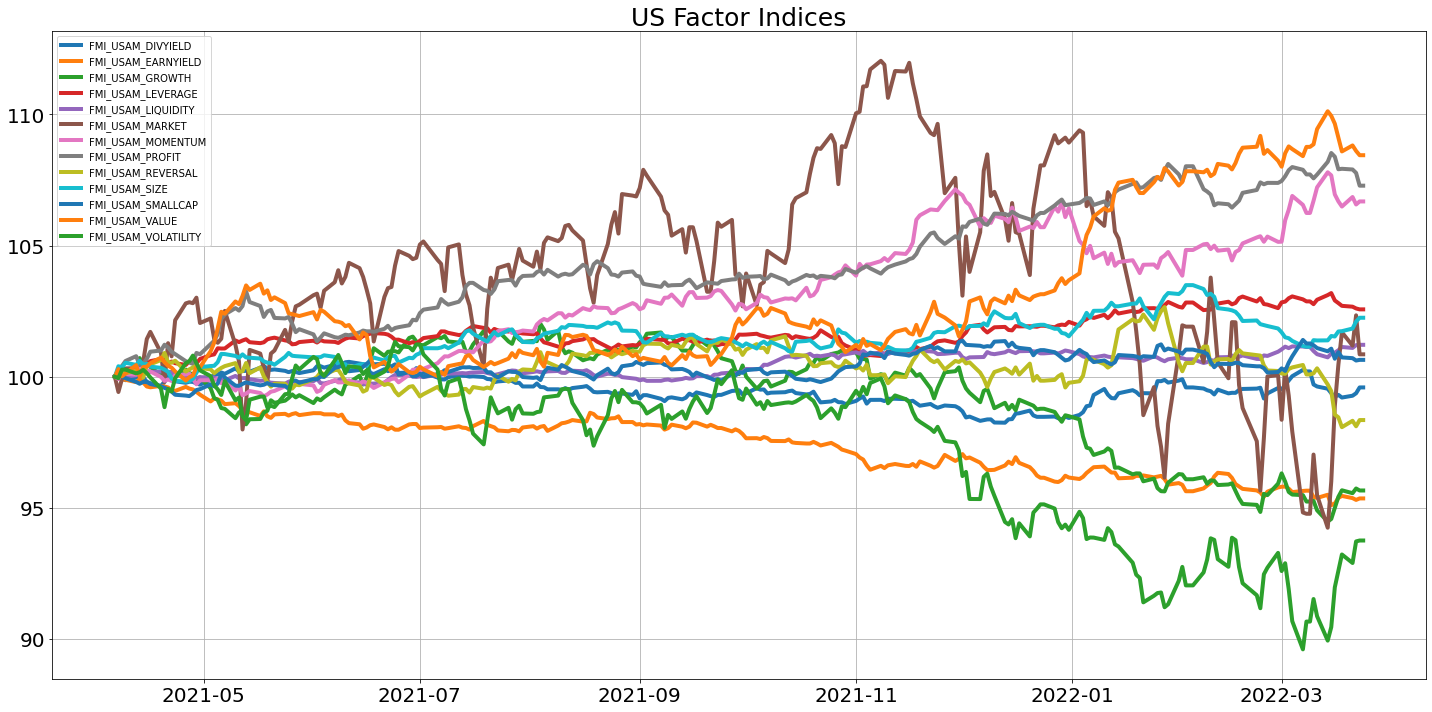

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Indices'}>)

In [101]:

MultiLinePlot(100*usfactors.loc[sdate:]/usfactors.loc[sdate],"US Factor Indices",save=True)

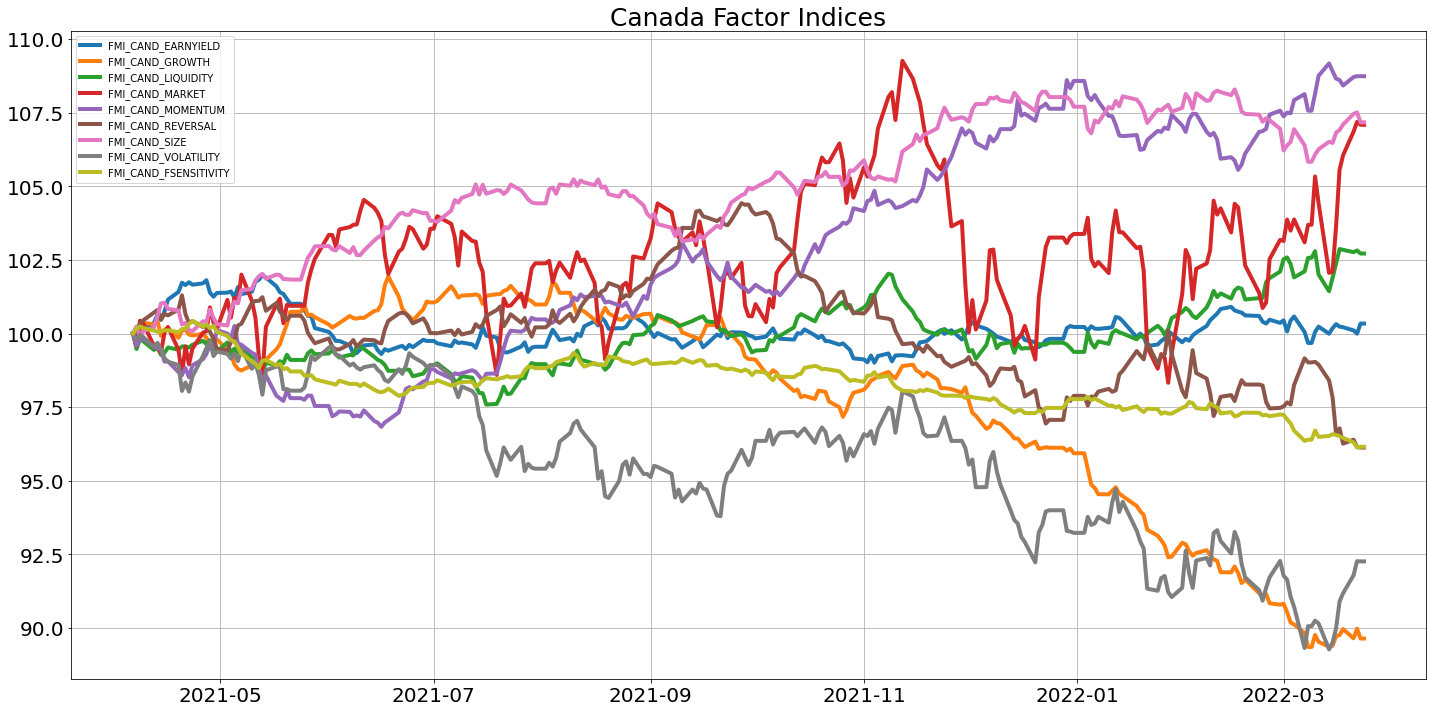

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Canada Factor Indices'}>)

In [102]:
MultiLinePlot(100*cafactors.loc[sdate:]/cafactors.loc[sdate],"Canada Factor Indices",save=True)

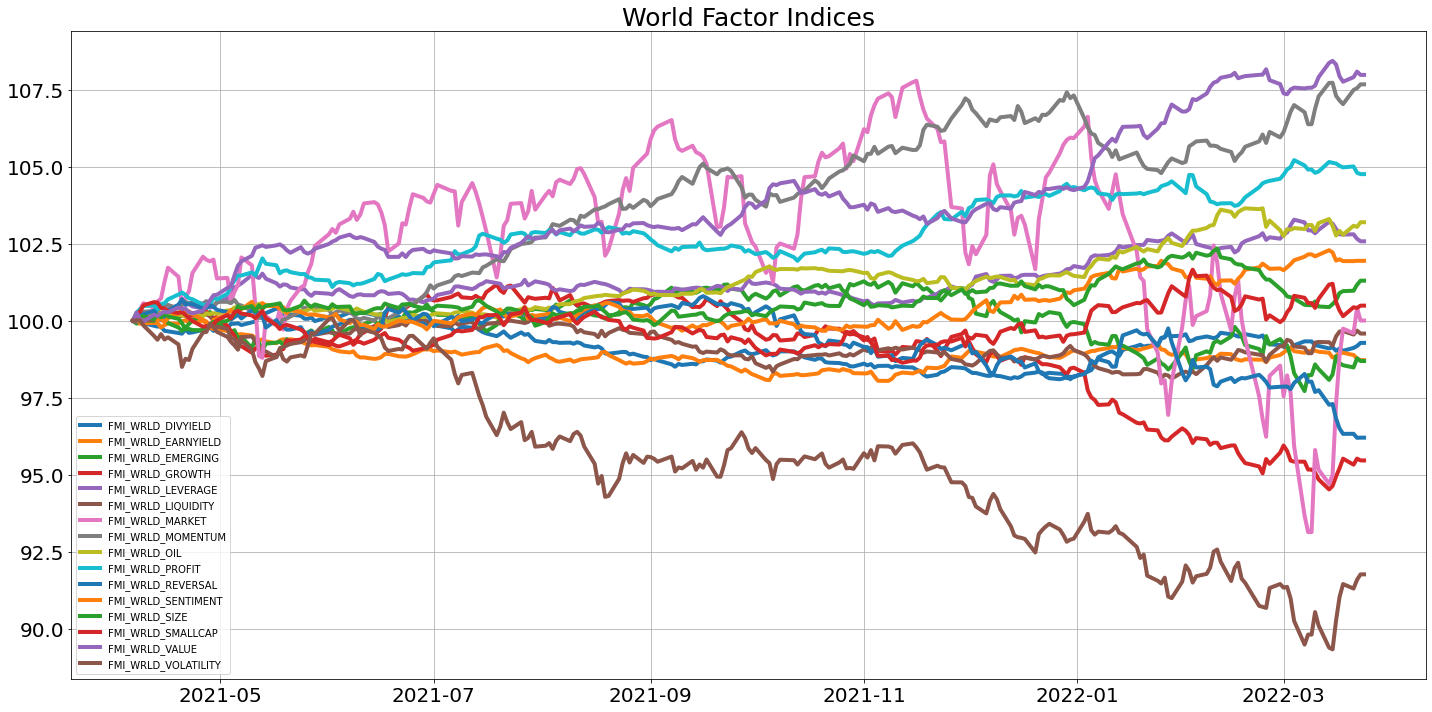

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Indices'}>)

In [103]:
MultiLinePlot(100*wldfactors.loc[sdate:]/wldfactors.loc[sdate],"World Factor Indices",save=True)

# Sector by Factor loadings

In [3]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
fbsfile = 'Factor Risk Breakdown.xlsx'

In [9]:
unclean = pd.read_excel(dirpath+fbsfile,sheet_name='ONGSS',skiprows=3).dropna(subset=['Filter Level 1'])
unclean

Title Filter Level 1          Filter Level 2  \
0                     ONGSS          ONGSS                     NaN   
1    Communication Services          ONGSS  Communication Services   
2                     STYLE          ONGSS  Communication Services   
3                    Market          ONGSS  Communication Services   
4                      Size          ONGSS  Communication Services   
..                      ...            ...                     ...   
378                INDUSTRY          ONGSS               Utilities   
379               Utilities          ONGSS               Utilities   
380                      FX          ONGSS               Utilities   
381                 CAD/CAD          ONGSS               Utilities   
382                 USD/CAD          ONGSS               Utilities   

    Filter Level 3  Level      Factor Type  Factor Level  Factor Vol  \
0              NaN 1.0000              NaN           NaN         NaN   
1              NaN 2.0000              NaN           NaN         NaN   
2            STYLE 3.0000              NaN           NaN         NaN   
3            STYLE 0.0000     Style Return        4.4550      0.1541   
4            STYLE 0.0000     Style Return        1.1322      0.0191   
..             ...    ...              ...           ...         ...   
378       INDUSTRY 3.0000              NaN           NaN         NaN   
379       INDUSTRY 0.0000  Industry Return        0.6549      0.0661   
380             FX 3.0000              NaN           NaN         NaN   
381             FX 0.0000               FX        0.0100         NaN   
382             FX 0.0000               FX           NaN      0.0581   

     Portfolio  Benchmark  Active  Portfolio (bp)  Benchmark (bp)  \
0          NaN        NaN     NaN      1,372.5650             NaN   
1          NaN        NaN     NaN        263.9339             NaN   
2       0.1838        NaN  0.1838        186.5287             NaN   
3       0.1193        NaN  0.1193        183.7853             NaN   
4       0.3022        NaN  0.3022         57.8342             NaN   
..         ...        ...     ...             ...             ...   
378     6.2917        NaN  6.2917         41.5829             NaN   
379     6.2917        NaN  6.2917         41.5829             NaN   
380        NaN        NaN     NaN         36.5565             NaN   
381    -6.2917        NaN -6.2917             NaN             NaN   
382     6.2917        NaN  6.2917         36.5565             NaN   

     Active (bp)  Portfolio (bp).1  Benchmark (bp).1  Active (bp).1  
0     1,372.5650        1,372.5650               NaN     1,372.5650  
1       263.9339          152.3655               NaN       152.3655  
2       186.5287          137.2263               NaN       137.2263  
3       183.7853          154.7120               NaN       154.7120  
4        57.8342            2.1802               NaN         2.1802  
..           ...               ...               ...            ...  
378      41.5829          -12.5528               NaN       -12.5528  
379      41.5829          -12.5528               NaN       -12.5528  
380      36.5565          -18.4022               NaN       -18.4022  
381          NaN               NaN               NaN            NaN  
382      36.5565          -18.4022               NaN       -18.4022  

[383 rows x 17 columns]

In [10]:
unclean.loc[unclean['Filter Level 3']=='STYLE']

Title Filter Level 1          Filter Level 2 Filter Level 3  Level  \
2         STYLE          ONGSS  Communication Services          STYLE 3.0000   
3        Market          ONGSS  Communication Services          STYLE 0.0000   
4          Size          ONGSS  Communication Services          STYLE 0.0000   
5    Volatility          ONGSS  Communication Services          STYLE 0.0000   
6      Momentum          ONGSS  Communication Services          STYLE 0.0000   
..          ...            ...                     ...            ...    ...   
369      Growth          ONGSS               Utilities          STYLE 0.0000   
370    Leverage          ONGSS               Utilities          STYLE 0.0000   
371   Sentiment          ONGSS               Utilities          STYLE 0.0000   
372    Emerging          ONGSS               Utilities          STYLE 0.0000   
373         Oil          ONGSS               Utilities          STYLE 0.0000   

      Factor Type  Factor Level  Factor Vol  Portfolio  Benchmark  Active  \
2             NaN           NaN         NaN     0.1838        NaN  0.1838   
3    Style Return        4.4550      0.1541     0.1193        NaN  0.1193   
4    Style Return        1.1322      0.0191     0.3022        NaN  0.3022   
5    Style Return        0.5723      0.0567    -0.0391        NaN -0.0391   
6    Style Return        3.7573      0.0459     0.0517        NaN  0.0517   
..            ...           ...         ...        ...        ...     ...   
369  Style Return        0.7656      0.0230     0.0509        NaN  0.0509   
370  Style Return        0.7294      0.0166    -0.0177        NaN -0.0177   
371  Style Return        0.9180      0.0182    -0.0104        NaN -0.0104   
372  Style Return        1.0798      0.0240    -0.0124        NaN -0.0124   
373  Style Return        1.0220      0.0161    -0.0342        NaN -0.0342   

     Portfolio (bp)  Benchmark (bp)  Active (bp)  Portfolio (bp).1  \
2          186.5287             NaN     186.5287          137.2263   
3          183.7853             NaN     183.7853          154.7120   
4           57.8342             NaN      57.8342            2.1802   
5           22.1702             NaN      22.1702          -12.9071   
6           23.6993             NaN      23.6993           -3.2007   
..              ...             ...          ...               ...   
369         11.6865             NaN      11.6865            0.1814   
370          2.9305             NaN       2.9305           -0.0546   
371          1.8901             NaN       1.8901            0.0227   
372          2.9809             NaN       2.9809           -0.7358   
373          5.4871             NaN       5.4871           -1.6745   

     Benchmark (bp).1  Active (bp).1  
2                 NaN       137.2263  
3                 NaN       154.7120  
4                 NaN         2.1802  
5                 NaN       -12.9071  
6                 NaN        -3.2007  
..                ...            ...  
369               NaN         0.1814  
370               NaN        -0.0546  
371               NaN         0.0227  
372               NaN        -0.7358  
373               NaN        -1.6745  

[170 rows x 17 columns]

# Read in Sector by Factor Sheets

In [46]:
import matplotlib.pyplot as plt

In [44]:
path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
file = 'ONGSINTL Sector by Factor 03-17-22.xlsx'
sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)
sxf_df

Title Filter Level 1          Filter Level 2  \
0                          ONGSINTL       ONGSINTL                     NaN   
1            Communication Services       ONGSINTL  Communication Services   
2                             STYLE       ONGSINTL  Communication Services   
3                            Market       ONGSINTL  Communication Services   
4                              Size       ONGSINTL  Communication Services   
..                              ...            ...                     ...   
738                         JPY/CAD       ONGSINTL               Utilities   
739                         NZD/CAD       ONGSINTL               Utilities   
740                        INDUSTRY       ONGSINTL               Utilities   
741  Fuels Refining Storage & Trans       ONGSINTL               Utilities   
742                       Utilities       ONGSINTL               Utilities   

    Filter Level 3  Level      Factor Type  Factor Level  Factor Vol  \
0              NaN      1              NaN           NaN         NaN   
1              NaN      2              NaN           NaN         NaN   
2            STYLE      3              NaN           NaN         NaN   
3            STYLE      0     Style Return           4.0        0.16   
4            STYLE      0     Style Return           1.1       0.021   
..             ...    ...              ...           ...         ...   
738             FX      0               FX          0.92       0.082   
739             FX      0               FX         0.012       0.077   
740       INDUSTRY      3              NaN           NaN         NaN   
741       INDUSTRY      0  Industry Return          0.62        0.13   
742       INDUSTRY      0  Industry Return          0.66       0.079   

     Portfolio  Benchmark  Active  Portfolio (bp)  Benchmark (bp)  \
0          NaN        NaN     NaN         1.3e+03         1.4e+03   
1          NaN        NaN     NaN         6.2e+01         6.8e+01   
2        0.036       0.15   -0.11         4.9e+01         6.8e+01   
3        0.025      0.048  -0.023           4e+01         7.5e+01   
4        0.031      0.049  -0.019             6.5         1.1e+01   
..         ...        ...     ...             ...             ...   
738        NaN        0.2    -0.2             NaN             1.7   
739        NaN      0.046  -0.046             NaN            0.36   
740        NaN        3.4    -3.4             NaN         2.7e+01   
741        NaN       0.11   -0.11             NaN             1.4   
742        NaN        3.3    -3.3             NaN         2.6e+01   

     Active (bp)  Portfolio (bp).1  Benchmark (bp).1  Active (bp).1  
0        3.4e+02           1.3e+03           1.4e+03        3.4e+02  
1        5.8e+01           3.6e+01           5.9e+01        1.6e+01  
2        2.4e+01           3.7e+01           5.3e+01            2.8  
3        3.5e+01             3e+01           5.6e+01          -0.95  
4            4.0               1.9               3.1           0.17  
..           ...               ...               ...            ...  
738          1.7               NaN             -0.28           0.23  
739         0.36               NaN              0.07           0.09  
740      2.7e+01               NaN              -9.4            5.4  
741          1.4               NaN              -0.5         0.0078  
742      2.6e+01               NaN              -8.8            5.4  

[743 rows x 17 columns]

In [45]:
sxf_df['Filter Level 2'].unique()

array([nan, 'Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials', 'None',
       'Real Estate', 'Utilities'], dtype=object)

C:\Users\jknechtel\Miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


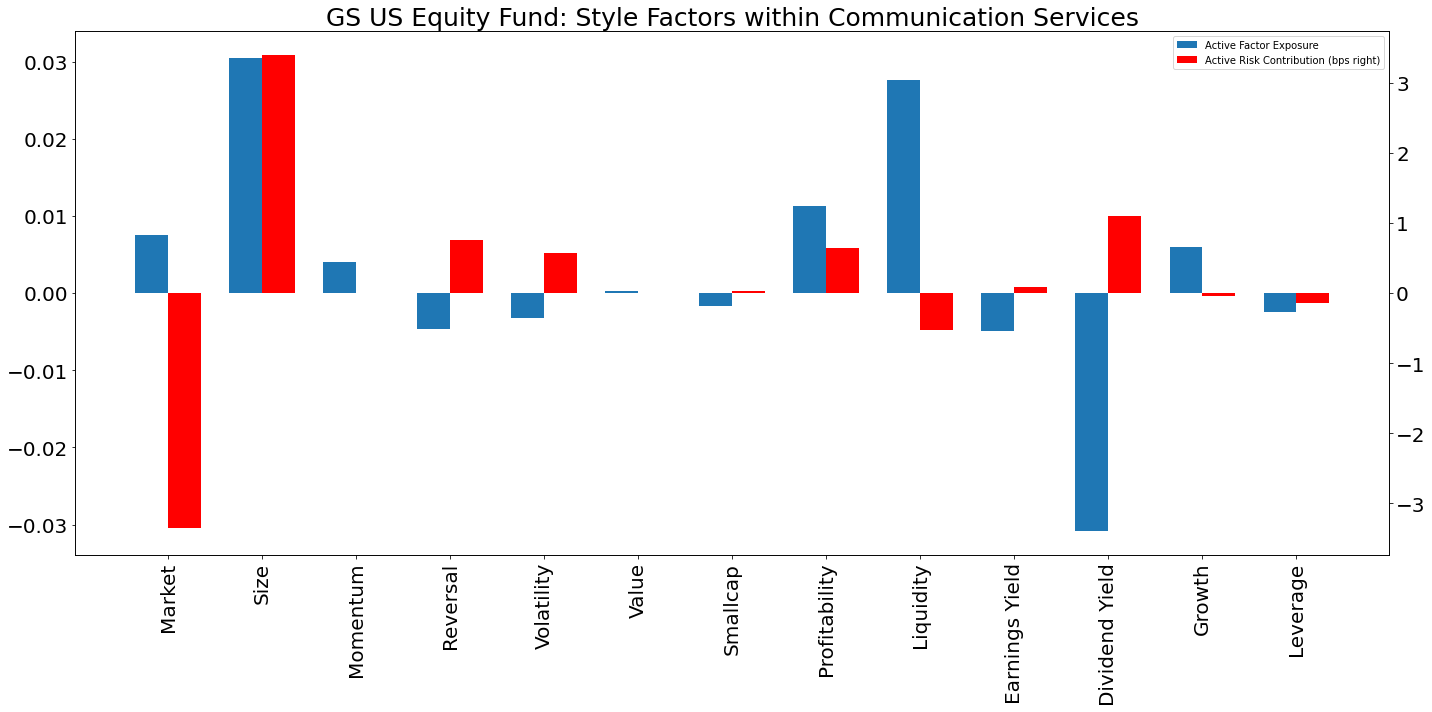

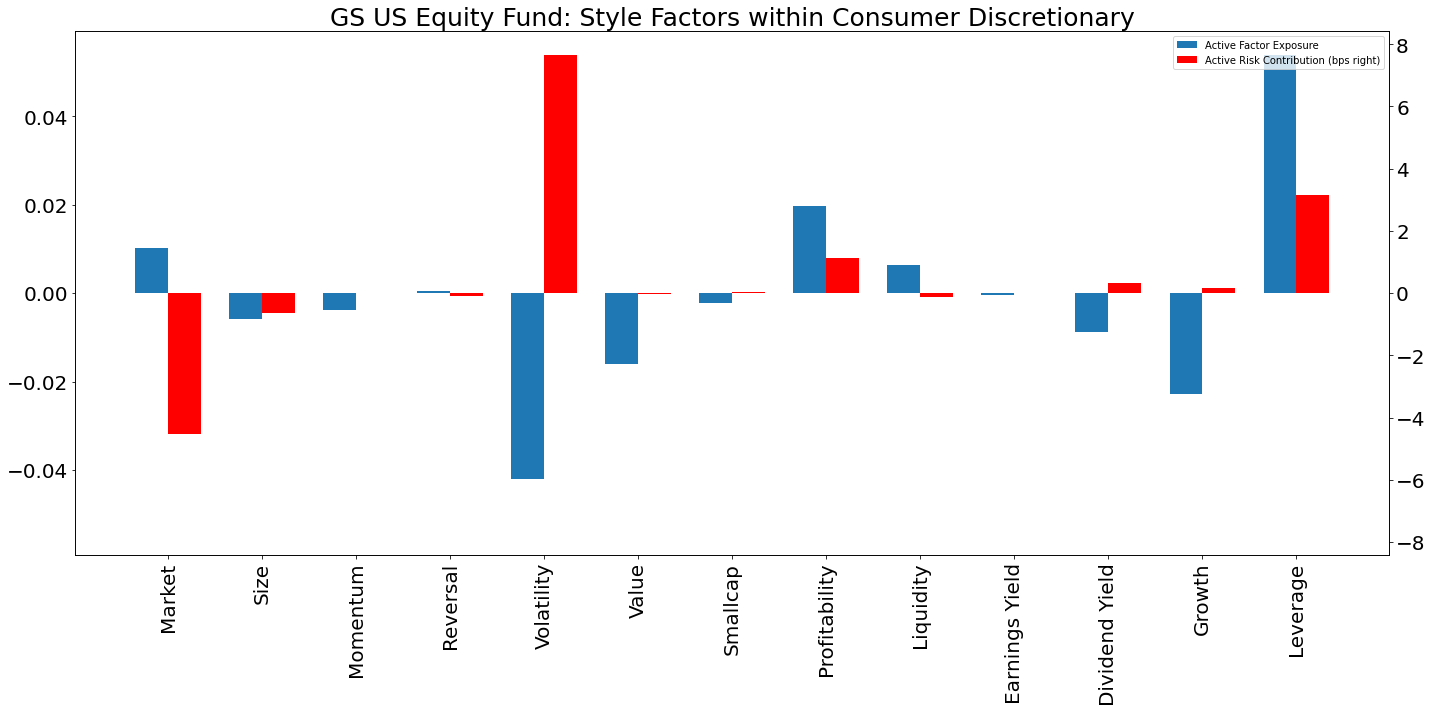

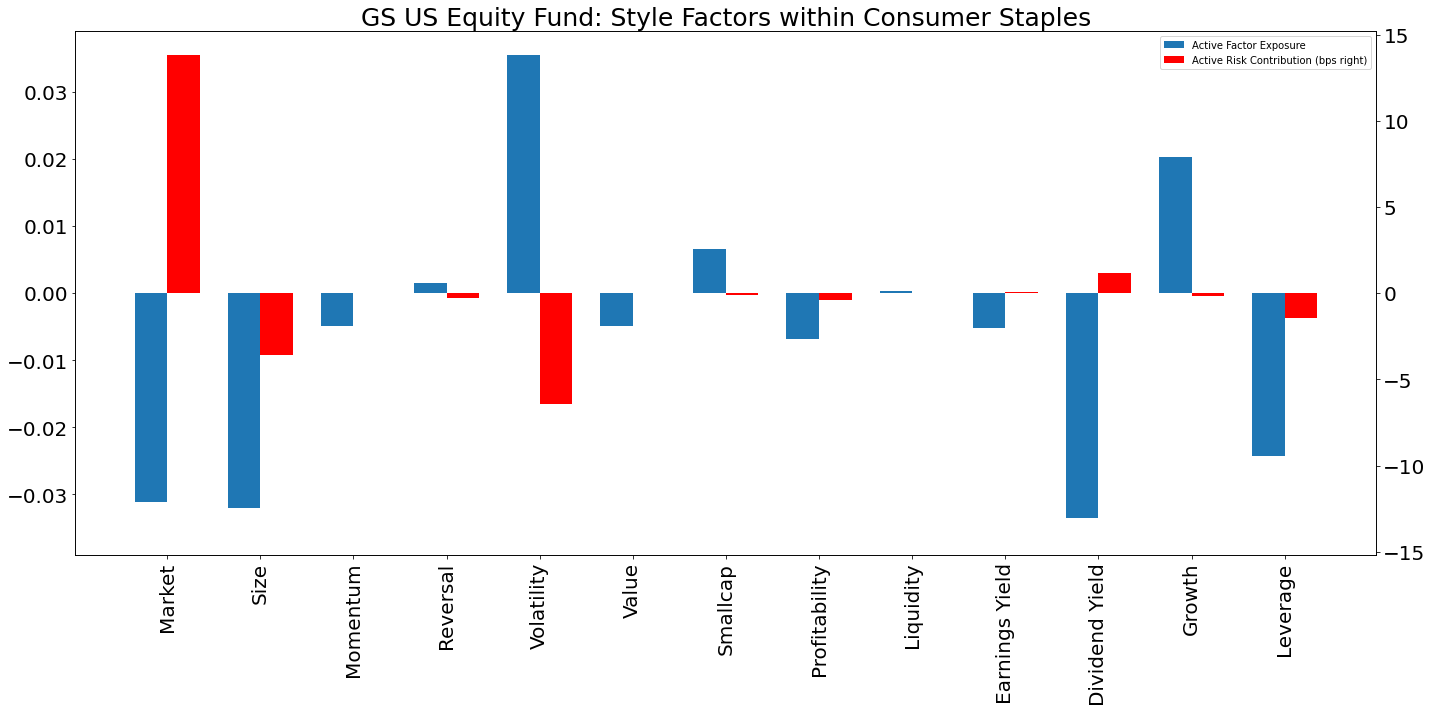

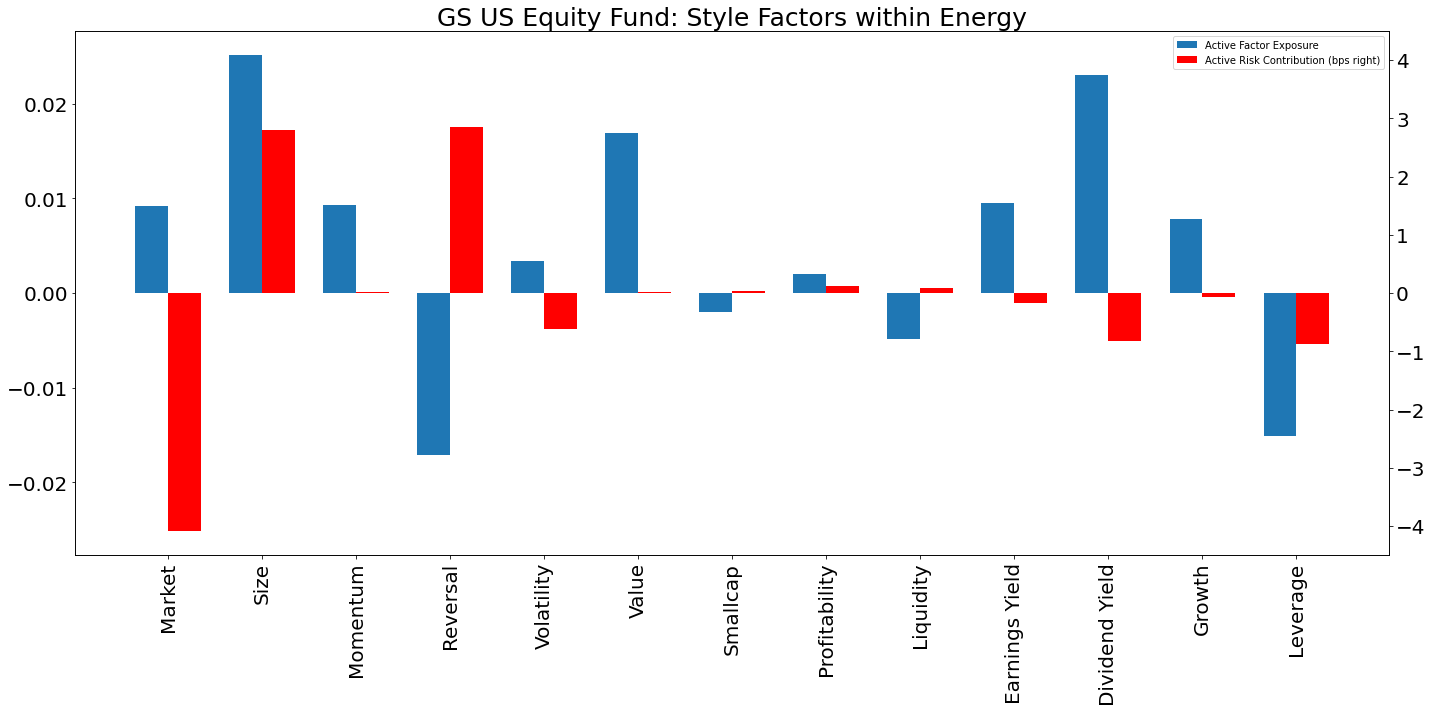

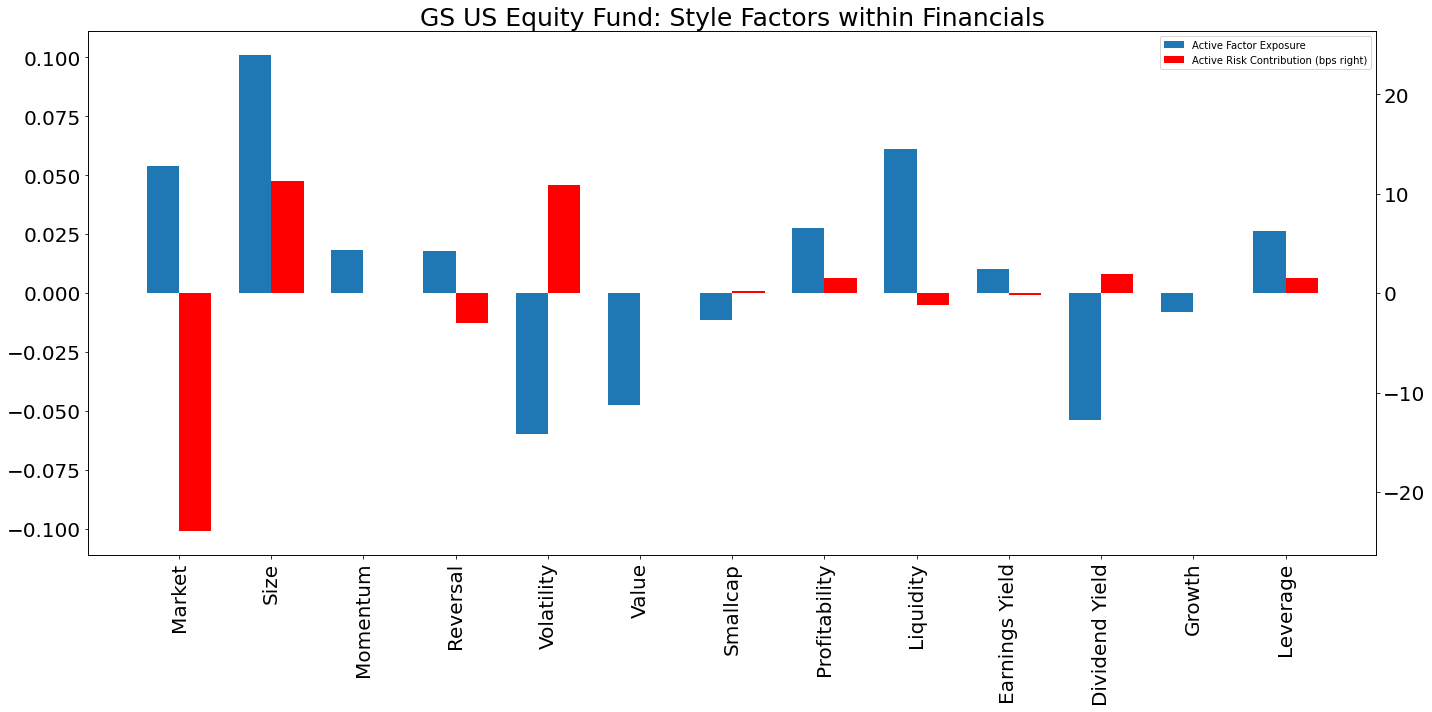

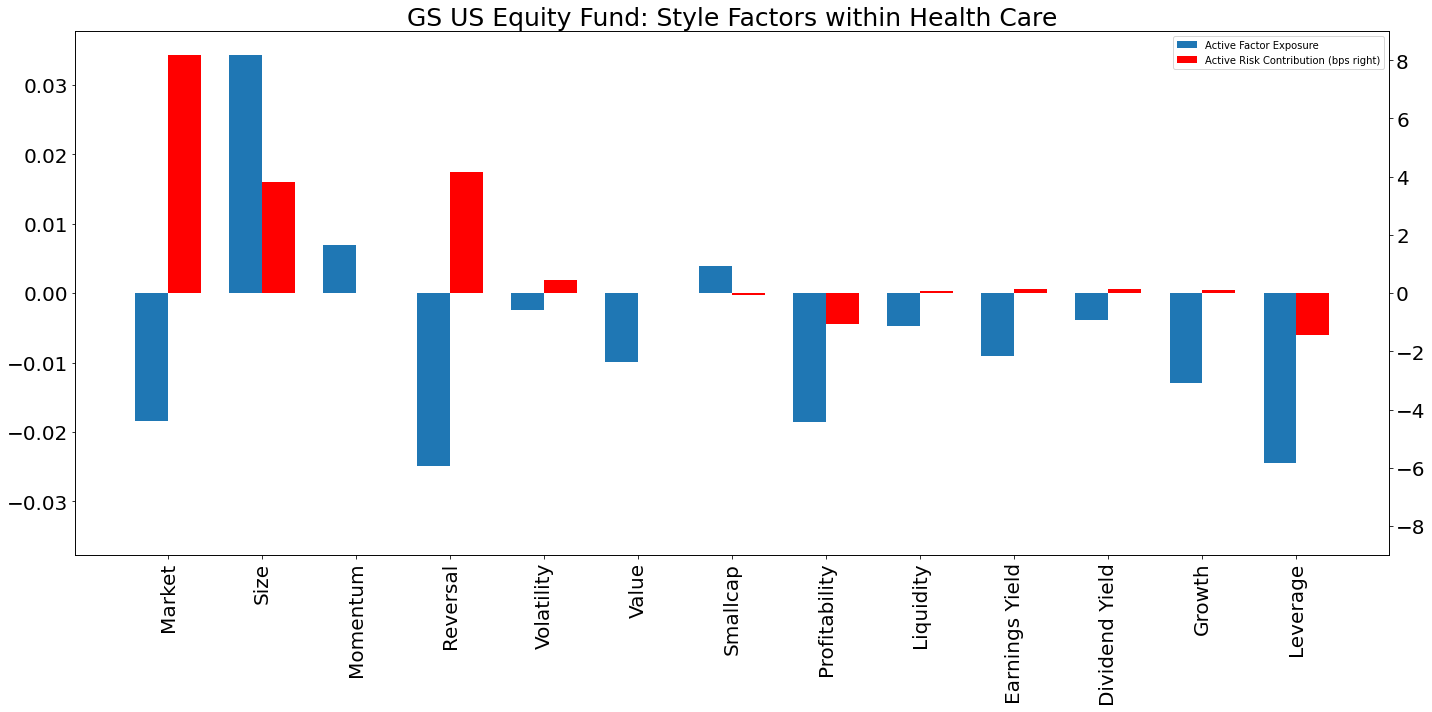

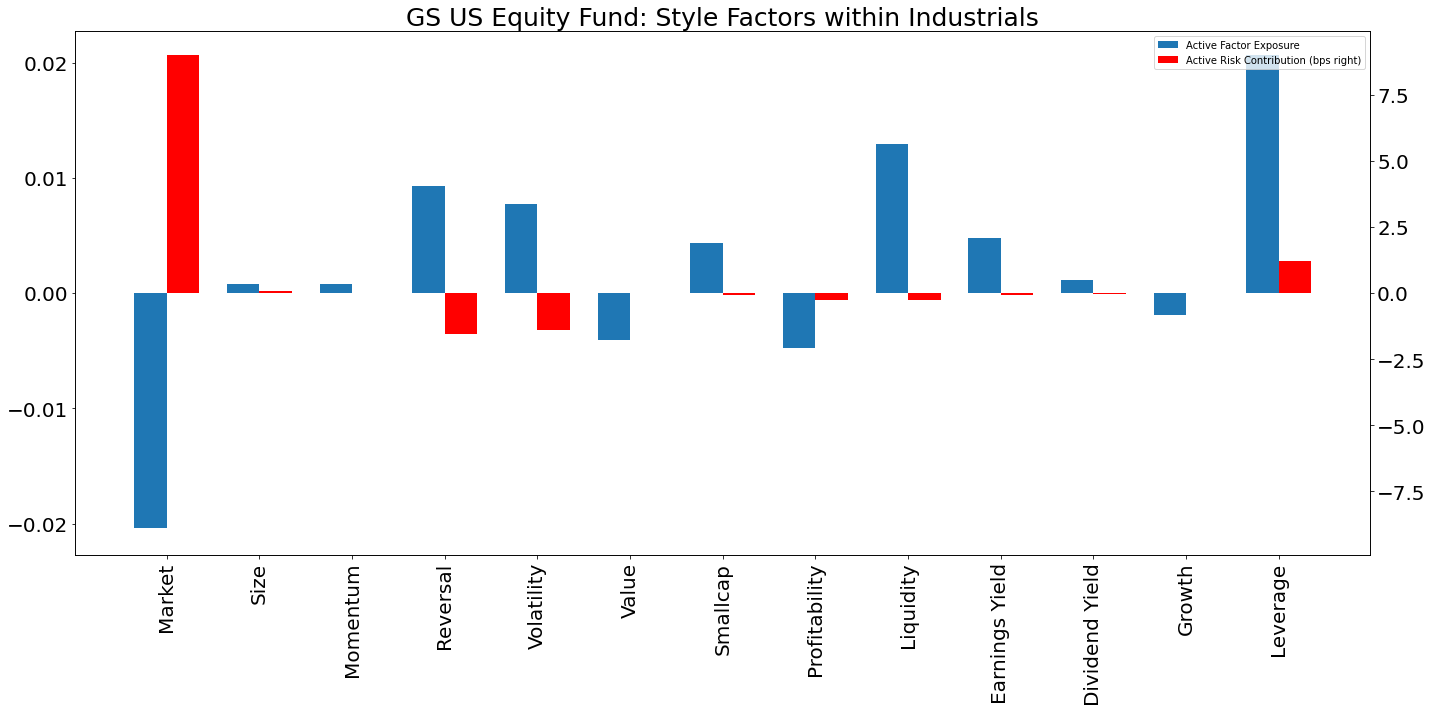

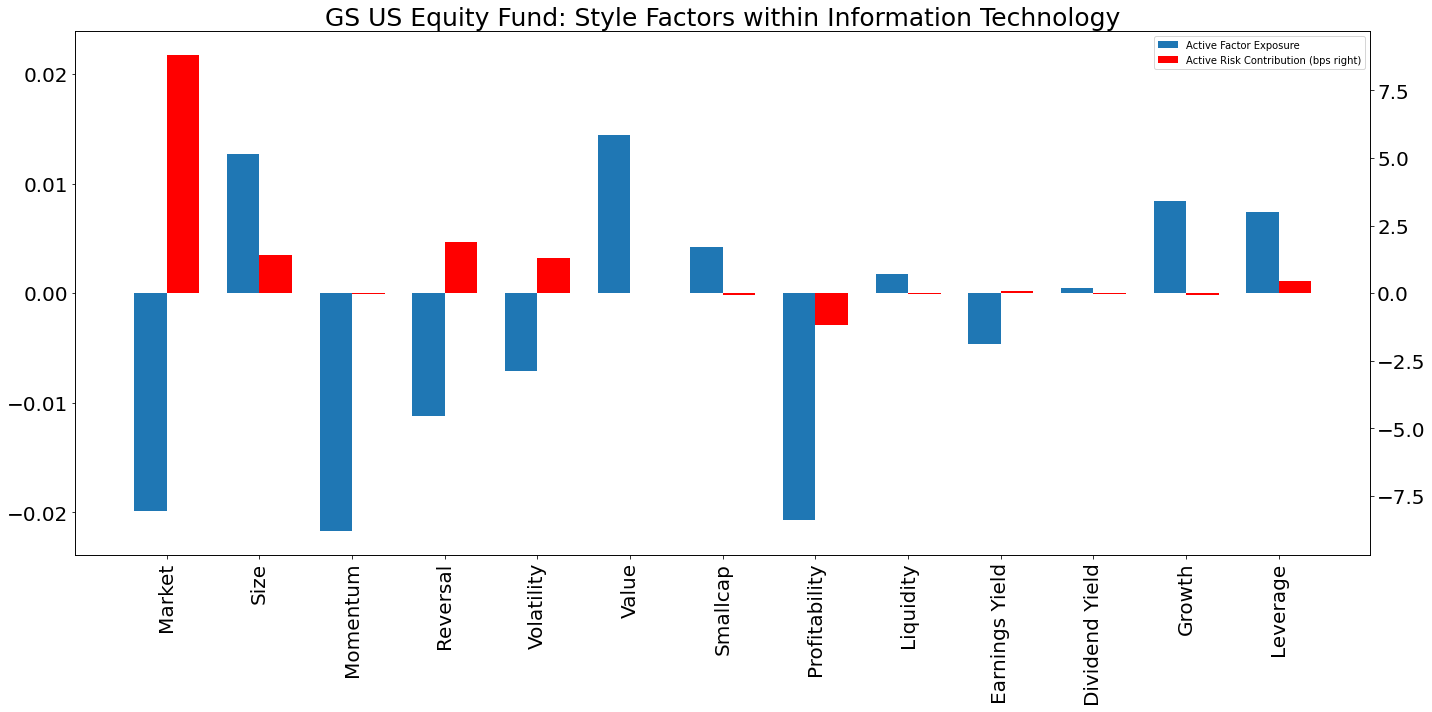

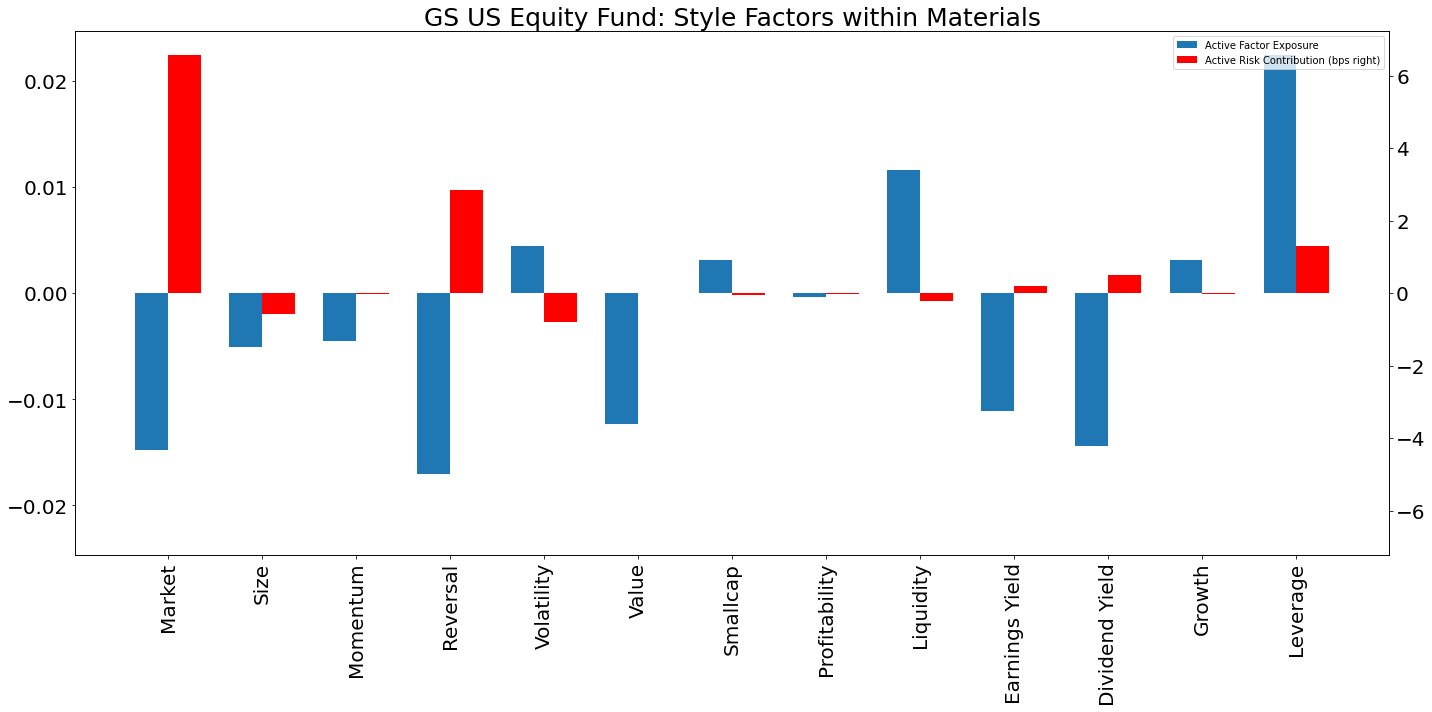

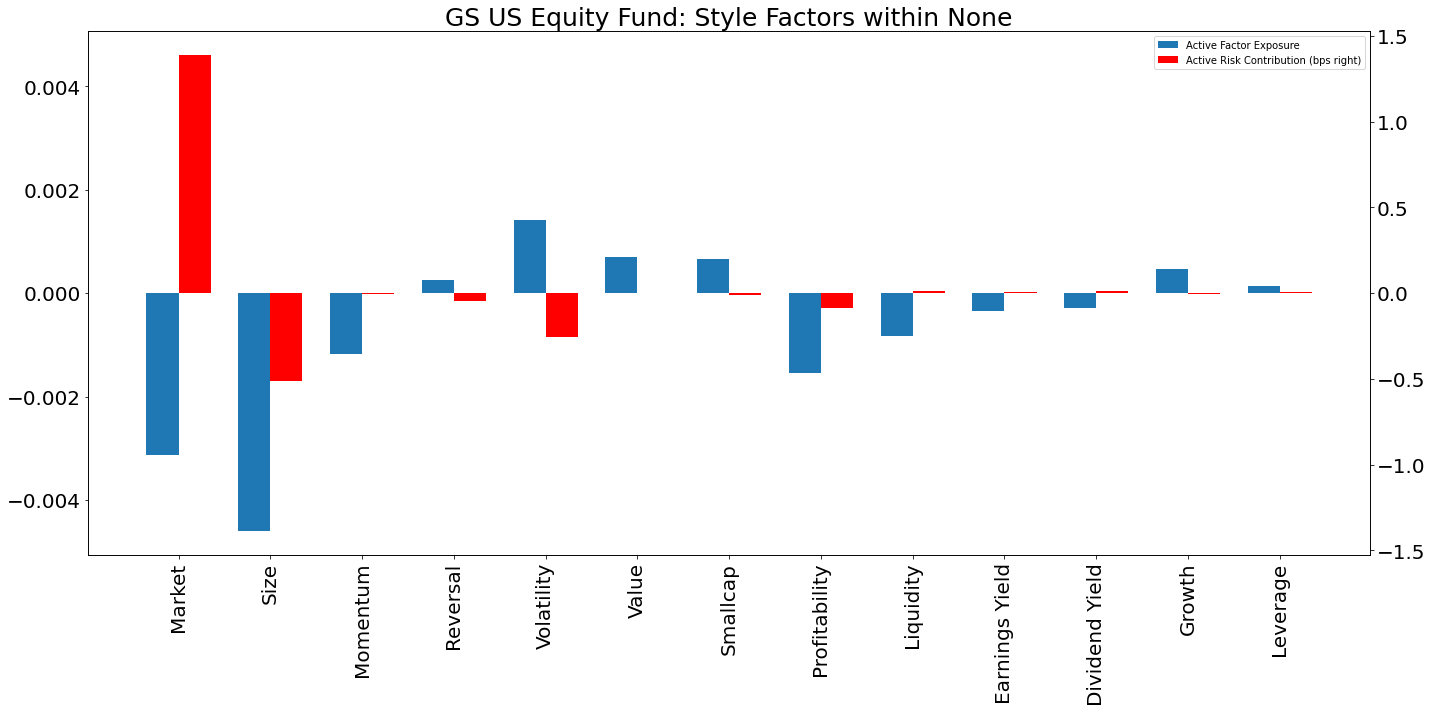

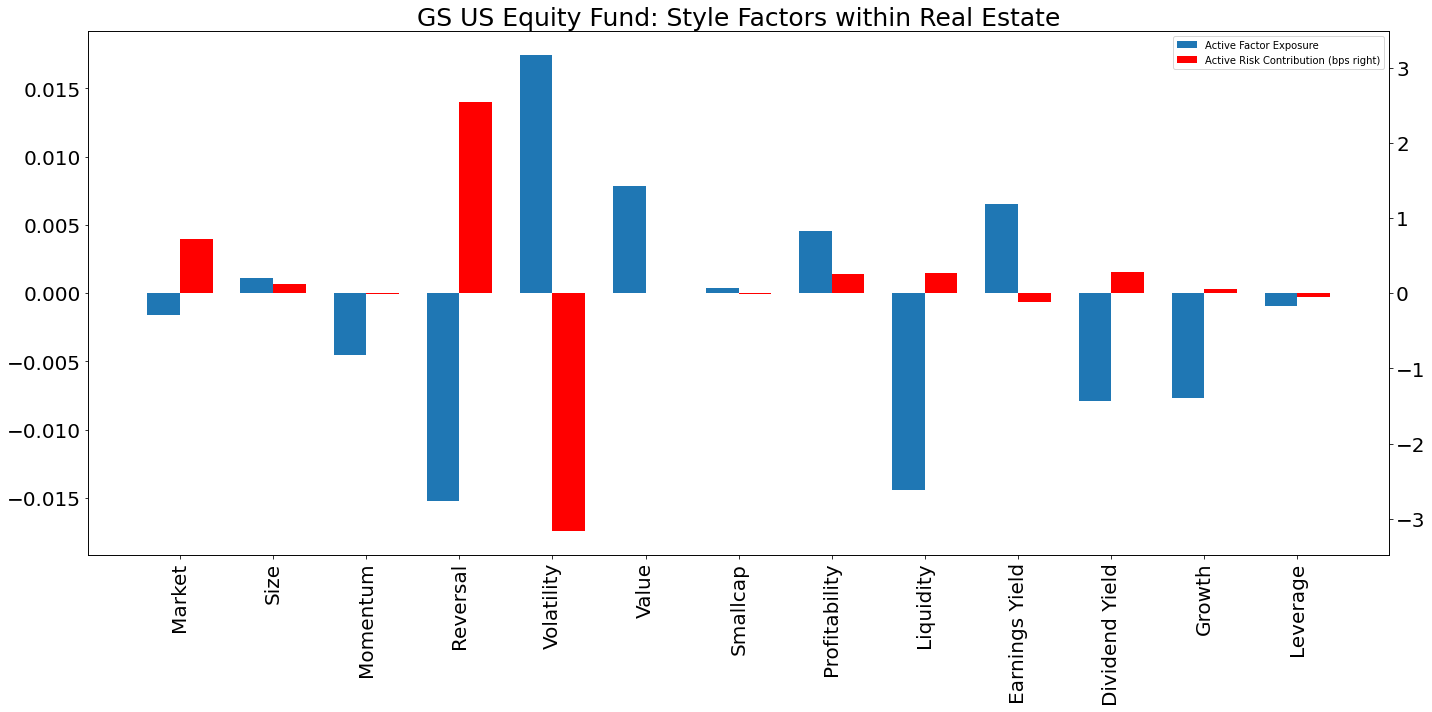

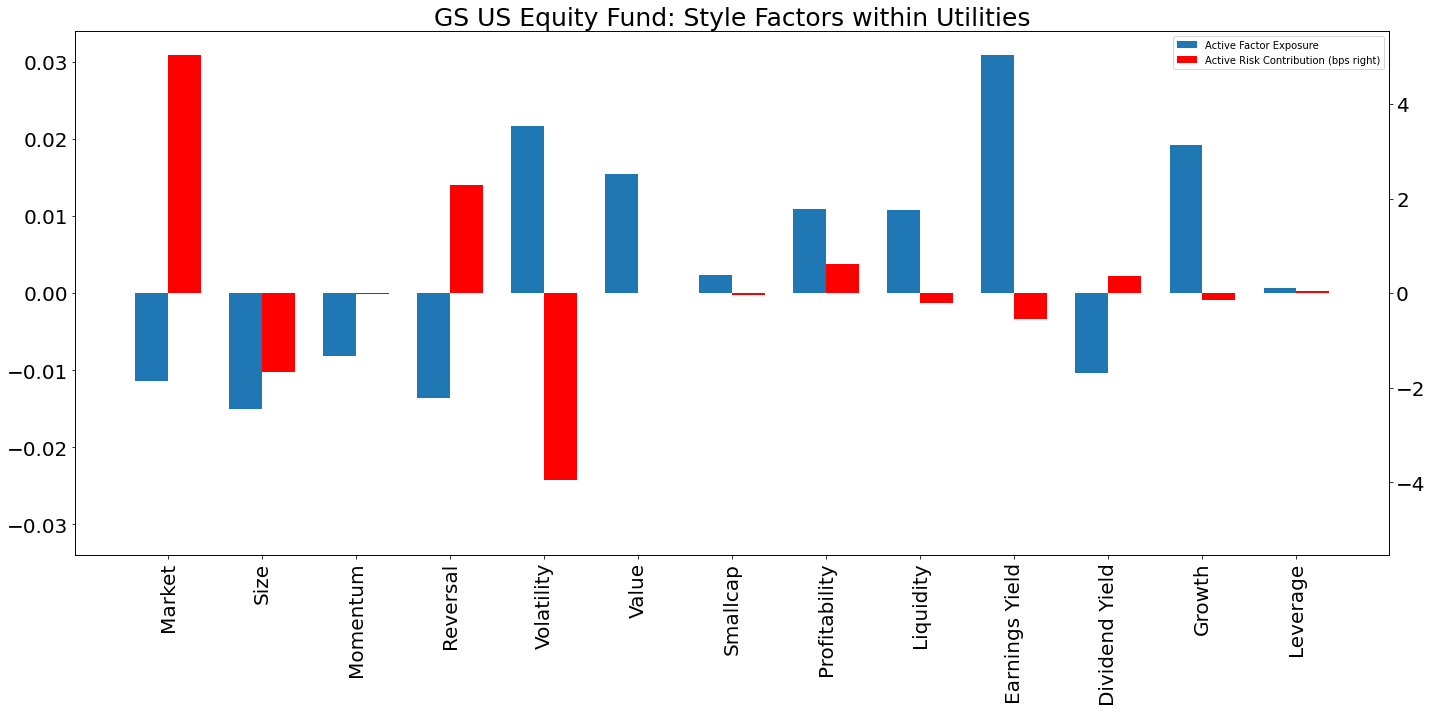

In [157]:
file = 'GS USEQ Sector by Factor 03-17-22.xlsx'
SectorByFactorCharts(file,'GS US Equity Fund')

In [169]:
def SectorByFactorCharts(file,fund):
    path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
    #file = 'ONGSINTL Sector by Factor 03-17-22.xlsx'
    sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)

    for sector in sxf_df['Filter Level 2'].unique():

        if str(sector) == 'nan':
            continue

        mask = (sxf_df['Filter Level 2']==sector)\
                                  &(sxf_df['Level']==0)&(sxf_df['Filter Level 3']=='STYLE')

        labels = sxf_df.loc[mask,' Title'].tolist()
        factor_exp = sxf_df.loc[mask,'Active']
        risk_contr = sxf_df.loc[mask,'Active (bp).1']

        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        fig, ax = plt.subplots(figsize=(20,10))
        ax2 = ax.twinx() 

        if fund != 'GSS':
            rects1 = ax.bar(x - width/2, factor_exp, width, label='Active Factor Exposure')
            rects2 = ax2.bar(x + width/2, risk_contr, width, label='Active Risk Contribution (bps right)', color='red',)
        else:
            rects1 = ax.bar(x - width/2, factor_exp, width, label='Factor Exposure')
            rects2 = ax2.bar(x + width/2, risk_contr, width, label='Risk Contribution (bps right)', color='red',)

        ax.set_title(fund+': Style Factors within ' +sector,fontsize=25);

        ax.set_xticks(x);
        ax.set_xticklabels(labels, rotation='vertical');
        #ax.legend();
        fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
        
        try:
            ax.set_ylim(-factor_exp.abs().max()*1.1,factor_exp.abs().max()*1.1);
            ax2.set_ylim(-risk_contr.abs().max()*1.1,risk_contr.abs().max()*1.1);
        except:
            pass
        #ax.bar_label(rects1, padding=3)
        #ax.bar_label(rects2, padding=3)

        fig.tight_layout()

        plt.show()

        fig.savefig(path+fund+'StyleFactors_' +sector+'.png',format="png")

Text(0.5, 1.0, 'Style Factors within Communication Services')

[Text(0, 0, 'Market'),
 Text(1, 0, 'Size'),
 Text(2, 0, 'Volatility'),
 Text(3, 0, 'Momentum'),
 Text(4, 0, 'Reversal'),
 Text(5, 0, 'Liquidity'),
 Text(6, 0, 'SmallCap'),
 Text(7, 0, 'Value'),
 Text(8, 0, 'Profitability'),
 Text(9, 0, 'Earnings Yield'),
 Text(10, 0, 'Dividend Yield'),
 Text(11, 0, 'Growth'),
 Text(12, 0, 'Leverage'),
 Text(13, 0, 'Sentiment'),
 Text(14, 0, 'Emerging'),
 Text(15, 0, 'Oil')]

(-0.03803744954950829, 0.03803744954950829)

(-1.65904564682203, 1.65904564682203)

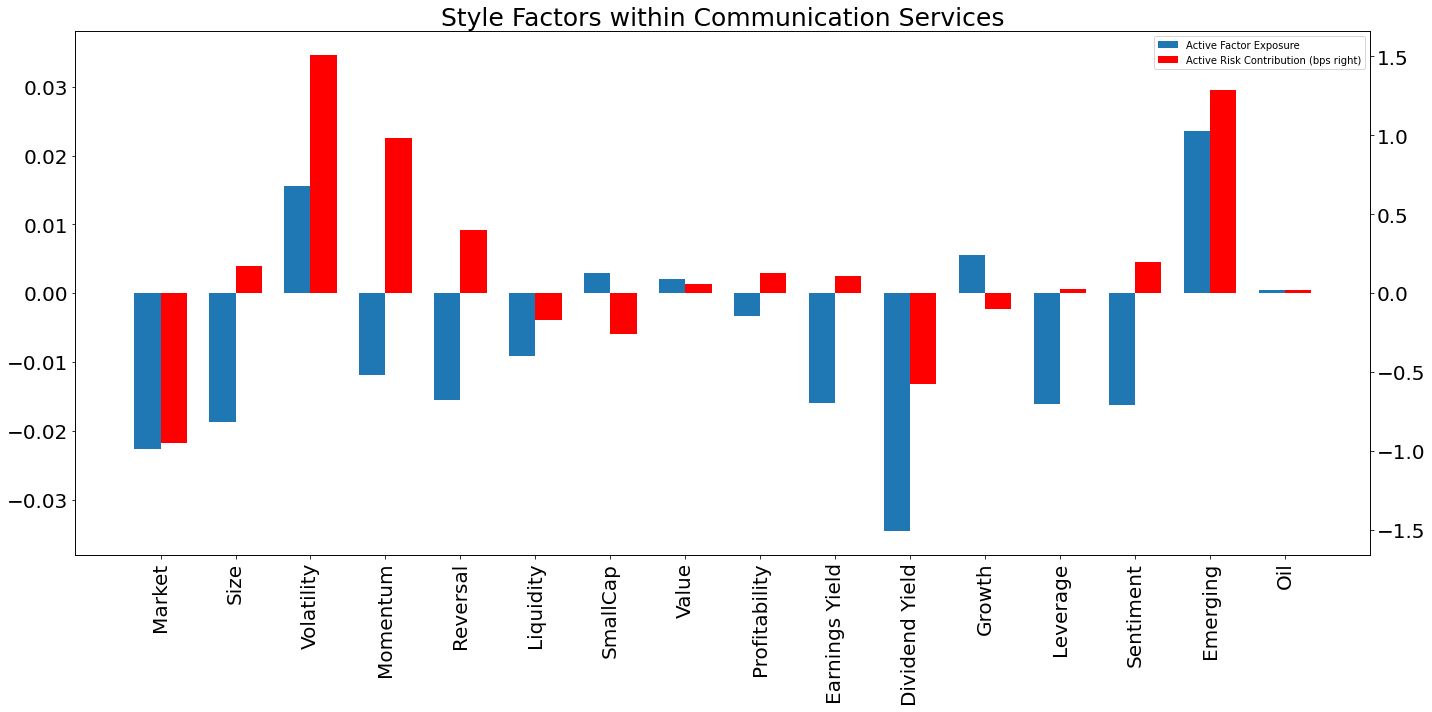

In [104]:
sector ='Communication Services'

mask = (sxf_df['Filter Level 2']==sector)\
                          &(sxf_df['Level']==0)&(sxf_df['Filter Level 3']=='STYLE')
#sector_slice = sxf_df.loc[mask,' Title']

labels = sxf_df.loc[mask,' Title'].tolist()
factor_exp = sxf_df.loc[mask,'Active']
risk_contr = sxf_df.loc[mask,'Active (bp).1']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10));
#ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx(); # C

rects1 = ax.bar(x - width/2, factor_exp, width, label='Active Factor Exposure')
rects2 = ax2.bar(x + width/2, risk_contr, width, label='Active Risk Contribution (bps right)', color='red',)
#ax.secondary_yaxis()
# Add some text for labels, title and custom x-axis tick labels, etc.

#ax.set_ylabel('Active Factor Exposure');
#ax2.set_ylabel('Active Risk Contribution (bps right)');
ax.set_title('Style Factors within ' +sector,fontsize=25);

ax.set_xticks(x);
ax.set_xticklabels(labels, rotation='vertical');
#ax.legend(rects1+rects2,[rects1.get_label(),rects2.get_label()]);
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

ax.set_ylim(-factor_exp.abs().max()*1.1,factor_exp.abs().max()*1.1);
ax2.set_ylim(-risk_contr.abs().max()*1.1,risk_contr.abs().max()*1.1);
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout();

plt.show();

fig.savefig(path+'StyleFactors_' +sector+'.png',format="png")

In [ ]:
from pptx import Presentation
from pptx.util import Inches

X = Presentation()

Layout = X.slide_layouts[0]
first_slide = X.slides.add_slide(Layout)

first_slide.shapes.title.text = "Creating a powerpoint using Python" first_slide.placeholders[1].text = "Created by Tutorialpoints"

X.save("First_presentation.pptx")

Second_Layout = X.slide_layouts[5]
second_slide = X.slides.add_slide(Second_Layout)
second_slide.shapes.title.text = "Second slide"

textbox = second_slide.shapes.add_textbox(Inches(3), Inches(1.5),Inches(3), Inches(1)) textframe = textbox.text_frame
paragraph = textframe.add_paragraph()
paragraph.text = "This is a paragraph in the second slide!"

X.save("First_presentation.pptx")

In [166]:
path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
file = 'PIF Factor based analysis.xlsx'
sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)

C:\Users\jknechtel\Miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [112]:
def FactorCharts(file,byfactor=True):
    path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
    #file = 'ONGSINTL Sector by Factor 03-17-22.xlsx'
    sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)

    if "PIF" in file:
        rmodel = 'CAND Style'
        fund = 'PIF'
    elif "DDF" in file:
        rmodel = 'CAND Style'
        fund = 'DDF'
    elif "INTL" in file:    
        rmodel = 'WRLD Style'
        fund = 'GS International'
    elif "GSS" in file:    
        rmodel = 'WRLD Style'
        fund = 'GSS'
    elif "USEQ" in file:
        rmodel = 'USAM Style'
        fund = 'US Equity Fund'
    else:
        print('Can\'t find fund!')
    
    if byfactor:
        mask = (sxf_df['Level']==0)&(sxf_df['Filter Level 3']==rmodel)
    else:
        mask = (sxf_df['Level']==3) #&(sxf_df['Filter Level 3']==rmodel)

    labels = sxf_df.loc[mask,' Title'].tolist()
    factor_exp = sxf_df.loc[mask,'Active']
    risk_contr = sxf_df.loc[mask,'Active (bp).1']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(20,10))
    ax2 = ax.twinx() 

    if fund != 'GSS':
        rects1 = ax.bar(x - width/2, factor_exp, width, label='Active Factor Exposure')
        rects2 = ax2.bar(x + width/2, risk_contr, width, label='Active Risk Contribution (bps right)', color='red',)
    else:
        rects1 = ax.bar(x - width/2, factor_exp, width, label='Factor Exposure')
        rects2 = ax2.bar(x + width/2, risk_contr, width, label='Risk Contribution (bps right)', color='red',)
        
    if byfactor:
        ax.set_title(fund+': Risk Break-down by Style Factors',fontsize=25);
    else:
        ax.set_title(fund+': Risk by Broad Categories',fontsize=25);

    ax.set_xticks(x);
    ax.set_xticklabels(labels, rotation='vertical');
    #ax.legend();
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

    try:
        ax.set_ylim(-factor_exp.abs().max()*1.1,factor_exp.abs().max()*1.1);
        ax2.set_ylim(-risk_contr.abs().max()*1.1,risk_contr.abs().max()*1.1);
    except:
        pass
    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

    if byfactor:
        fig.savefig(path+fund+'StyleFactors.png',format="png")
    else:
        fig.savefig(path+fund+'MainRisks.png',format="png")        

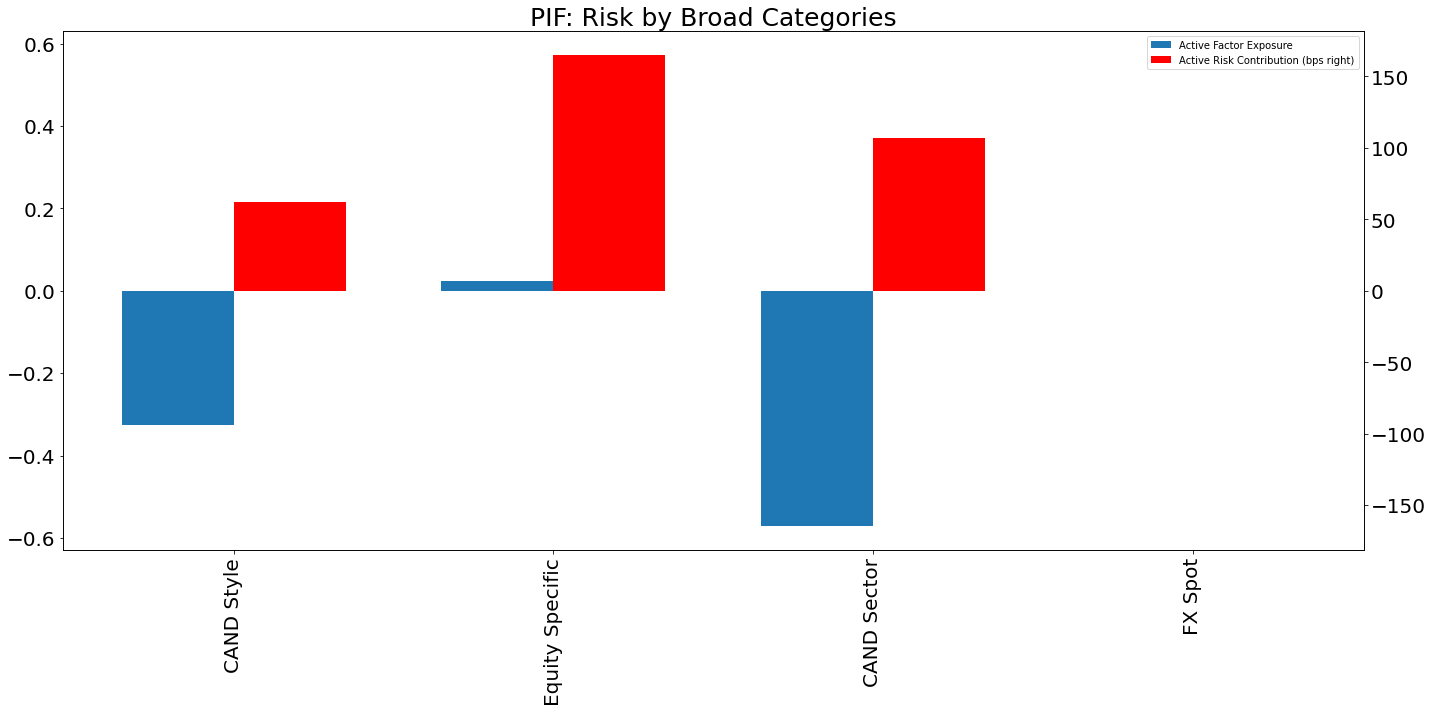

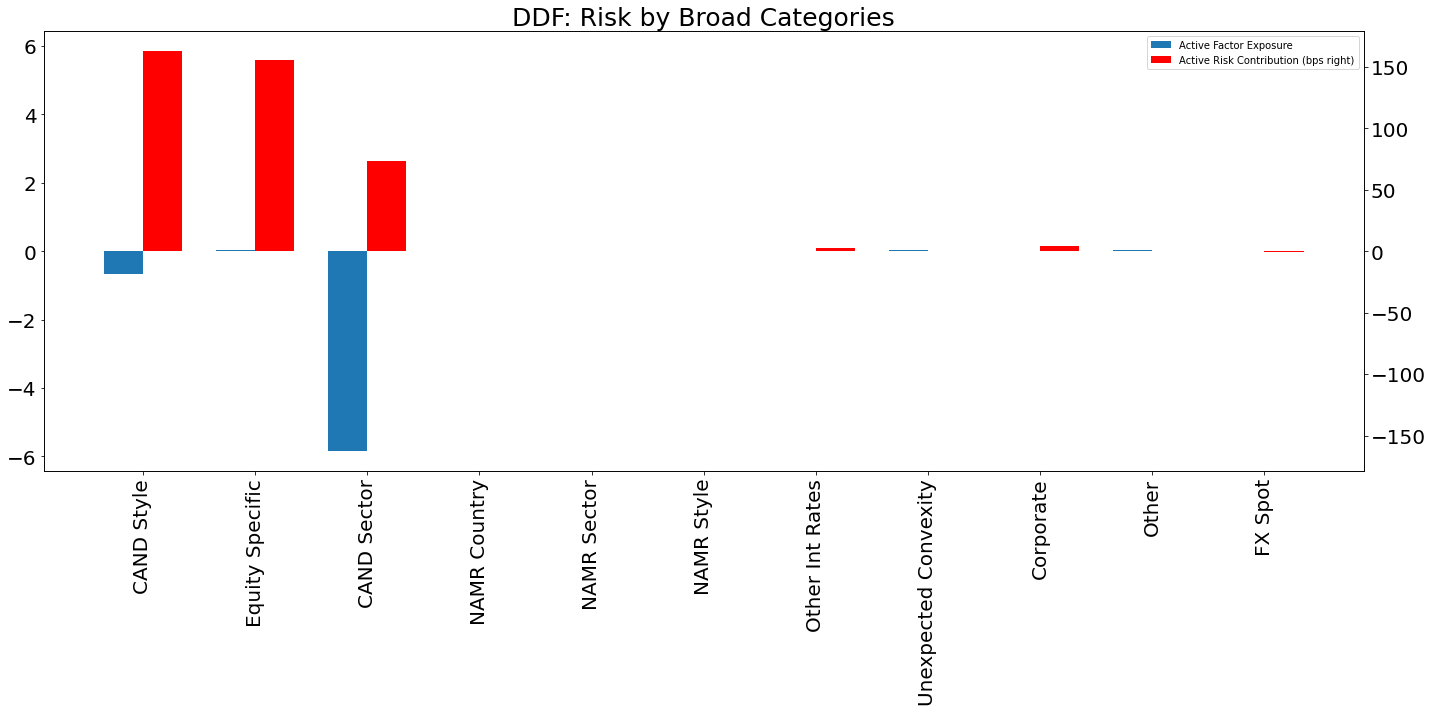

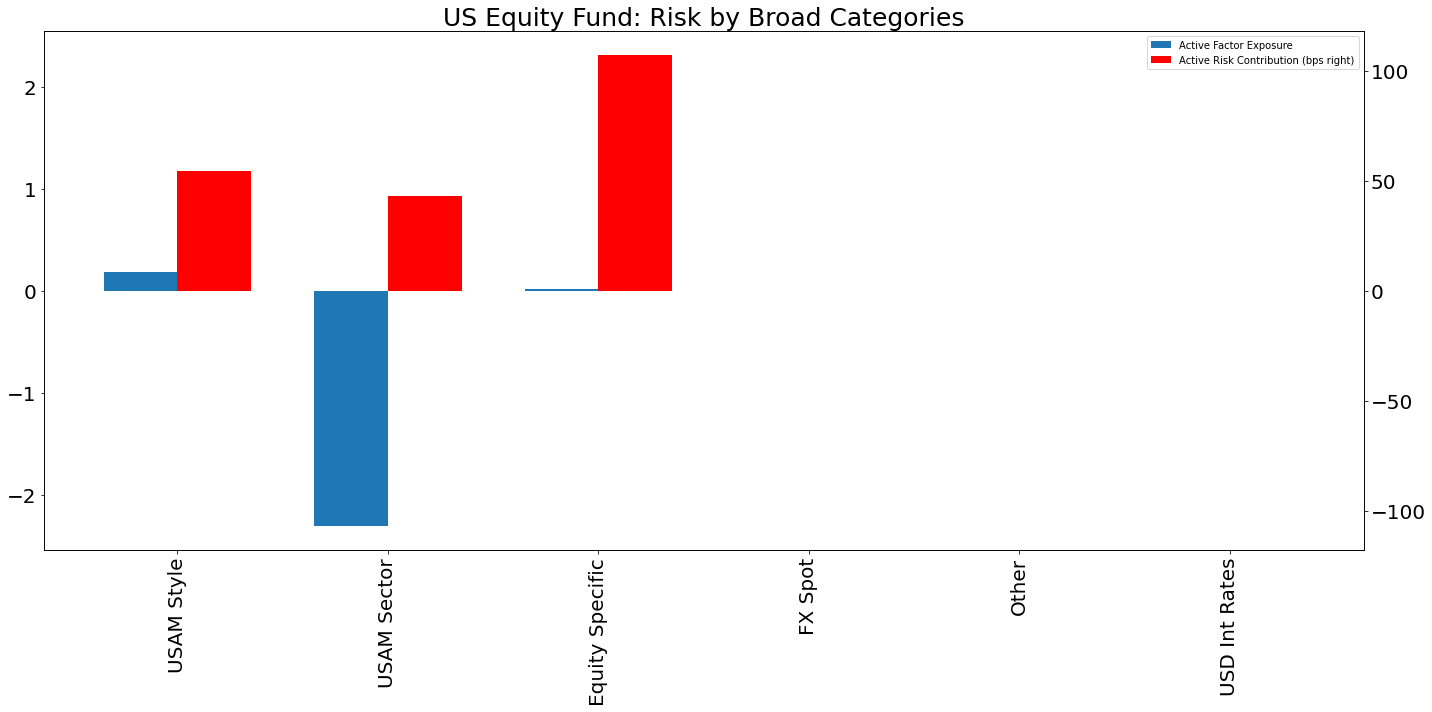

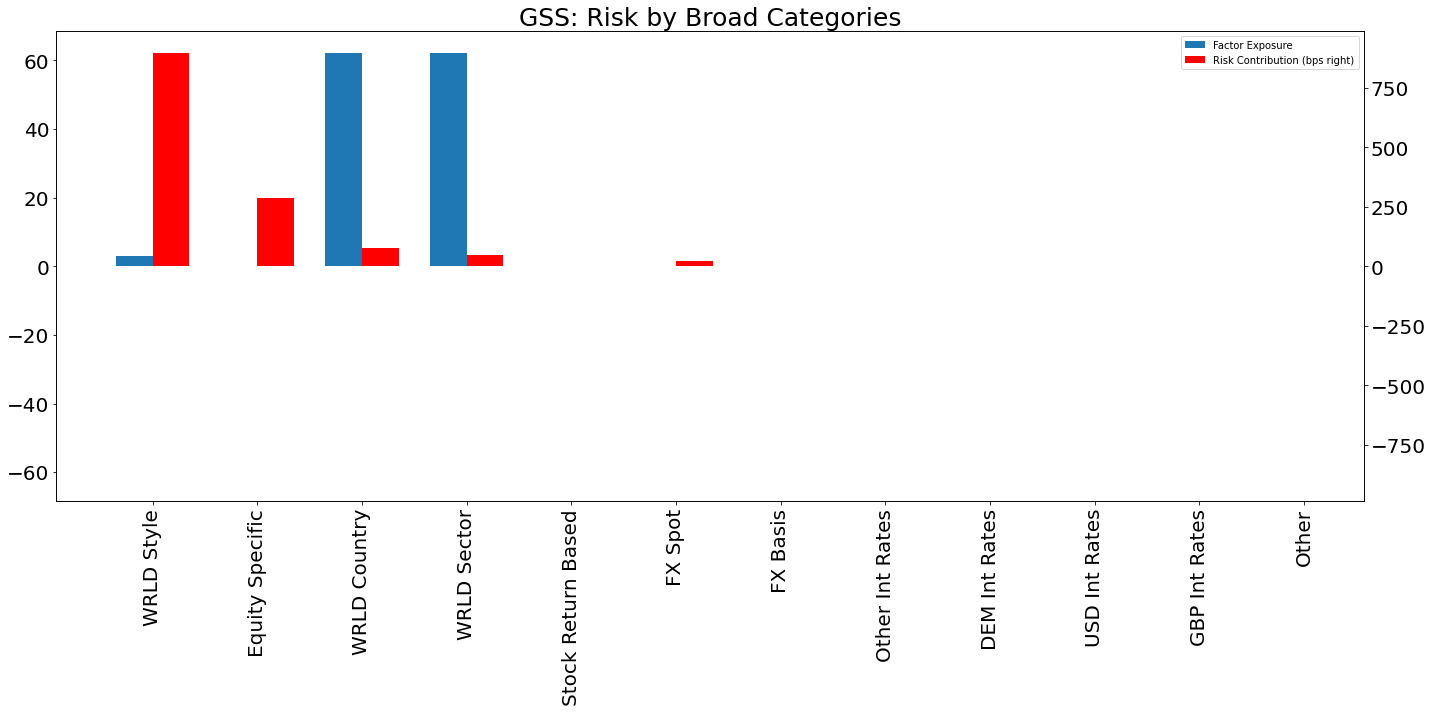

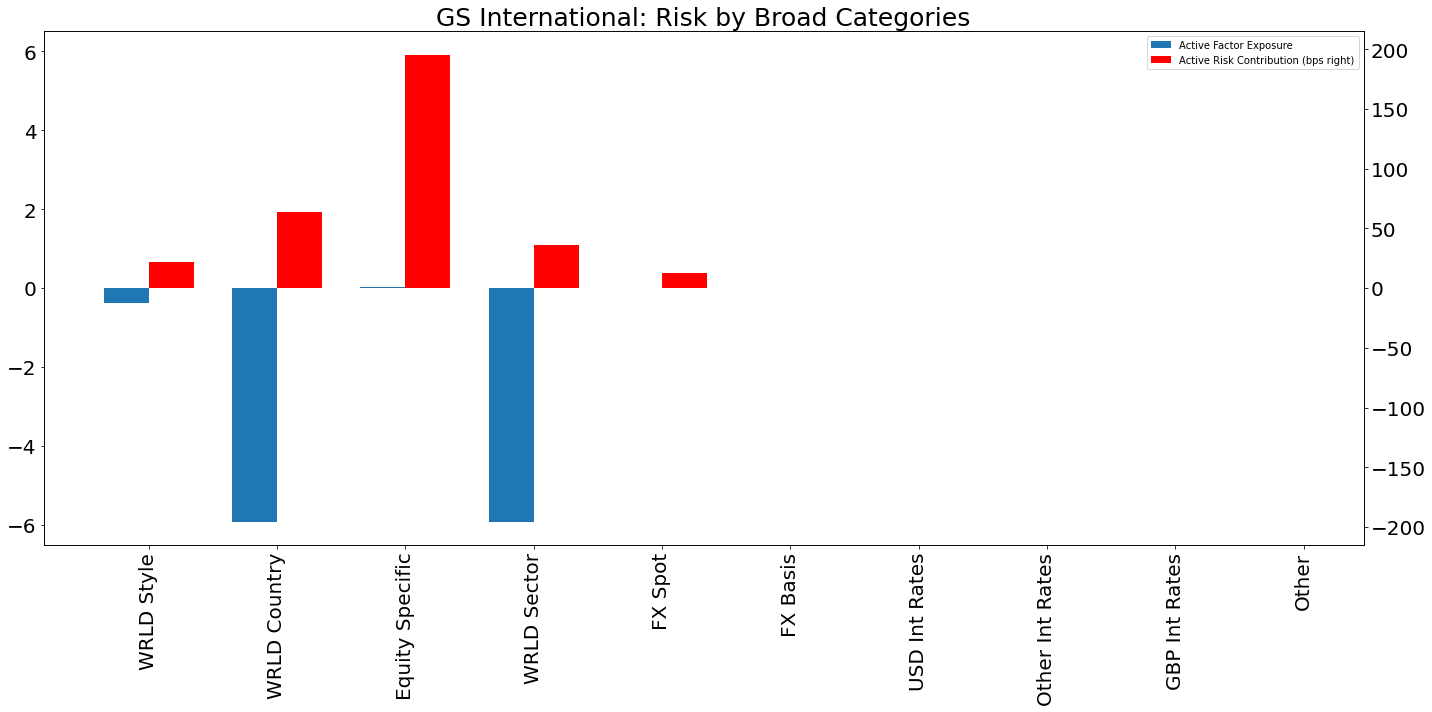

In [113]:
FactorCharts('PIF Factor based analysis.xlsx',False)
FactorCharts('DDF Factor based analysis.xlsx',False)
FactorCharts('USEQ Factor based analysis.xlsx',False)
FactorCharts('GSS Factor based analysis.xlsx',False)
FactorCharts('INTL Factor based analysis.xlsx',False)

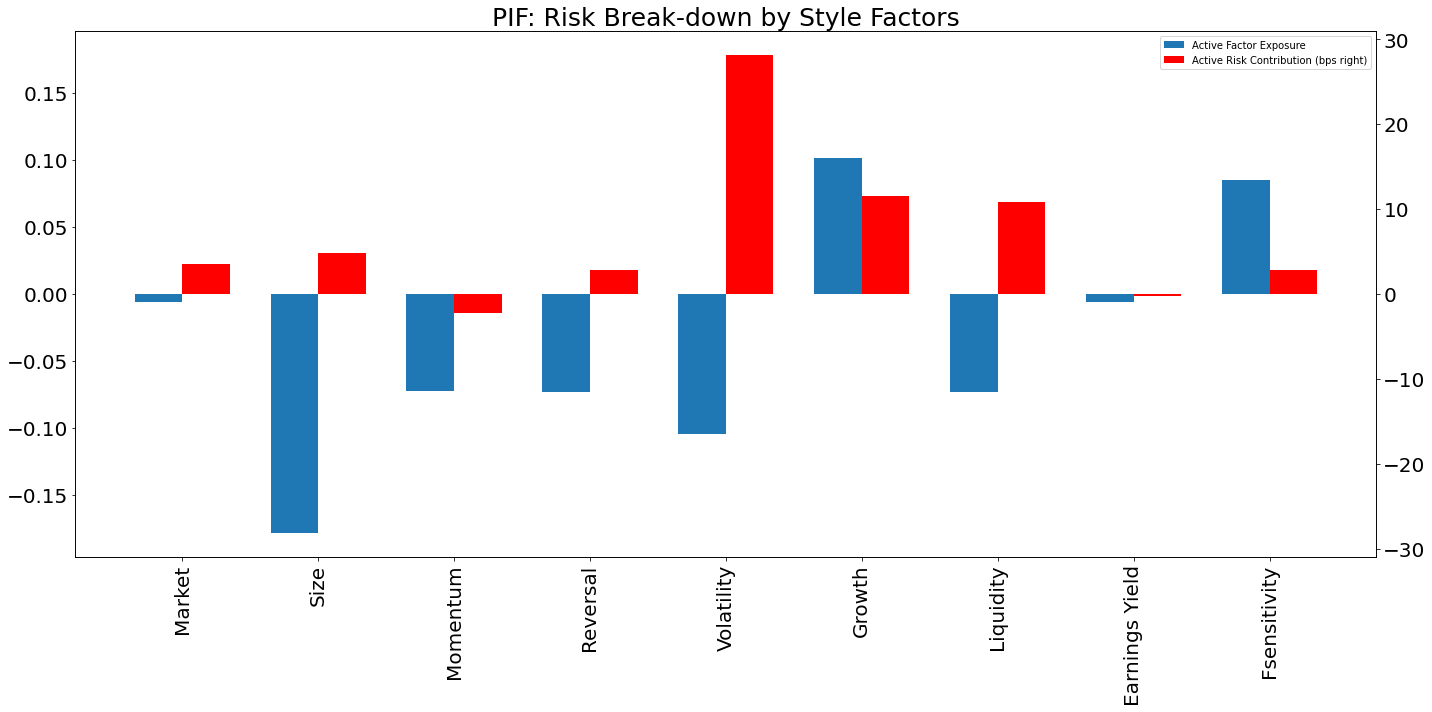

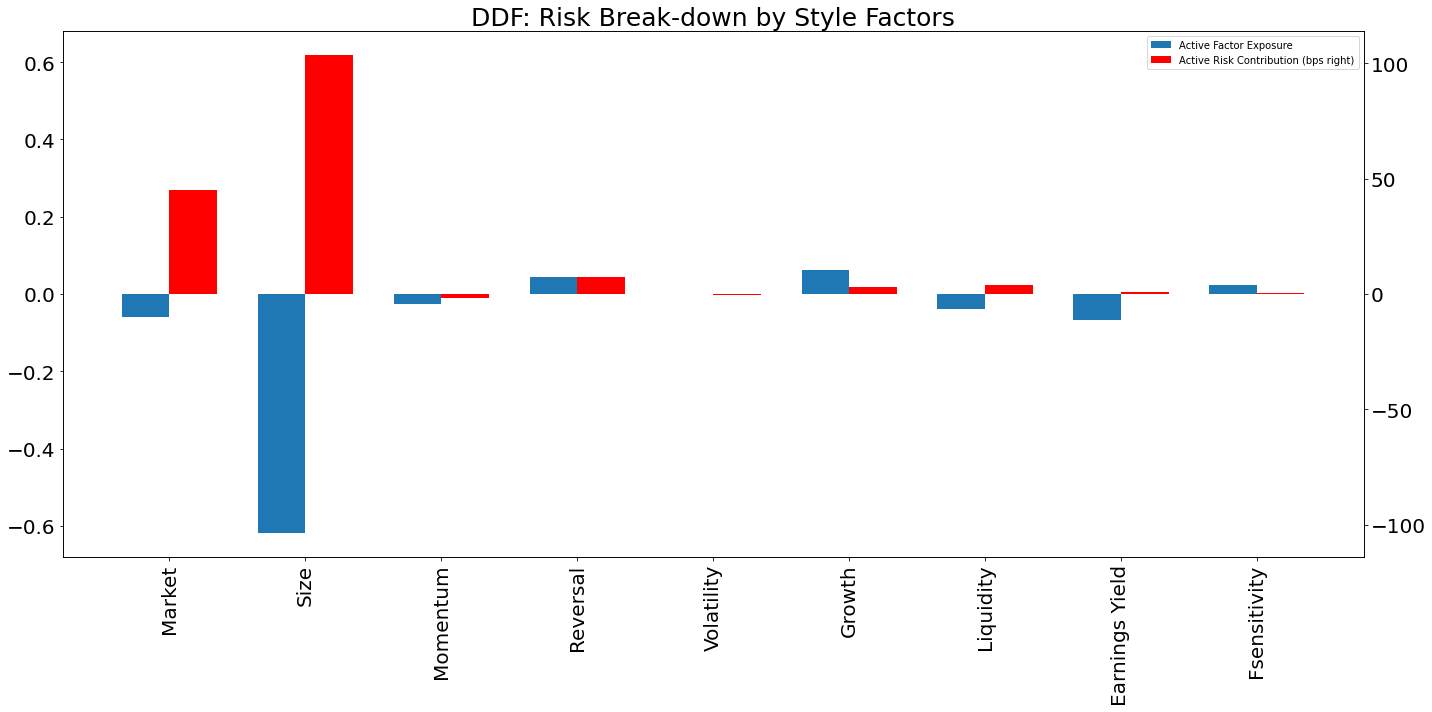

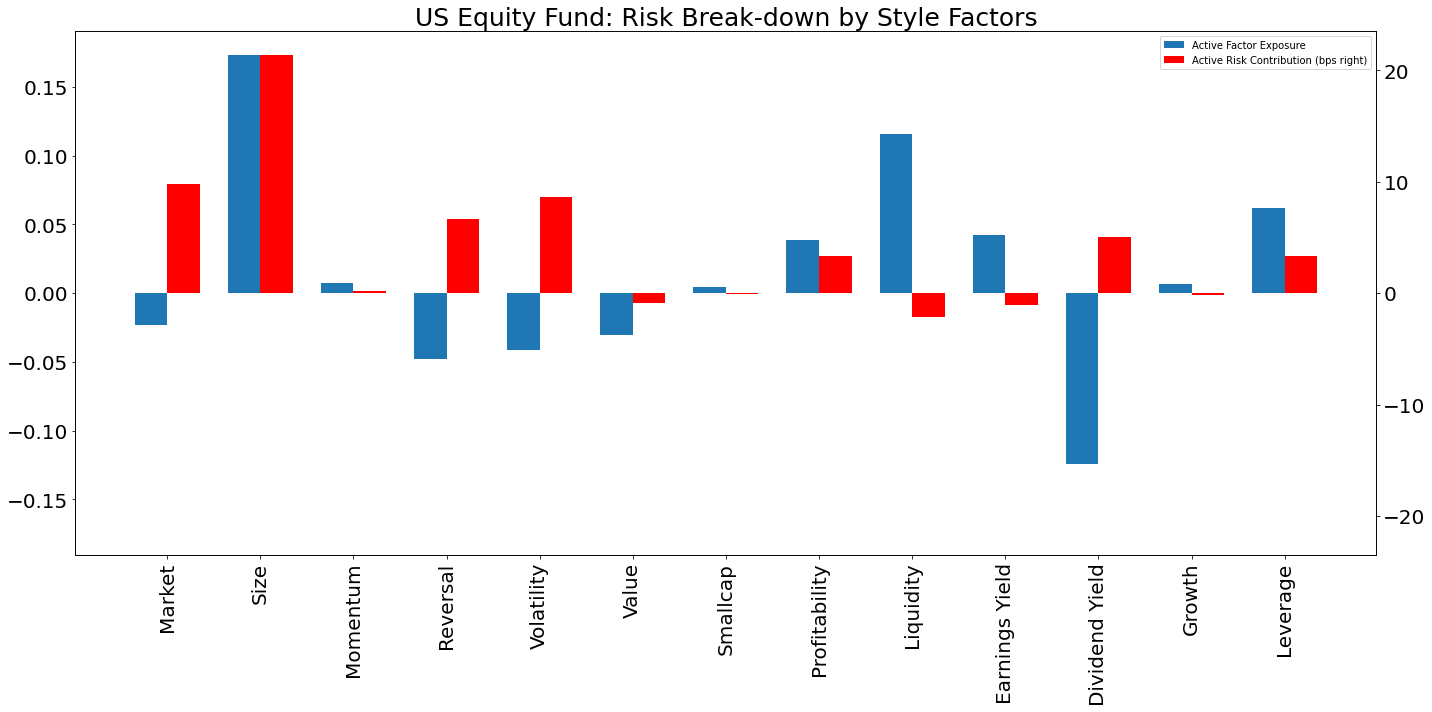

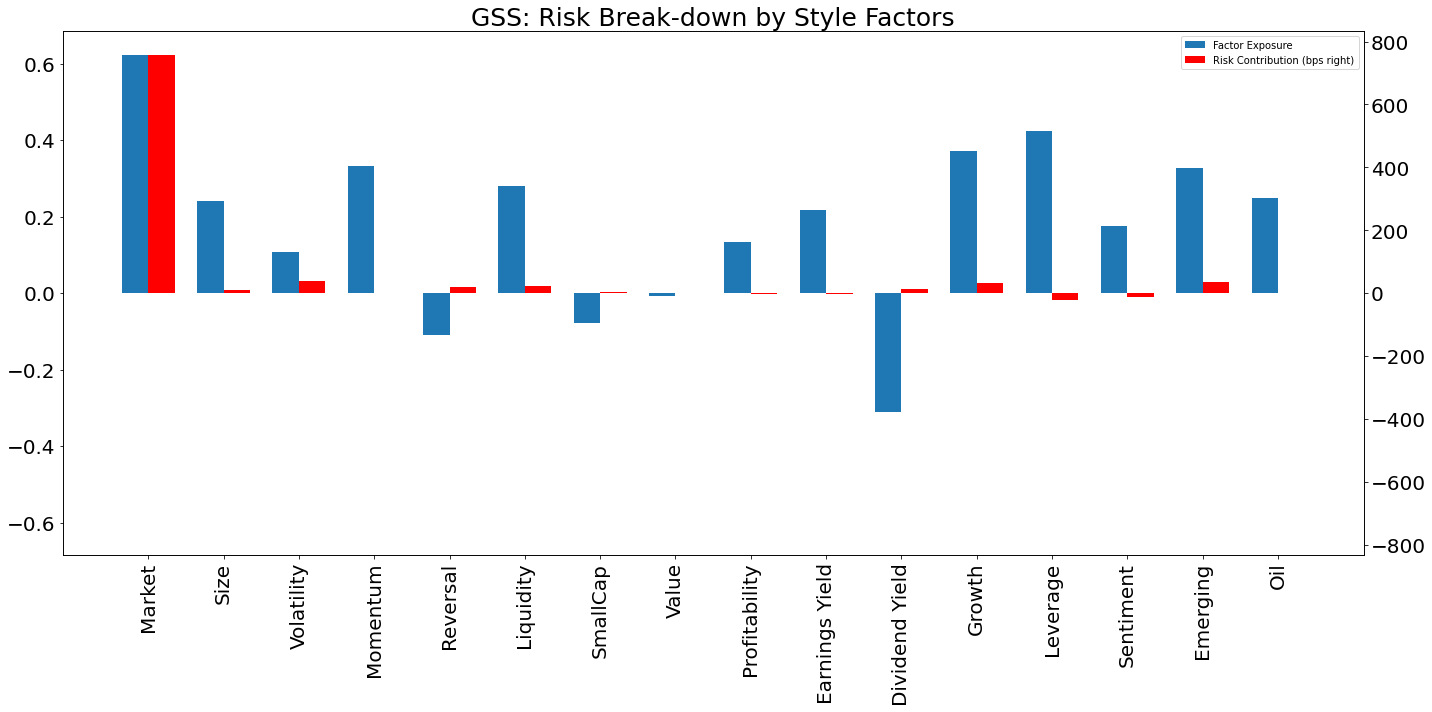

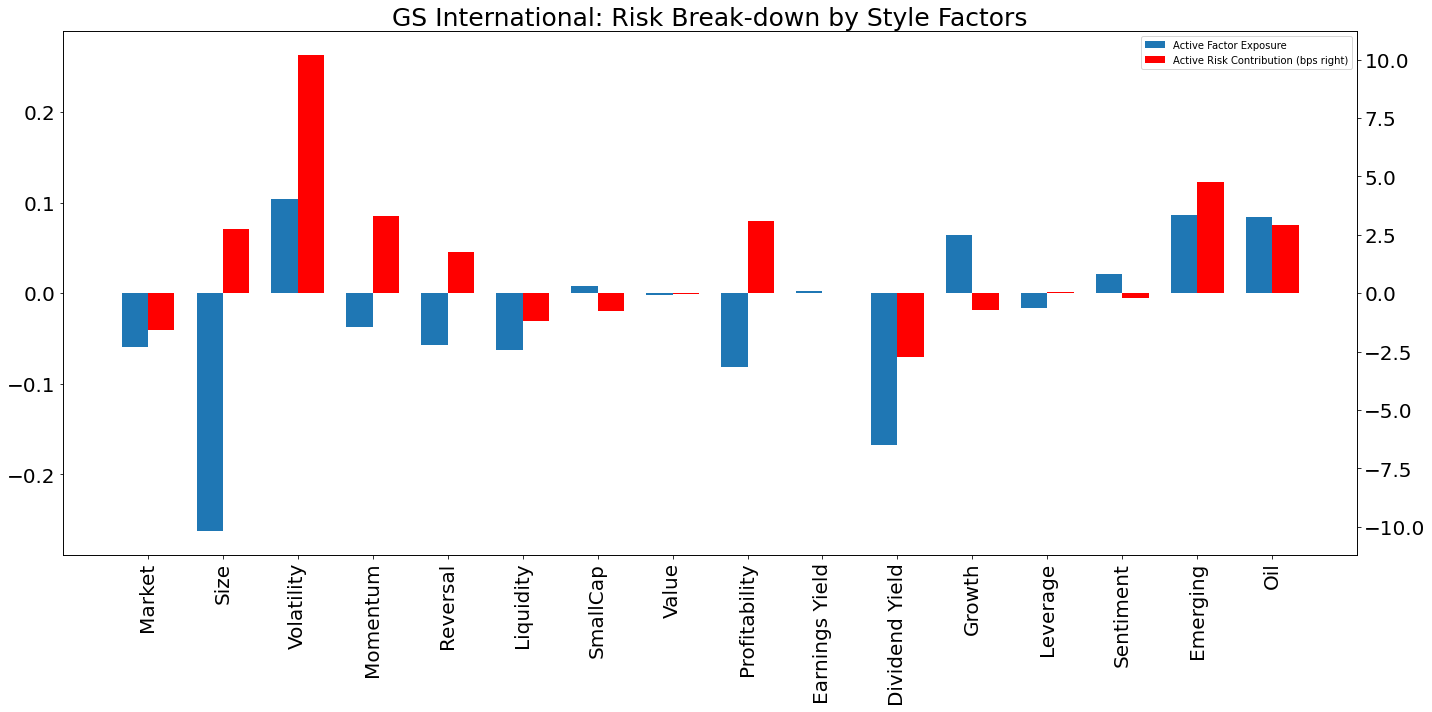

In [114]:
FactorCharts('PIF Factor based analysis.xlsx',True)
FactorCharts('DDF Factor based analysis.xlsx',True)
FactorCharts('USEQ Factor based analysis.xlsx',True)
FactorCharts('GSS Factor based analysis.xlsx',True)
FactorCharts('INTL Factor based analysis.xlsx',True)

In [168]:
sxf_df.loc[sxf_df['Level']==2]

Title Filter Level 1    Filter Level 2 Filter Level 3  Level  \
1              Equity          ONPIF            Equity            NaN    2.0   
145  Foreign Exchange          ONPIF  Foreign Exchange            NaN    2.0   
158              Time          ONPIF              Time            NaN    2.0   
160     Other Returns          ONPIF     Other Returns            NaN    2.0   
162    Base Risk-free          ONPIF    Base Risk-free            NaN    2.0   

    Factor Type  Factor Level  Factor Vol  Portfolio  Benchmark  Active  \
1           NaN           NaN         NaN        NaN        NaN     NaN   
145         NaN           NaN         NaN        NaN    4.1e-19 6.6e-18   
158         NaN           NaN         NaN     0.0019    0.00051  0.0014   
160         NaN           NaN         NaN        NaN        NaN     NaN   
162         NaN           NaN         NaN        NaN        NaN     NaN   

     Portfolio (bp)  Benchmark (bp)  Active (bp)  Portfolio (bp).1  \
1           1.5e+03         1.6e+03      3.5e+02           1.5e+03   
145         0.00094            0.31         0.31          -0.00045   
158             NaN             NaN          NaN               NaN   
160             NaN             NaN          NaN               NaN   
162             NaN             NaN          NaN               NaN   

     Benchmark (bp).1  Active (bp).1  Active Average Factor Exposure(1 MTD)  \
1             1.6e+03        3.5e+02                                    NaN   
145             -0.16         -0.092                                    NaN   
158               NaN            NaN                                    NaN   
160               NaN            NaN                                    NaN   
162               NaN            NaN                                    NaN   

     Factor P&L(1 MTD)  Active Factor Return Contribution(1 MTD) (bp)  
1              2.3e+06                                        4.9e+01  
145              2e+02                                         0.0044  
158                NaN                                            NaN  
160           -1.4e+03                                         -0.031  
162              1e+05                                            2.3